In [1]:

import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

import math
import astropy
print('astropy',astropy.__version__ )
from spectral_cube import SpectralCube      # This is a handy package for working with 3D data cubes

from astropy.coordinates import SkyCoord
from reproject import reproject_interp      
from reproject.mosaicking import find_optimal_celestial_wcs 
import regions
import reproject
print('reproject',reproject.__version__)
import spectral_cube
print('spectral_cube',spectral_cube.__version__)
import numpy as np                          
import pylab                                
import matplotlib 
import matplotlib.gridspec as gridspec                                                                                             
import scipy
import astropy.io.fits as fits                                                          
from astropy.wcs import WCS                 
from astropy import units as u              
import pyspeckit as psk   
import astrodendro
import matplotlib.colors as colors
from matplotlib import pyplot as plt
# Suppress warnings we don't care about:
import sys
import gc

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
%matplotlib inline
#%matplotlib notebook
from astrodendro.analysis import PPVStatistic


print(astrodendro.__file__)

from matplotlib.patches import Ellipse
#%matplotlib widget

/home/ben/miniconda3/bin/python
3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)
astropy 5.1.dev153+gb740594dc
reproject 0.8
spectral_cube 0.6.1.dev22+g003ef16
/home/ben/.local/lib/python3.8/site-packages/astrodendro/__init__.py


Clean Notebook for NGC253

Featuring:

HCO+ 4-3
HCN 4-3
H13CN 4-3

HCN_J1-0
HCO+_J1-0
H13CO+_J1-0_and_SiO_J2-1
H13CN_J1-0
CO_J3-2

CCH_N1-0
HC3NJ11-10

Part 1: Updates

Part 2: File Reads, Integrated Maps

Part 3: Image Ratios

Part 4: Channel Maps

Part 5: PV Plots

Part 6: Reporojection

Part 7: Spectra

Part 8: Dendograms

# Part 1: Updates

In [1]:

#!py -m pip uninstall astropy
#!py -m pip install git+https://github.com/astropy/astropy

'''


!py -m pip install git+https://github.com/radio-astro-tools/spectral-cube.git
!py -m pip install reproject
!py -m pip install git+https://github.com/radio-astro-tools/spectral-cube.git 
!py -m pip install pyspeckit
!py -m pip install regions
!py -m pip install astrodendro
!py -m pip  install wcsaxes 
!py -m pip  install ipympl
!py -m pip install dask
!py -m pip install radio_beam
!py -m pip install casa_formats_io
#try:
#    !pip install casa_formats_io --no-binary :all:
#except:
#    !pip install casa_formats_io --no-cache --no-binary :all:

!py -m pip  install spectral_cube 
!py -m pip  install typing 
!py -m pip install mypy
!py -m pip  install typing_extensions 
'''

S
^C


'\n\n\n!py -m pip install git+https://github.com/radio-astro-tools/spectral-cube.git\n!py -m pip install reproject\n!py -m pip install git+https://github.com/radio-astro-tools/spectral-cube.git \n!py -m pip install pyspeckit\n!py -m pip install regions\n!py -m pip install astrodendro\n!py -m pip  install wcsaxes \n!py -m pip  install ipympl\n!py -m pip install dask\n!py -m pip install radio_beam\n!py -m pip install casa_formats_io\n#try:\n#    !pip install casa_formats_io --no-binary :all:\n#except:\n#    !pip install casa_formats_io --no-cache --no-binary :all:\n\n!py -m pip  install spectral_cube \n!py -m pip  install typing \n!py -m pip install mypy\n!py -m pip  install typing_extensions \n'

In [8]:
path = 'HCOp_J1-0.cube.fits'

#path = "HC3N_11_10.fits"

scP = SpectralCube.read(path)
sc = scP.with_spectral_unit(u.km/u.s,velocity_convention="radio")
scW = sc.wcs[:][:][0]

raDP1 = scW.pixel_to_world(0,0)
raDP2 = scW.pixel_to_world(1,1)

a=(raDP1)
b=(raDP2)
print(a)
print(b)

vel,NA,na = sc.world[:,0,0]

#too accurate?
#50 mili arcseconds

header5 = sc.header
beam5_a = header5["BMAJ"]*3600.0 # beam sizes in arcseconds
beam5_b = header5["BMIN"]*3600.0
pixel5 = header5["CDELT1"] * (-1)*3600.0

#print(sc.statistics())
print(header5)

print(abs(header5["CDELT3"]))

<SkyCoord (ICRS): (ra, dec) in deg
    (11.89358248, -25.29378852)>
<SkyCoord (ICRS): (ra, dec) in deg
    (11.89357296, -25.29377991)>
SIMPLE  =                    T /Standard FITS                                   BITPIX  =                  -32 /Floating point (32 bit)                         NAXIS   =                    3                                                  NAXIS1  =                 1221                                                  NAXIS2  =                 1221                                                  NAXIS3  =                  180                                                  EXTEND  =                    T                                                  BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 BZERO   =   0.000000000000E+00                                                  BMAJ    =   6.959081736003E-05                                                  BMIN    =   5.108453740925E-05                                  

In [93]:
#HCN 4-3


path = 'H8_continuum.pbcor.fits'

cube = SpectralCube.read(path) #Load the important axes
cheader = fits.getheader(path)  
w1 = WCS(cheader) 
w1 = w1.dropaxis(2)#Get rid of the different slices

cube.allow_huge_operations=True

# ex: c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')


cen_p1 = SkyCoord('00h47m34.034s', '-25d17m29.68s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.234s', '-25d17m09.68s', frame='icrs')

scP = SpectralCube.read(path)
sc = scP.with_spectral_unit(u.km/u.s,velocity_convention="radio")
scW = sc.wcs[:][:][0]


raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]


subcube = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube

subcube.allow_huge_operations=True
moment_0_sub  = subcube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map_sub   = subcube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1_sub  = subcube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map_sub = subcube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 

sc2 = subcube.spectral_slab(-200. *u.km / u.s, 700. *u.km / u.s)  # Crop out velocities we don't care about 

sc2.allow_huge_operations=True
moment_0_sub2  = sc2.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map_sub2   = sc2.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1_sub2  = sc2.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map_sub2 = sc2.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 





#Find Noise 
Np1 = SkyCoord('00h47m34.3s', '-25d17m11s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m34.0s', '-25d17m10s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc1 = sc[0:int(len(sc)/3),NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]].moment(order=0,how='slice') # Make a subcube away from the signals
#Find StandardDev of this noise cube
m1=Nsc1.std()/u.K/u.km*u.s

print(m1)



badpixS = pylab.where(abs(moment_0_sub.hdu.data)<m1*3)                 # Get ready to mask the data based on moment map

moment_1_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
sigma_map_sub.hdu.data[badpixS] = np.nan                         # Mask the velocity dispersion map

scWCS = subcube.wcs[:][:][0]


########


fig1 = pylab.figure(1,figsize=(30,30))


######Moment 0 and Max map

ax3 = pylab.subplot(3,3,1,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im3 = pylab.imshow(moment_0_sub.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(K km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0 u',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax4 = pylab.subplot(3,3,2, projection=scWCS)
RA = ax4.coords[0]                                                                  # 
Dec = ax4.coords[1]
im4=pylab.imshow(max_map_sub.data,cmap='Greys',vmax=50,vmin=-5)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax4.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im4,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Peak Emission (K)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission u',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax0 = pylab.subplot(3,3,5,projection=scWCS) 
RA = ax0.coords[0]                                                                  # 
Dec = ax0.coords[1]
im0 = pylab.imshow(moment_1_sub.hdu.data,cmap='Greys')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im0,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(K km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1 u',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax9 = pylab.subplot(3,3,6, projection=scWCS)
RA = ax9.coords[0]                                                                  # 
Dec = ax9.coords[1]
im9=pylab.imshow(sigma_map_sub.data,cmap='Greys')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax9.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im9,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Peak Emission (K)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='sig Emission u',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  



######Moment 0 and Max map

ax5 = pylab.subplot(3,3,3,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im5 = pylab.imshow(moment_0_sub2.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im5,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(K km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax6 = pylab.subplot(3,3,4, projection=scWCS)
RA = ax4.coords[0]                                                                  # 
Dec = ax4.coords[1]
im6=pylab.imshow(max_map_sub2.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax4.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im6,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Peak Emission (K)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  

######Moment 0 and Max map

ax7 = pylab.subplot(3,3,7,projection=scWCS) 
RA = ax7.coords[0]                                                                  # 
Dec = ax7.coords[1]
im7 = pylab.imshow(moment_1_sub2.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im7,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(K km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax8 = pylab.subplot(3,3,8, projection=scWCS)
RA = ax8.coords[0]                                                                  # 
Dec = ax8.coords[1]
im8=pylab.imshow(sigma_map_sub2.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax8.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im8,fraction=0.046,pad=0.04)                                      
cb.set_label(label='sig km/s',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='sig ',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  

pylab.tight_layout(w_pad=10,h_pad=5)


ax3.set_title("NGC253.HCN_4-3.pbcor.fits")
ax4.set_title("NGC253.HCN_4-3.pbcor.fits")

fig1.savefig("pres_image")




IndexError: list index out of range

In [7]:
#Continuum
path='ngc253_850_micron_dust.fits'
#path = 'HCOp_J1-0.cube.fits'
scP = spectral_cube.Projection.from_hdu(fits.open(path)[0])[0:9999,0:9999]
#scP = SpectralCube.read(path)

header = scP.hdu.header
#scP = cube.apply_numpy_function(np.nansum,axis=0) #Load the important axes
scWCS = scP.wcs[:][:][0]
scW= scWCS
bp=np.where(scP>0)
scP[bp]=np.nan
#print(scP.hdu.header)

cen_p1 = SkyCoord('00h47m32.5s', '-25d17m28s', frame='icrs')#These are away from the clusters
cen_p2 = SkyCoord('00h47m32.2s', '-25d17m22s', frame='icrs')


print()
#make metadata for the dendrogram

metadata = {}
metadata['data_unit'] = u.Jy / u.beam
metadata['arc_per_pix_y'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['arc_per_pix_x'] =  abs(header["CDELT2"]*3600.0 * u.arcsec)/u.pix
metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
metadata['spatial_scale'] = abs(header["CDELT1"])*u.degree
beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix_y']/metadata['arc_per_pix_x'] 

#scP.to(u.Jy)
print(scP[0][0])
scP = scP/beam_area_ratio*u.beam*u.pix**2#Beam area ratio is pix**2/beam
print(scP[0][0])
#scW = scP.wcs

print(scW,scW.world_to_pixel(cen_p1))
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]


print(np.shape(scP))
print(scP[0][0])

subcube = scP[:][:]#[raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube


subcube.allow_huge_operations=True






########


fig1 = pylab.figure(1,figsize=(15,15))


######Moment 0 and Max map

ax3 = pylab.subplot(2,2,1,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im3 = pylab.imshow(scP,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Jy',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='hco+',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax3.set_title("hco+")

#fig1.savefig(bbox_inches='tight',fname="NGC253_HCO+_4-3_Integrated_Full_Note.jpeg")



nan Jy / beam
nan Jy
SlicedFITSWCS Transformation

This transformation has 1 pixel and 2 world dimensions

Array shape (Numpy order): (2500,)

Pixel Dim  Axis Name  Data size  Bounds
        0  None            2500  None

World Dim  Axis Name  Physical Type  Units
        0  None       pos.eq.ra      deg
        1  None       pos.eq.dec     deg

Correlation between pixel and world axes:

           Pixel Dim
World Dim    0
        0  yes
        1  yes 1656.2877348568034


IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

# Part 2: File Reads, Moment Maps

nan Jy / beam 1.0
nan Jy
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 11.88805833333  -25.2888  
CRPIX : 246.0  201.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -1.388888888889e-05  1.388888888889e-05  
NAXIS : 488  400 (array(416.73741176), array(33.6944391))
(400, 488)
nan Jy


Text(0.5, 1.0, 'NGC253.continuum')

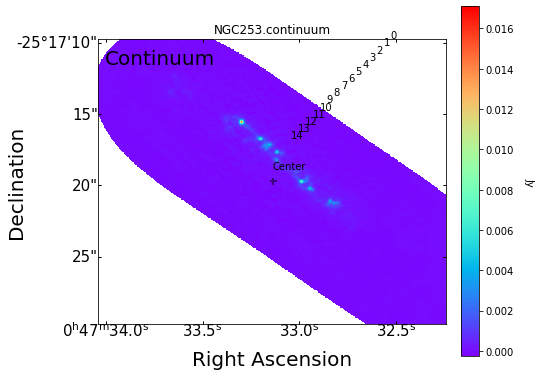

In [32]:
#Continuum
#path='ngc253_850_micron_dust.fits'
path = 'Continuum_Reproject.fits'


#print(scP.hdu.header)

cen_p1 = SkyCoord('00h47m32.5s', '-25d17m28s', frame='icrs')#These are away from the clusters
cen_p2 = SkyCoord('00h47m32.2s', '-25d17m22s', frame='icrs')
scP = spectral_cube.Projection.from_hdu(fits.open(path)[0])[0:9999,0:9999]
bp = np.where(scP>0)
#scP[bp]=np.nan
scW=scP.wcs
header = scP.hdu.header
#print(header)
#make metadata for the dendrogram

metadata = {}
metadata['data_unit'] = u.Jy / u.beam
metadata['arc_per_pix_y'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['arc_per_pix_x'] =  abs(header["CDELT2"]*3600.0 * u.arcsec)/u.pix
metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
metadata['spatial_scale'] = abs(header["CDELT1"])*u.degree
beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix_y']/metadata['arc_per_pix_x'] 

#scP.to(u.Jy)
print(scP[0][0],np.log(np.e))
scP = scP/beam_area_ratio*u.beam*u.pix**2*4*np.log(2)#Beam area ratio is pix**2/beam  and I convert to gaussian
print(scP[0][0])
#scW = scP.wcs

print(scW,scW.world_to_pixel(cen_p1))
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]


print(np.shape(scP))
print(scP[0][0])

subcube = scP[:][:]#[raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube


subcube.allow_huge_operations=True



scWCS = subcube.wcs


########


fig1 = pylab.figure(1,figsize=(15,15))


######Moment 0 and Max map

ax3 = pylab.subplot(2,2,1,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im3 = pylab.imshow(subcube.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)

xs,ys=[400,390,380,370,360,350,340,330,320,310,300,290,280,270,260],[400,390,380,370,360,350,340,330,320,310,300,290,280,270,260]
pylab.annotate("Center",(y,x+16))
for i in range(len(xs)):
    pylab.annotate(i,(ys[i]+10,xs[i]))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Jy',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Continuum',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax3.set_title("NGC253.continuum")

#fig1.savefig(bbox_inches='tight',fname="NGC253_HCO+_4-3_Integrated_Full_Note.jpeg")



In [33]:
#HCO+ 4-3

path = 'NGC253.HCO+_4-3.pbcor.fits'

cube = SpectralCube.read(path) #Load the important axes
cheader = fits.getheader(path)  

w1 = WCS(cheader) 
w1 = w1.dropaxis(2)#Get rid of the different slices

cube.allow_huge_operations=True


#Remove Non-zoomed images !
#Remove vmin vmax !
#Make vmin vmax for moment 1, simga !
#Make spectral slab ~100-500 km/s !
#Try to show where the center is (find from a paper) !
#Fix padding ?
#Same raneg for each molecule !
#Mask ratios under a certain value (rainbow?) !
#Consistent vmin vmax for all channels (log scaling?) !
#More channels in the maps !
#Make HCN/H13CN !
#Fix Labels !
#REdefine velocity axis using spectral cube, based on rest frequency !


###### Make zoomed in images
# ex: c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')
#Infrared Center: 00 47 33.134 -25 17 19.68 . Ref: http://simbad.u-strasbg.fr/simbad/sim-id?Ident=NGC+++253


#cen_p1 = SkyCoord('00h47m34.034s', '-25d17m29.68s', frame='icrs')
#cen_p2 = SkyCoord('00h47m32.234s', '-25d17m09.68s', frame='icrs')

cen_p1 = SkyCoord('00h47m33.9s', '-25d17m33s', frame='icrs')#These are away from the clusters
cen_p2 = SkyCoord('00h47m32.2s', '-25d17m02s', frame='icrs')
scP = SpectralCube.read(path)
scp2 = scP.with_spectral_unit(u.km/u.s,velocity_convention="radio")

scp2.allow_huge_operations=True   

sc = scp2.to(u.Jy/u.beam)


print(sc[0][0][0])
scWCS = sc.wcs[:][:][0]

raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]


subcube = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
scWCS = subcube.wcs[:][:][0]

subcube.allow_huge_operations=True
moment_0_sub  = subcube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map_sub   = subcube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1_sub  = subcube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map_sub = subcube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 

'''
#Find Noise 
Np1 = SkyCoord('00h47m32.5s', '-25d17m28s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m32.2s', '-25d17m22s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc1 = sc[:,NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]] # Make a subcube away from the signals
#Find StandardDev of this noise cube
m1=Nsc1.std()/u.K

print(m1)

badpixS = pylab.where(abs(moment_0_sub.hdu.data)<m1*1)                 # Get ready to mask the data based on moment map
moment_1_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
sigma_map_sub.hdu.data[badpixS] = np.nan                         # Mask the velocity dispersion map

scWCS = subcube.wcs[:][:][0]


########

'''
fig1 = pylab.figure(1,figsize=(15,15))


######Moment 0 and Max map

ax3 = pylab.subplot(2,2,1,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im3 = pylab.imshow(moment_0_sub.hdu.data,cmap='rainbow')
print(moment_0_sub[0][0])
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(K km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax4 = pylab.subplot(2,2,2, projection=scWCS)
RA = ax4.coords[0]                                                                  # 
Dec = ax4.coords[1]
im4=pylab.imshow(max_map_sub.data,cmap='rainbow')
print(max_map_sub[0][0])
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax4.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im4,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Peak Emission (K)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


pylab.tight_layout(w_pad=10,h_pad=5)



#########Moment 1 and Sigma


ax7 = pylab.subplot(2,2,3,projection=scWCS) 
RA = ax7.coords[0]                                                                  # 
Dec = ax7.coords[1]
im7 = pylab.imshow(moment_1_sub.hdu.data,cmap='rainbow',vmin=-100,vmax=500)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im7,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax8 = pylab.subplot(2,2,4, projection=scWCS)
RA = ax8.coords[0]                                                                  # 
Dec = ax8.coords[1]
im8=pylab.imshow(sigma_map_sub.hdu.data,cmap='rainbow',vmin=0,vmax=120)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax8.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im8,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction") 
pylab.tight_layout(w_pad=10,h_pad=-10)

ax3.set_title("NGC253.HCO+_4-3.pbcor.fits")
ax4.set_title("NGC253.HCO+_4-3.pbcor.fits")
ax7.set_title("NGC253.HCO+_4-3.pbcor.fits")
ax8.set_title("NGC253.HCO+_4-3.pbcor.fits")

fig1.savefig(bbox_inches='tight',fname="NGC253_HCO+_4-3_Integrated_Full_Note.jpeg")



nan Jy / beam


IndexError: index 0 is out of bounds for axis 1 with size 0

In [ ]:
#HCN 4-3


path = 'NGC253.HCN_4-3.pbcor.fits'

cube = SpectralCube.read(path) #Load the important axes
cheader = fits.getheader(path)  
w1 = WCS(cheader) 
w1 = w1.dropaxis(2)#Get rid of the different slices

cube.allow_huge_operations=True

# ex: c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')


cen_p1 = SkyCoord('00h47m34.034s', '-25d17m29.68s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.234s', '-25d17m09.68s', frame='icrs')

scP = SpectralCube.read(path)
sc = scP.with_spectral_unit(u.km/u.s,velocity_convention="radio")
scW = sc.wcs[:][:][0]


raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]


subcube = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube

subcube.allow_huge_operations=True
moment_0_sub  = subcube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map_sub   = subcube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1_sub  = subcube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map_sub = subcube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 


#Find Noise 
Np1 = SkyCoord('00h47m34.3s', '-25d17m11s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m34.0s', '-25d17m10s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc1 = sc[0:int(len(sc)/3),NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]].moment(order=0,how='slice') # Make a subcube away from the signals
#Find StandardDev of this noise cube
m1=Nsc1.std()/u.K/u.km*u.s

print(m1)



badpixS = pylab.where(abs(moment_0_sub.hdu.data)<m1*3)                 # Get ready to mask the data based on moment map

moment_1_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
sigma_map_sub.hdu.data[badpixS] = np.nan                         # Mask the velocity dispersion map

scWCS = subcube.wcs[:][:][0]


########


fig1 = pylab.figure(1,figsize=(15,15))


######Moment 0 and Max map

ax3 = pylab.subplot(2,2,1,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im3 = pylab.imshow(moment_0_sub.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(K km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax4 = pylab.subplot(2,2,2, projection=scWCS)
RA = ax4.coords[0]                                                                  # 
Dec = ax4.coords[1]
im4=pylab.imshow(max_map_sub.data,cmap='rainbow',vmin=0,vmax=50)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax4.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im4,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Peak Emission (K)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


pylab.tight_layout(w_pad=10,h_pad=5)



#########Moment 1 and Sigma


ax7 = pylab.subplot(2,2,3,projection=scWCS) 
RA = ax7.coords[0]                                                                  # 
Dec = ax7.coords[1]
im7 = pylab.imshow(moment_1_sub.hdu.data,cmap='rainbow',vmin=-100,vmax=500)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im7,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax8 = pylab.subplot(2,2,4, projection=scWCS)
RA = ax8.coords[0]                                                                  # 
Dec = ax8.coords[1]
im8=pylab.imshow(sigma_map_sub.hdu.data,cmap='rainbow',vmin=0,vmax=120)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax8.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im8,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction") 
pylab.tight_layout(w_pad=10,h_pad=-10)


ax3.set_title("NGC253.HCN_4-3.pbcor.fits")
ax4.set_title("NGC253.HCN_4-3.pbcor.fits")
ax7.set_title("NGC253.HCN_4-3.pbcor.fits")
ax8.set_title("NGC253.HCN_4-3.pbcor.fits")

fig1.savefig(bbox_inches='tight',fname="NGC253.HCN_4-3_Integrated_Full_Note.jpeg")




12.976071021114315


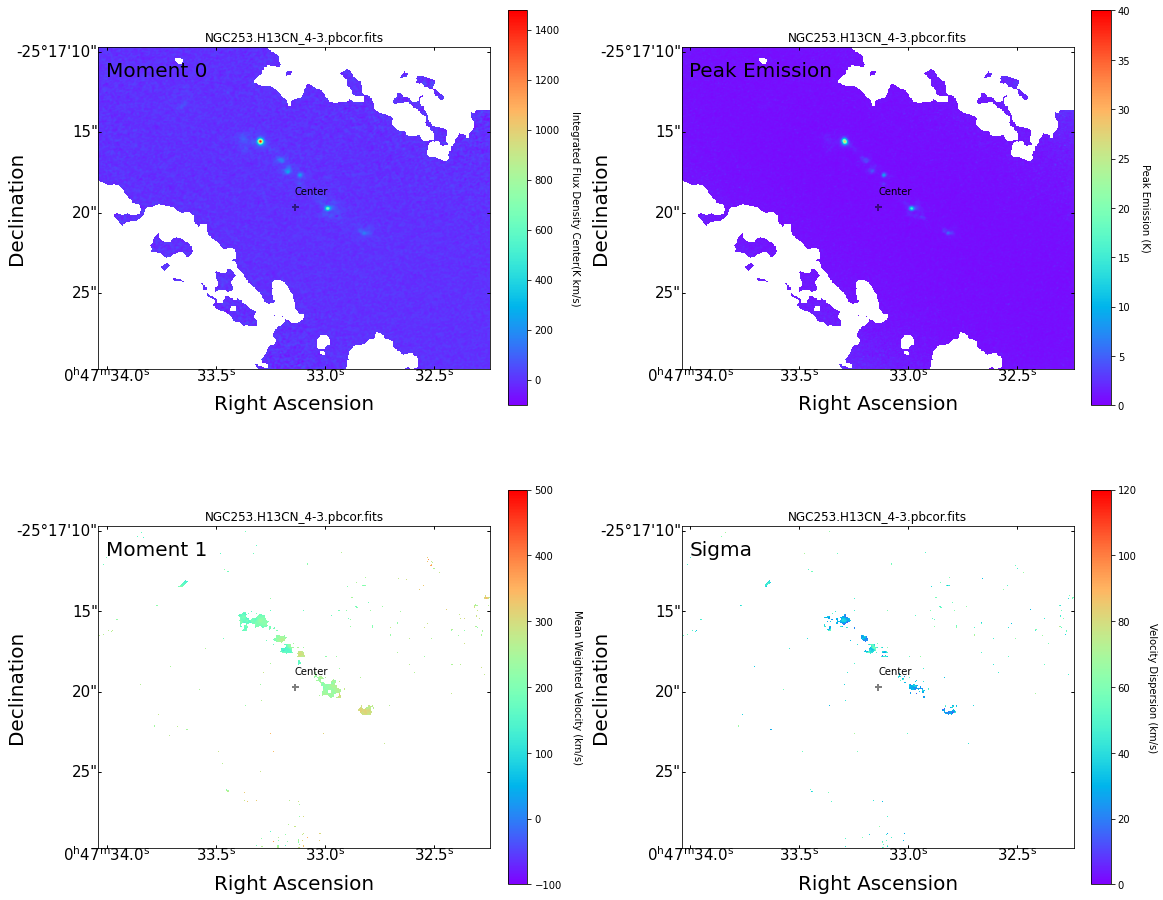

In [31]:
#H13CN 4-3




path = 'NGC253.H13CN_4-3.pbcor.fits'

cube = SpectralCube.read(path) #Load the important axes
cheader = fits.getheader(path)  
w1 = WCS(cheader) 
w1 = w1.dropaxis(2)#Get rid of the different slices

cube.allow_huge_operations=True

# ex: c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')


cen_p1 = SkyCoord('00h47m34.034s', '-25d17m29.68s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.234s', '-25d17m09.68s', frame='icrs')

scP = SpectralCube.read(path)
sc = scP.with_spectral_unit(u.km/u.s,velocity_convention="radio")
scW = sc.wcs[:][:][0]


raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]


subcube = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube

subcube.allow_huge_operations=True
moment_0_sub  = subcube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map_sub   = subcube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1_sub  = subcube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map_sub = subcube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 

#Find Noise 
Np1 = SkyCoord('00h47m34.3s', '-25d17m11s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m34.0s', '-25d17m10s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc1 = sc[0:int(len(sc)/3),NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]].moment(order=0,how='slice') # Make a subcube away from the signals
#Find StandardDev of this noise cube
m1=Nsc1.std()/u.K/u.km*u.s

print(m1)



badpixS = pylab.where(abs(moment_0_sub.hdu.data)<m1*2)                 # Get ready to mask the data based on moment map

moment_1_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
sigma_map_sub.hdu.data[badpixS] = np.nan                         # Mask the velocity dispersion map

scWCS = subcube.wcs[:][:][0]


########


fig1 = pylab.figure(1,figsize=(15,15))


######Moment 0 and Max map

ax3 = pylab.subplot(2,2,1,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im3 = pylab.imshow(moment_0_sub.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(K km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax4 = pylab.subplot(2,2,2, projection=scWCS)
RA = ax4.coords[0]                                                                  # 
Dec = ax4.coords[1]
im4=pylab.imshow(max_map_sub.data,cmap='rainbow',vmin=0,vmax=40)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax4.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im4,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Peak Emission (K)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


pylab.tight_layout(w_pad=10,h_pad=5)



#########Moment 1 and Sigma


ax7 = pylab.subplot(2,2,3,projection=scWCS) 
RA = ax7.coords[0]                                                                  # 
Dec = ax7.coords[1]
im7 = pylab.imshow(moment_1_sub.hdu.data,cmap='rainbow',vmin=-100,vmax=500)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im7,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax8 = pylab.subplot(2,2,4, projection=scWCS)
RA = ax8.coords[0]                                                                  # 
Dec = ax8.coords[1]
im8=pylab.imshow(sigma_map_sub.hdu.data,cmap='rainbow',vmin=0,vmax=120)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax8.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im8,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction") 
pylab.tight_layout(w_pad=10,h_pad=-10)


ax3.set_title("NGC253.H13CN_4-3.pbcor.fits")
ax4.set_title("NGC253.H13CN_4-3.pbcor.fits")
ax7.set_title("NGC253.H13CN_4-3.pbcor.fits")
ax8.set_title("NGC253.H13CN_4-3.pbcor.fits")

fig1.savefig(bbox_inches='tight',fname="NGC253.H13CN_4-3_Integrated_Full_Note.jpeg")

In [ ]:
#HCN_J1-0

path = 'HCN_J1-0.cube.fits'

cube = SpectralCube.read(path) #Load the important axes
cheader = fits.getheader(path)  
w1 = WCS(cheader) 
w1 = w1.dropaxis(2)#Get rid of the different slices

cube.allow_huge_operations=True

# ex: c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')


cen_p1 = SkyCoord('00h47m34.034s', '-25d17m29.68s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.234s', '-25d17m09.68s', frame='icrs')

scP = SpectralCube.read(path)
sc = scP.with_spectral_unit(u.km/u.s,velocity_convention="radio")
scW = sc.wcs[:][:][0]


raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]


subcube = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube

subcube.allow_huge_operations=True
moment_0_sub  = subcube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map_sub   = subcube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1_sub  = subcube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map_sub = subcube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 

#Find Noise 
Np1 = SkyCoord('00h47m34.3s', '-25d17m11s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m34.0s', '-25d17m10s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc1 = sc[0:int(len(sc)/3),NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]].moment(order=0,how='slice') # Make a subcube away from the signals
#Find StandardDev of this noise cube
m1=Nsc1.std()/u.Jy/u.km*u.s*u.beam





badpixS = pylab.where(abs(moment_0_sub.hdu.data)<m1*1)                 # Get ready to mask the data based on moment map

moment_1_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
sigma_map_sub.hdu.data[badpixS] = np.nan                         # Mask the velocity dispersion map

scWCS = subcube.wcs[:][:][0]


########


fig1 = pylab.figure(1,figsize=(15,15))


######Moment 0 and Max map

ax3 = pylab.subplot(2,2,1,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im3 = pylab.imshow(moment_0_sub.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(Jy km / (beam s))',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax4 = pylab.subplot(2,2,2, projection=scWCS)
RA = ax4.coords[0]                                                                  # 
Dec = ax4.coords[1]
im4=pylab.imshow(max_map_sub.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax4.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im4,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Peak Emission (Jy / beam)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


pylab.tight_layout(w_pad=10,h_pad=5)



#########Moment 1 and Sigma


ax7 = pylab.subplot(2,2,3,projection=scWCS) 
RA = ax7.coords[0]                                                                  # 
Dec = ax7.coords[1]
im7 = pylab.imshow(moment_1_sub.hdu.data,cmap='rainbow',vmin=-100,vmax=500)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im7,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax8 = pylab.subplot(2,2,4, projection=scWCS)
RA = ax8.coords[0]                                                                  # 
Dec = ax8.coords[1]
im8=pylab.imshow(sigma_map_sub.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax8.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im8,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction") 
pylab.tight_layout(w_pad=10,h_pad=-10)
ax3.set_title("HCN_J1-0.cube.fits")
ax4.set_title("HCN_J1-0.cube.fits")
ax7.set_title("HCN_J1-0.cube.fits")
ax8.set_title("HCN_J1-0.cube.fits")
fig1.savefig(bbox_inches='tight',fname="NGC253.HCN_J1-0_Integrated_Full_Note.jpeg")

In [15]:
#HCO+_J1-0

path = 'HCOp_J1-0.cube.fits'

cube = SpectralCube.read(path) #Load the important axes
cheader = fits.getheader(path)  
w1 = WCS(cheader) 
w1 = w1.dropaxis(2)#Get rid of the different slices

cube.allow_huge_operations=True

# ex: c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')


cen_p1 = SkyCoord('00h47m34.034s', '-25d17m29.68s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.234s', '-25d17m09.68s', frame='icrs')

scP = SpectralCube.read(path)
sc = scP.with_spectral_unit(u.km/u.s,velocity_convention="radio")
scW = sc.wcs[:][:][0]


raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]


subcube = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube

subcube.allow_huge_operations=True
moment_0_sub  = subcube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map_sub   = subcube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1_sub  = subcube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map_sub = subcube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 
#Find Noise 
Np1 = SkyCoord('00h47m34.3s', '-25d17m11s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m34.0s', '-25d17m10s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc1 = sc[0:int(len(sc)/3),NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]].moment(order=0,how='slice') # Make a subcube away from the signals
#Find StandardDev of this noise cube
m1=Nsc1.std()/u.Jy/u.km*u.s*u.beam

print(sc[0][0][0])
print(m1)

badpixS = pylab.where(abs(moment_0_sub.hdu.data)<m1*3)                 # Get ready to mask the data based on moment map


moment_1_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
sigma_map_sub.hdu.data[badpixS] = np.nan                         # Mask the velocity dispersion map

scWCS = subcube.wcs[:][:][0]


########


fig1 = pylab.figure(1,figsize=(15,15))


######Moment 0 and Max map

ax3 = pylab.subplot(2,2,1,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im3 = pylab.imshow(moment_0_sub.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(Jy km / (beam s))',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax4 = pylab.subplot(2,2,2, projection=scWCS)
RA = ax4.coords[0]                                                                  # 
Dec = ax4.coords[1]
im4=pylab.imshow(max_map_sub.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax4.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im4,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Peak Emission (Jy/beam)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


pylab.tight_layout(w_pad=10,h_pad=5)



#########Moment 1 and Sigma


ax7 = pylab.subplot(2,2,3,projection=scWCS) 
RA = ax7.coords[0]                                                                  # 
Dec = ax7.coords[1]
im7 = pylab.imshow(moment_1_sub.hdu.data,cmap='rainbow',vmin=-100,vmax=500)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im7,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax8 = pylab.subplot(2,2,4, projection=scWCS)
RA = ax8.coords[0]                                                                  # 
Dec = ax8.coords[1]
im8=pylab.imshow(sigma_map_sub.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax8.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im8,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction") 
pylab.tight_layout(w_pad=10,h_pad=-10)

ax3.set_title("HCOp_J1-0.cube.fits")
ax4.set_title("HCOp_J1-0.cube.fits")
ax7.set_title("HCOp_J1-0.cube.fits")
ax8.set_title("HCOp_J1-0.cube.fits")
fig1.savefig(bbox_inches='tight',fname="NGC253.HCO+_J1-0_Integrated_Full_Note.jpeg")


NameError: name 'SpectralCube' is not defined

0.003746827053257357
0.010120965755959332 Jy km / (beam s)


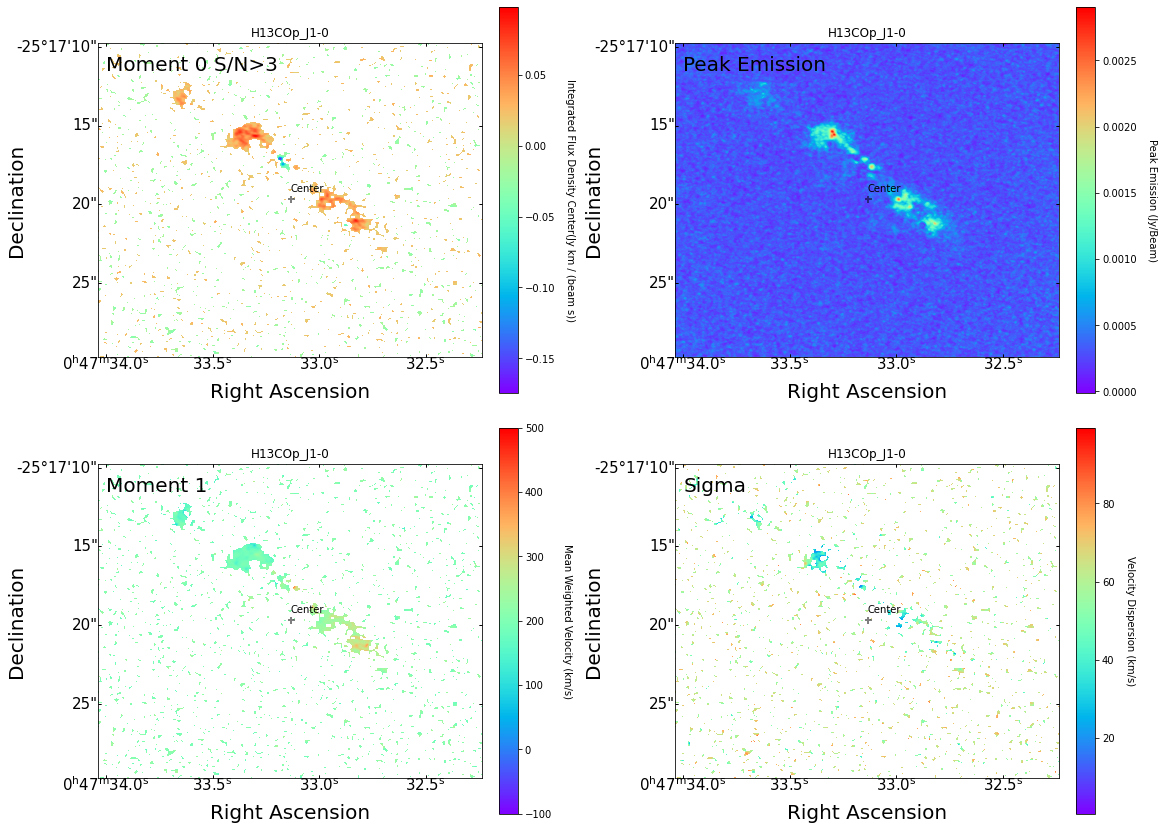

In [4]:
#H13CO+_J1-0, 86.75428840 GHz, ref: https://splatalogue.online//sp_basic.php?el1=el1&el2=el2&ls1=ls1&ls5=ls5&displayRecomb=displayRecomb&displayLovas=displayLovas&displaySLAIM=displaySLAIM&displayJPL=displayJPL&displayCDMS=displayCDMS&displayToyaMA=displayToyaMA&displayOSU=displayOSU&displayLisa=displayLisa&displayRFI=displayRFI&data_version=v3.0&no_atmospheric=no_atmospheric&no_potential=no_potential&no_probable=no_probable&include_only_nrao=include_only_nrao&show_orderedfreq_only=show_orderedfreq_only&sid%5B%5D=38&chemical_name=&band%5B%5D=any&redshift=&energy_range_from=&energy_range_to=&energy_range_type=el_cm1&frequency_units=GHz&from=&to=&submit=Search


#_and_SiO_J2-1 86.84696000 GHz

# Use this to find freq range: regpix.meta['restfreq'] = [100 * u.GHz] # rest frequency 


#Here we specify the frequency and range of velocities (up to 320 m/s) and make a cube with only the H13CO+ data

path = 'H13COp_J1-0_SiO_J2-1.cube.fits'

cubeB = SpectralCube.read(path)

cubeB.allow_huge_operations=True


######### Make the same thing but with zoomed in images


# ex: c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')


cen_p1 = SkyCoord('00h47m34.034s', '-25d17m29.68s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.234s', '-25d17m09.68s', frame='icrs')


regpix = regions.RectanglePixelRegion(regions.PixCoord(int(cubeB.shape[1]/2), int(cubeB.shape[1]/2)), width=int(cubeB.shape[2]*3), height=int(cubeB.shape[1]*3))  
regpix.meta['range'] = [100 * u.km/u.s, 318 * u.km/u.s] # spectral range 
regpix.meta['restfreq'] = 86.75428840*u.GHz # rest frequency 
regpix.meta['veltype'] = 'OPTICAL' # velocity convention 
scb = cubeB.subcube_from_regions([regpix])  #Make the subcube with the specified frequency
sc = scb.with_spectral_unit(u.km/u.s,velocity_convention="radio",rest_value=86.75428840*u.GHz)

scW = sc.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

sc.write("H13CO_Plus_1_0.fits",overwrite=True)
subcube = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position



subcube.allow_huge_operations=True
moment_0_sub  = subcube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map_sub   = subcube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1_sub  = subcube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map_sub = subcube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 

#Find Noise 
Np1 = SkyCoord('00h47m34.3s', '-25d17m11s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m34.0s', '-25d17m10s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc1 = sc[0:int(len(sc)/3),NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]].moment(order=0,how='slice') # Make a subcube away from the signals
#Find StandardDev of this noise cube
m1=Nsc1.std()/u.Jy*u.beam/u.km*u.s

print(m1)
print(moment_0_sub[0][0])

badpixS = pylab.where(abs(moment_0_sub.hdu.data)<m1*3)                 # Get ready to mask the data based on moment map
moment_0_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
moment_1_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
sigma_map_sub.hdu.data[badpixS] = np.nan                         # Mask the velocity dispersion map

scWCS = subcube.wcs[:][:][0]


########


fig1 = pylab.figure(1,figsize=(15,15))


######Moment 0 and Max map

ax3 = pylab.subplot(2,2,1,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im3 = pylab.imshow(moment_0_sub.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(Jy km / (beam s))',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0 S/N>3',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax4 = pylab.subplot(2,2,2, projection=scWCS)
RA = ax4.coords[0]                                                                  # 
Dec = ax4.coords[1]
im4=pylab.imshow(max_map_sub.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax4.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im4,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Peak Emission (Jy/Beam)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


pylab.tight_layout(w_pad=10,h_pad=5)



#########Moment 1 and Sigma


ax7 = pylab.subplot(2,2,3,projection=scWCS) 
RA = ax7.coords[0]                                                                  # 
Dec = ax7.coords[1]
im7 = pylab.imshow(moment_1_sub.hdu.data,cmap='rainbow',vmin=-100,vmax=500)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im7,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax8 = pylab.subplot(2,2,4, projection=scWCS)
RA = ax8.coords[0]                                                                  # 
Dec = ax8.coords[1]
im8=pylab.imshow(sigma_map_sub.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax8.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im8,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction") 
pylab.tight_layout(w_pad=10,h_pad=-10)
ax3.set_title("H13COp_J1-0")
ax4.set_title("H13COp_J1-0")
ax7.set_title("H13COp_J1-0")
ax8.set_title("H13COp_J1-0")

fig1.savefig(bbox_inches='tight',fname="NGC253_H13CO+_J1-0_Integrated_Full_Note.jpeg")


In [ ]:


#SiO_J2-1 86.84696000 GHz, ref: https://splatalogue.online//sp_basic.php?el1=el1&el2=el2&ls1=ls1&ls5=ls5&displayRecomb=displayRecomb&displayLovas=displayLovas&displaySLAIM=displaySLAIM&displayJPL=displayJPL&displayCDMS=displayCDMS&displayToyaMA=displayToyaMA&displayOSU=displayOSU&displayLisa=displayLisa&displayRFI=displayRFI&data_version=v3.0&no_atmospheric=no_atmospheric&no_potential=no_potential&no_probable=no_probable&include_only_nrao=include_only_nrao&show_orderedfreq_only=show_orderedfreq_only&sid%5B%5D=38&chemical_name=&band%5B%5D=any&redshift=&energy_range_from=&energy_range_to=&energy_range_type=el_cm1&frequency_units=GHz&from=&to=&submit=Search

#(and) H13CO+_J1-0, 86.75428840 GHz

# Use this to find freq range: regpix.meta['restfreq'] = [100 * u.GHz] # rest frequency 


#Here we specify the frequency and range of velocities (up to 320 m/s) and make a cube with only the H13CO+ data

path = 'H13COp_J1-0_SiO_J2-1.cube.fits'
cubeB = SpectralCube.read(path)
 
#print(cubeB.shape[1])

regpix = regions.RectanglePixelRegion(regions.PixCoord(int(cubeB.shape[1]/2), int(cubeB.shape[1]/2)), width=int(cubeB.shape[1]-1), height=int(cubeB.shape[2]-1))  
regpix.meta['range'] = [100 * u.km/u.s, 300 * u.km/u.s] # spectral range 
regpix.meta['restfreq'] = 86.84696000*u.GHz # rest frequency 
regpix.meta['veltype'] = 'OPTICAL' # velocity convention 
scb = cubeB.subcube_from_regions([regpix])  #Make the subcube with the specified frequency
sc = scb.with_spectral_unit(u.km/u.s,velocity_convention="radio",rest_value=86.84696000*u.GHz)

sc.write("SiO_2_1.fits",overwrite=True)
cen_p1 = SkyCoord('00h47m34.034s', '-25d17m29.68s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.234s', '-25d17m09.68s', frame='icrs')

scW = sc.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]


subcube = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position




subcube.allow_huge_operations=True
moment_0_sub  = subcube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map_sub   = subcube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1_sub  = subcube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map_sub = subcube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 

#Find Noise 
Np1 = SkyCoord('00h47m34.3s', '-25d17m11s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m34.0s', '-25d17m10s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc1 = sc[0:int(len(sc)/3),NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]].moment(order=0,how='slice') # Make a subcube away from the signals
#Find StandardDev of this noise cube
m1=Nsc1.std()/u.Jy*u.beam/u.km*u.s

print(m1)
print(moment_0_sub[0][0])

badpixS = pylab.where(abs(moment_0_sub.hdu.data)<m1*4)                 # Get ready to mask the data based on moment map
moment_0_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
moment_1_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
sigma_map_sub.hdu.data[badpixS] = np.nan                         # Mask the velocity dispersion map

scWCS = subcube.wcs[:][:][0]


########


fig1 = pylab.figure(1,figsize=(15,15))


######Moment 0 and Max map

ax3 = pylab.subplot(2,2,1,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im3 = pylab.imshow(moment_0_sub.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(Jy km / (beam s))',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0 S/N>4',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax4 = pylab.subplot(2,2,2, projection=scWCS)
RA = ax4.coords[0]                                                                  # 
Dec = ax4.coords[1]
im4=pylab.imshow(max_map_sub.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax4.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im4,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Peak Emission (Jy/Beam)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


pylab.tight_layout(w_pad=10,h_pad=5)



#########Moment 1 and Sigma


ax7 = pylab.subplot(2,2,3,projection=scWCS) 
RA = ax7.coords[0]                                                                  # 
Dec = ax7.coords[1]
im7 = pylab.imshow(moment_1_sub.hdu.data,cmap='rainbow',vmin=-100,vmax=500)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im7,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax8 = pylab.subplot(2,2,4, projection=scWCS)
RA = ax8.coords[0]                                                                  # 
Dec = ax8.coords[1]
im8=pylab.imshow(sigma_map_sub.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax8.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im8,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction") 
pylab.tight_layout(w_pad=10,h_pad=-10)
ax3.set_title("SiO_J2-1")
ax4.set_title("SiO_J2-1")
ax7.set_title("SiO_J2-1")
ax8.set_title("SiO_J2-1")

fig1.savefig(bbox_inches='tight',fname="NGC253_SiO_J2-1_Integrated_Full_Note.jpeg")


In [ ]:
#H13CN_J1-0


path = 'H13CN_J1-0.cube.fits'

cube = SpectralCube.read(path) #Load the important axes
cheader = fits.getheader(path)  
w1 = WCS(cheader) 
w1 = w1.dropaxis(2)#Get rid of the different slices

cube.allow_huge_operations=True

# ex: c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')


cen_p1 = SkyCoord('00h47m34.034s', '-25d17m29.68s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.234s', '-25d17m09.68s', frame='icrs')

scP = SpectralCube.read(path)
sc = scP.with_spectral_unit(u.km/u.s,velocity_convention="radio")
scW = sc.wcs[:][:][0]


raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]


subcube = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube

subcube.allow_huge_operations=True
moment_0_sub  = subcube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map_sub   = subcube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1_sub  = subcube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map_sub = subcube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 

#Find Noise 
Np1 = SkyCoord('00h47m34.3s', '-25d17m11s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m34.0s', '-25d17m10s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc1 = sc[0:int(len(sc)/3),NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]].moment(order=0,how='slice') # Make a subcube away from the signals
#Find StandardDev of this noise cube
m1=Nsc1.std()/u.Jy*u.beam/u.km*u.s


badpixS = pylab.where(abs(moment_0_sub.hdu.data)<m1*3)                 # Get ready to mask the data based on moment map
moment_0_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
moment_1_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
sigma_map_sub.hdu.data[badpixS] = np.nan                         # Mask the velocity dispersion map

scWCS = subcube.wcs[:][:][0]


########


fig1 = pylab.figure(1,figsize=(15,15))


######Moment 0 and Max map

ax3 = pylab.subplot(2,2,1,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im3 = pylab.imshow(moment_0_sub.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(Jy km / (beam s))',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0 S/N>3',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax4 = pylab.subplot(2,2,2, projection=scWCS)
RA = ax4.coords[0]                                                                  # 
Dec = ax4.coords[1]
im4=pylab.imshow(max_map_sub.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax4.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im4,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Peak Emission (Jy/beam)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


pylab.tight_layout(w_pad=10,h_pad=5)



#########Moment 1 and Sigma


ax7 = pylab.subplot(2,2,3,projection=scWCS) 
RA = ax7.coords[0]                                                                  # 
Dec = ax7.coords[1]
im7 = pylab.imshow(moment_1_sub.hdu.data,cmap='rainbow',vmin=-100,vmax=500)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im7,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax8 = pylab.subplot(2,2,4, projection=scWCS)
RA = ax8.coords[0]                                                                  # 
Dec = ax8.coords[1]
im8=pylab.imshow(sigma_map_sub.hdu.data,cmap='rainbow',vmin=0,vmax=250)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax8.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im8,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction") 
pylab.tight_layout(w_pad=10,h_pad=-10)

ax3.set_title("H13CN_J1-0.cube.fits")
ax4.set_title("H13CN_J1-0.cube.fits")
ax7.set_title("H13CN_J1-0.cube.fits")
ax8.set_title("H13CN_J1-0.cube.fits")


fig1.savefig(bbox_inches='tight',fname="NGC253.H13CN_J1-0_Integrated_Full_Note.jpeg")

(81, 29, 79)
1.606412701257537
69.1436340211074 km / s
-0.3028299437119787 K


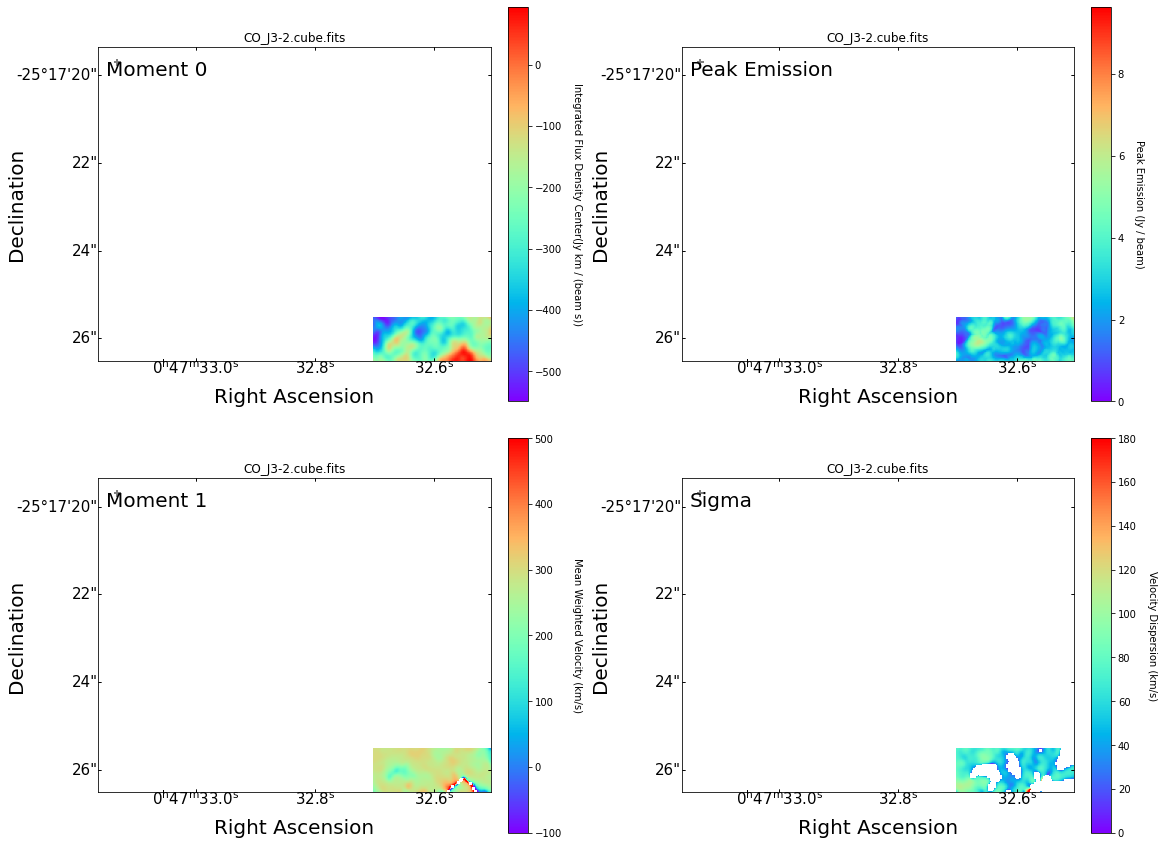

In [87]:
#CO_J3-2


path = 'ngc253_co32_hires_common.fits'

cube = SpectralCube.read(path) #Load the important axes
cheader = fits.getheader(path)  
w1 = WCS(cheader) 
w1 = w1.dropaxis(2)#Get rid of the different slices

cube.allow_huge_operations=True

# ex: c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')


cen_p1 = SkyCoord('00h47m32.7s', '-25d17m26.5s', frame='icrs')#These are away from the clusters
cen_p2 = SkyCoord('00h47m32.5s', '-25d17m25.5s', frame='icrs')
scP = SpectralCube.read(path)
scp2 = scP.with_spectral_unit(u.km/u.s,velocity_convention="radio")

scp2.allow_huge_operations=True   

sc = scp2.to(u.K)
scW = sc.wcs[:][:][0]

raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]


subcube = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube


subcube.allow_huge_operations=True
moment_0_sub  = subcube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map_sub   = subcube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1_sub  = subcube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map_sub = subcube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 


#Find Noise 
Np1 = SkyCoord('00h47m32.7s', '-25d17m26.5s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m32.5s', '-25d17m25.5s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc1 = sc[:,NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]] # Make a subcube away from the signals
print(np.shape(Nsc1))
#Find StandardDev of this noise cube
m1=Nsc1.std()/u.K

print(m1)
print(sigma_map_sub[0][0])

badpixS = pylab.where(abs(moment_0_sub.hdu.data)<m1*4)                 # Get ready to mask the data based on moment map
moment_1_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
sigma_map_sub.hdu.data[badpixS] = np.nan                         # Mask the velocity dispersion map

scWCS = subcube.wcs[:][:][0]


########


fig1 = pylab.figure(1,figsize=(15,15))


######Moment 0 and Max map

ax3 = pylab.subplot(2,2,1,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im3 = pylab.imshow(moment_0_sub.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(Jy km / (beam s))',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax4 = pylab.subplot(2,2,2, projection=scWCS)
RA = ax4.coords[0]                                                                  # 
Dec = ax4.coords[1]
im4=pylab.imshow(max_map_sub.data,cmap='rainbow',vmin=0,vmax=m1*6)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax4.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im4,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Peak Emission (Jy / beam)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


pylab.tight_layout(w_pad=10,h_pad=5)



#########Moment 1 and Sigma


ax7 = pylab.subplot(2,2,3,projection=scWCS) 
RA = ax7.coords[0]                                                                  # 
Dec = ax7.coords[1]
im7 = pylab.imshow(moment_1_sub.hdu.data,cmap='rainbow',vmin=-100,vmax=500)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im7,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax8 = pylab.subplot(2,2,4, projection=scWCS)
RA = ax8.coords[0]                                                                  # 
Dec = ax8.coords[1]
im8=pylab.imshow(sigma_map_sub.hdu.data,cmap='rainbow',vmin=0,vmax=180)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax8.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im8,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction") 
pylab.tight_layout(w_pad=10,h_pad=-10)
print(subcube[0][0][0])
ax3.set_title("CO_J3-2.cube.fits")
ax4.set_title("CO_J3-2.cube.fits")
ax7.set_title("CO_J3-2.cube.fits")
ax8.set_title("CO_J3-2.cube.fits")
fig1.savefig(bbox_inches='tight',fname="NGC253.CO_J3-2_Integrated_Full_Note.jpeg")

In [ ]:
#CCH_N1-0.cube.fits


path = 'CCH_N1-0.cube.fits'

cube = SpectralCube.read(path) #Load the important axes
cheader = fits.getheader(path)  
w1 = WCS(cheader) 
w1 = w1.dropaxis(2)#Get rid of the different slices

cube.allow_huge_operations=True

# ex: c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')


cen_p1 = SkyCoord('00h47m34.034s', '-25d17m29.68s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.234s', '-25d17m09.68s', frame='icrs')

scP = SpectralCube.read(path)
sc = scP.with_spectral_unit(u.km/u.s,velocity_convention="radio")
scW = sc.wcs[:][:][0]


raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]


subcube = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube

subcube.allow_huge_operations=True
moment_0_sub  = subcube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map_sub   = subcube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1_sub  = subcube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map_sub = subcube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 

#Find Noise 
Np1 = SkyCoord('00h47m34.3s', '-25d17m11s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m34.0s', '-25d17m10s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc1 = sc[0:int(len(sc)/3),NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]].moment(order=0,how='slice') # Make a subcube away from the signals
#Find StandardDev of this noise cube
m1=Nsc1.std()/u.Jy*u.beam/u.km*u.s

print(m1)
print(moment_0_sub[0][0])

badpixS = pylab.where(abs(moment_0_sub.hdu.data)<m1*3)                 # Get ready to mask the data based on moment map
moment_0_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
moment_1_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
sigma_map_sub.hdu.data[badpixS] = np.nan                         # Mask the velocity dispersion map

scWCS = subcube.wcs[:][:][0]


########


fig1 = pylab.figure(1,figsize=(15,15))


######Moment 0 and Max map

ax3 = pylab.subplot(2,2,1,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im3 = pylab.imshow(moment_0_sub.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(Jy km / (beam s))',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0 S/N>3',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax4 = pylab.subplot(2,2,2, projection=scWCS)
RA = ax4.coords[0]                                                                  # 
Dec = ax4.coords[1]
im4=pylab.imshow(max_map_sub.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax4.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im4,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Peak Emission (Jy / beam)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
print(subcube[0][0][0])

pylab.tight_layout(w_pad=10,h_pad=5)



#########Moment 1 and Sigma


ax7 = pylab.subplot(2,2,3,projection=scWCS) 
RA = ax7.coords[0]                                                                  # 
Dec = ax7.coords[1]
im7 = pylab.imshow(moment_1_sub.hdu.data,cmap='rainbow',vmin=-100,vmax=500)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im7,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax8 = pylab.subplot(2,2,4, projection=scWCS)
RA = ax8.coords[0]                                                                  # 
Dec = ax8.coords[1]
im8=pylab.imshow(sigma_map_sub.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax8.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im8,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction") 
pylab.tight_layout(w_pad=10,h_pad=-10)

ax3.set_title("CCH_N1-0.cube.fits")
ax4.set_title("CCH_N1-0.cube.fits")
ax7.set_title("CCH_N1-0.cube.fits")
ax8.set_title("CCH_N1-0.cube.fits")



fig1.savefig(bbox_inches='tight',fname="CCH_N1-0.cube_Integrated_Full_Note.jpeg")

In [ ]:
#HC3N_J11-10




#HC3N_J11-10, 100.07639200 GHz, ref: CDMS


#_and_SO_J45-44 100.02964000? GHz, SO 3Σ v = 0	Sulfur Monoxide	100.02964000, 100.02964000	4( 5)- 4( 4)	-4.22740	0.38m	23.4748	33.7748	JPL
#No overlap until -140km/s

# Use this to find freq range: regpix.meta['restfreq'] = [100 * u.GHz] # rest frequency 


#Here we specify the frequency and range of velocities (up to 320 m/s) and make a cube with only the H13CO+ data

path = 'HC3N_J11-10_SO_J45-44.cube.fits'

cubeB = SpectralCube.read(path)

cubeB.allow_huge_operations=True


######### Make the same thing but with zoomed in images


# ex: c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')


cen_p1 = SkyCoord('00h47m34.034s', '-25d17m29.68s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.234s', '-25d17m09.68s', frame='icrs')


regpix = regions.RectanglePixelRegion(regions.PixCoord(int(cubeB.shape[1]/2), int(cubeB.shape[1]/2)), width=int(cubeB.shape[2]-1), height=int(cubeB.shape[1]-1))  
regpix.meta['range'] = [100 * u.km/u.s, 300 * u.km/u.s] # spectral range 
regpix.meta['restfreq'] = 100.07639200 *u.GHz # rest frequency 
regpix.meta['veltype'] = 'OPTICAL' # velocity convention 
scb = cubeB.subcube_from_regions([regpix])  #Make the subcube with the specified frequency
sc = scb.with_spectral_unit(u.km/u.s,velocity_convention="radio",rest_value=100.07639200*u.GHz)

scW = sc.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

sc.write("HC3N_11_10.fits",overwrite=True)
subcube = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube based on position


cube = SpectralCube.read(path) #Load the important axes
cheader = fits.getheader(path)  
w1 = WCS(cheader) 
w1 = w1.dropaxis(2)#Get rid of the different slices

cube.allow_huge_operations=True

# ex: c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')


cen_p1 = SkyCoord('00h47m34.034s', '-25d17m29.68s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.234s', '-25d17m09.68s', frame='icrs')

scP = SpectralCube.read(path)
sc = scP.with_spectral_unit(u.km/u.s,velocity_convention="radio")
scW = sc.wcs[:][:][0]


raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]


subcube = sc[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube

subcube.allow_huge_operations=True
moment_0_sub  = subcube.moment(order=0,how='slice')            # Calculate the Moment 0 map 
max_map_sub   = subcube.apply_numpy_function(np.nanmax,axis=0) # Calculate the Maximum map 
moment_1_sub  = subcube.moment(order=1,how='slice')            # Calculate the Moment 1 map 
sigma_map_sub = subcube.linewidth_sigma(how='slice')           # Calculate the velocity dispersion map 

#Find Noise 
Np1 = SkyCoord('00h47m34.3s', '-25d17m11s', frame='icrs')#These are away from the clusters
Np2 = SkyCoord('00h47m34.0s', '-25d17m10s', frame='icrs')
NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
Nsc1 = sc[0:int(len(sc)/3),NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]].moment(order=0,how='slice') # Make a subcube away from the signals
#Find StandardDev of this noise cube
m1=Nsc1.std()/u.Jy*u.beam/u.km*u.s

print(m1)
print(moment_0_sub[0][0])

badpixS = pylab.where(abs(moment_0_sub.hdu.data)<m1*3)                 # Get ready to mask the data based on moment map
moment_0_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
moment_1_sub.hdu.data[badpixS] = np.nan                          # Mask the moment 1 map
sigma_map_sub.hdu.data[badpixS] = np.nan                         # Mask the velocity dispersion map

scWCS = subcube.wcs[:][:][0]


########


fig1 = pylab.figure(1,figsize=(15,15))


######Moment 0 and Max map

ax3 = pylab.subplot(2,2,1,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im3 = pylab.imshow(moment_0_sub.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Integrated Flux Density Center(Jy km / (beam s))',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 0 S/N >3',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax4 = pylab.subplot(2,2,2, projection=scWCS)
RA = ax4.coords[0]                                                                  # 
Dec = ax4.coords[1]
im4=pylab.imshow(max_map_sub.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax4.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im4,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Peak Emission (Jy / beam)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Peak Emission',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  
print(subcube[0][0][0])

pylab.tight_layout(w_pad=10,h_pad=5)



#########Moment 1 and Sigma


ax7 = pylab.subplot(2,2,3,projection=scWCS) 
RA = ax7.coords[0]                                                                  # 
Dec = ax7.coords[1]
im7 = pylab.imshow(moment_1_sub.hdu.data,cmap='rainbow',vmin=-100,vmax=500)
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax7.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im7,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Mean Weighted Velocity (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Moment 1',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


ax8 = pylab.subplot(2,2,4, projection=scWCS)
RA = ax8.coords[0]                                                                  # 
Dec = ax8.coords[1]
im8=pylab.imshow(sigma_map_sub.hdu.data,cmap='rainbow')
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(scWCS.world_to_pixel(center)[0]),int(scWCS.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax8.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im8,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='Sigma',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction") 
pylab.tight_layout(w_pad=10,h_pad=-10)

ax3.set_title("HC3N_J11-10_SO_J45-44.cube.fits")
ax4.set_title("HC3N_J11-10_SO_J45-44.cube.fits")
ax7.set_title("HC3N_J11-10_SO_J45-44.cube.fits")
ax8.set_title("HC3N_J11-10_SO_J45-44.cube.fits")



fig1.savefig(bbox_inches='tight',fname="HC3N_J11-10_SO_J45-44_Integrated_Full_Note.jpeg")

# Part 8: Dendograms

noise: 0.5073068768590464 0.5073068768590464 nan NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits
noise: 0.5073068768590464 0.5073068768590464 nan NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits
() 0.5073068768590464 0.2648844753917301 K (252, 20, 54)
noise: 0.5354513120347881 0.5354513120347881 nan NGC_HCN_J1.cube.reproject.K-kms.pbcor.fits
noise: 0.5354513120347881 0.5354513120347881 nan NGC_HCN_J1.cube.reproject.K-kms.pbcor.fits
() 0.5354513120347881 -0.4995279051950448 K (252, 20, 54)
noise: 0.48746873240970096 0.48746873240970096 nan NGC_H13CN_J1_0.cube.reproject.K-kms.pbcor.fits
noise: 0.48746873240970096 0.48746873240970096 nan NGC_H13CN_J1_0.cube.reproject.K-kms.pbcor.fits
() 0.48746873240970096 -0.34680769880466195 K (252, 20, 54)
noise: 1.5264287758469108 1.5264287758469108 nan NGC_CO_J3_2.cube.reproject.K-kms.pbcor.fits
noise: 1.5264287758469108 1.5264287758469108 nan NGC_CO_J3_2.cube.reproject.K-kms.pbcor.fits
() 1.5264287758469108 nan K (252, 20, 54)
noise: 0.31260322427224174 

IndexError: list index out of range

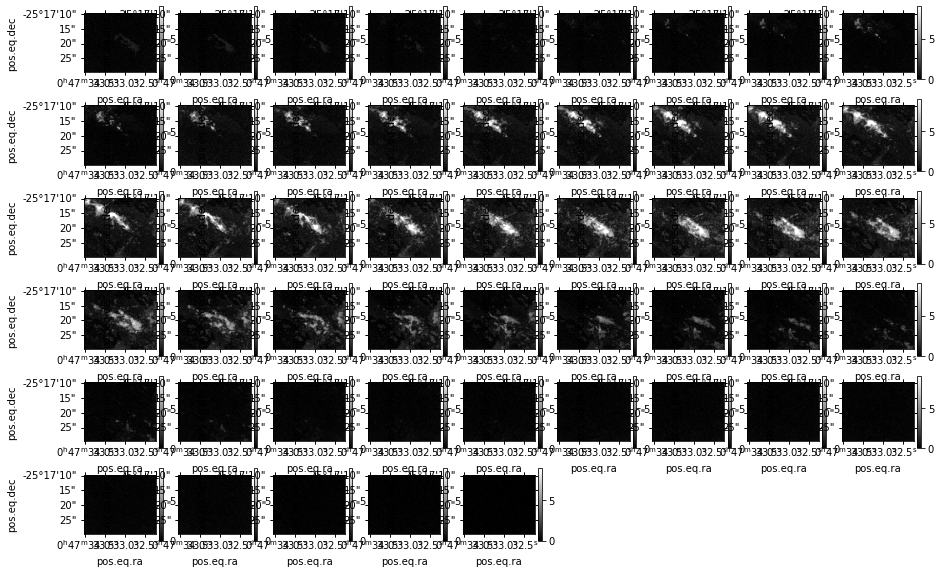

In [31]:
#Create a mask for all the cubes. 

###################No #If there is another cube that shares at least 67% of the structure, a structure is not to be masked.

#If there are two pixels that have greater than (some) sigma emission we will keep them (at most  (1-P)**2 chance of incorrect label)

#Assign greater confidence to more overlaps


paths = pylab.array(['NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_HCN_J1.cube.reproject.K-kms.pbcor.fits','NGC_H13CN_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_CO_J3_2.cube.reproject.K-kms.pbcor.fits','SiJ2_1.cube.reproject.K-kms.pbcor.fits','H13CoPJ1_0.cube.reproject.K-kms.pbcor.fits','CCH_N1.cube.reproject.K-kms.pbcor.fits','HC3N_J11.cube.reproject.K-kms.pbcor.fits','NGC_H13CN.cube.reproject.K-kms.pbcor.fits','NGC_HCO_Plus.cube.K-kms.pbcor.fits','NGC253_HCN.cube.reproject.K-kms.pbcor.fits'])
FP = pylab.array(['HCOp_J1-0.cube.fits','HCN_J1-0.cube.fits','H13CN_J1-0.cube.fits','ngc253_co32_hires_common.fits',"SiO_2_1.fits",  "H13CO_Plus_1_0.fits",'CCH_N1-0.cube.fits',"HC3N_11_10.fits",'NGC253.H13CN_4-3.pbcor.fits','NGC253.HCO+_4-3.pbcor.fits','NGC253.HCN_4-3.pbcor.fits'])





SCWs=[]
cds=[]
Ns = [] #get sigmas for all cubes
#Absorbtion_mask="Yes"
Absorbtion_mask="No"

#Find noises for first cubes
for i in range(len(FP)):
    sc = SpectralCube.read(paths[i])#FP[i])  
    
    sc_kms = sc.with_spectral_unit(u.km/u.s,velocity_convention="radio") # Change units from Hz to km/s
    
    sc_slab = sc_kms.spectral_slab(-200. *u.km / u.s, 700. *u.km / u.s)  # Crop out velocities we don't care about    
    sc_slab.allow_huge_operations=True    
    
    sc_K_kms = sc_slab.to(u.K)
    
    scW = sc_K_kms.wcs[:][:][0]

    #Find Noise 
    Np1 = SkyCoord('00h47m32.7s', '-25d17m26.5s', frame='icrs')#These are away from the clusters
    Np2 = SkyCoord('00h47m32.5s', '-25d17m25.5s', frame='icrs')
    NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
    NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
    
        
    
    no = 3
    m=0
    while(True):

        #For finding noise at far end velocity:
        
        #Q = sc_K_kms[int(len(sc_K_kms)-no):len(sc_K_kms),NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]]#NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]] # Make a subcube away from the signals
        
        #For noise at all velocities
        Q = sc_K_kms[:,NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]]#NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]] # Make a subcube away from the signals
        Nsc1 = Q.unmasked_copy()

        if(Absorbtion_mask=="Yes"):
            bp = np.where(Nsc1.hdu.data<0)
            Nsc1.hdu.data[bp]=np.nan
        
            
        #Find StandardDev of this noise cube
        #m=Nsc1.std(axis=0)/u.K
        m=np.nanmean(np.nanstd(Nsc1.hdu.data,axis=0))#RMS noise over all channels
        
        no+=1
        print('noise:',float(np.nanmax(m)),str(float(np.nanmax(m))), str(np.nan),paths[i])
        if(float(np.nanmax(m))!=0.0 and str(float(np.nanmax(m))) != str(np.nan)):
            print('noise:',float(np.nanmax(m)),str(float(np.nanmax(m))), str(np.nan),paths[i])
            break
            
    print(np.shape(m),m,Nsc1[0][0][0],np.shape(Nsc1))
    
    Ns.append(m)
    
#Find noises for pre-masked cubes

'''
for i in range(len(FP)-3,len(FP)):
    sc = SpectralCube.read(FP[i])  
    
    sc_kms = sc.with_spectral_unit(u.km/u.s,velocity_convention="radio") # Change units from Hz to km/s
    
    sc_slab = sc_kms.spectral_slab(-500. *u.km / u.s, 1000. *u.km / u.s)  # Crop out velocities we don't care about    
    sc_slab.allow_huge_operations=True    
    
    sc_K_kms = sc_slab.to(u.K)
    
    scW = sc_K_kms.wcs[:][:][0]

    #Find Noise. Should be the minimum value since it must be at least 3 sigma to be unmasked
    
    Nsc1 = sc_K_kms.unmasked_copy()
    
    
    bp = np.where(Nsc1.hdu.data<=0)
    
    Nsc1.hdu.data[bp]=np.nan
    m=np.nanmin(Nsc1)/u.K
    print(m,np.shape(Nsc1))
    Ns.append(m)
'''  
    
#print(Ns)

for i in range(1):
    cube=SpectralCube.read(paths[i])
    #print(cube.max(axis=0)[0][0]/u.K,Ns[i][0][0])
    #spatial_mask = cube.max(axis=0)/u.K > 3*Ns[i]        
    
    #cubeM = cube.with_mask(spatial_mask)
    #print(np.shape(cube),np.shape(cubeM))
    cd = cube.hdu.data
    #cds.append(cd)
    #print(len(cds))
    #SCWs.append(cube.wcs[:][:][0])

Confidences=cd

pix = np.where(Confidences != 0)
Confidences[pix] = 0 
Abs_Mask=np.copy(Confidences)
H13CN_MASK = np.copy(Confidences) 
H13COP_MASK = np.copy(Confidences) 
#print(Confidences.shape)
print(len(paths),len(FP),len(cds),len(Ns))

for i in range(len(paths)):
    cube=SpectralCube.read(paths[i])
    
    cd = cube.hdu.data
    if(Absorbtion_mask=="No"):
        GP = np.where(abs(cd)>Ns[i]*2)#No abs for only emission
    if(Absorbtion_mask=="Yes"):
        GP = np.where(cd>Ns[i]*2)#No abs for only emission
    NP = np.where(cd<0) 
    if(i ==0):
        GPX = np.where(abs(cd)>Ns[i]*1)
        H13COP_MASK[GPX] = 1#Mask for H13CO, only using HCO as a mask
        np.save('H13COP_MASK_NGC',H13COP_MASK)
    if(i ==1):
        GPX = np.where(abs(cd)>Ns[i]*1)
        H13CN_MASK[GPX] = 1#Mask for H13CN, only using HCN as a mask
        np.save('H13CN_MASK_NGC',H13CN_MASK)
    print(np.shape(GP))
    print(len(Confidences))
    Confidences[GP]+=1
    
    Abs_Mask[NP]+=1
np.save('Confidence_data',Confidences)
np.save('Noises_K',Ns)
print(Confidences.shape)


   
print(Confidences.shape)

#Create a plot of all the confidence values

fig1 = pylab.figure(1,figsize=(15,15))


######Moment 0 and Max map
#print(SCWs[0])
#print(Confidences.shape)0
for n in np.arange(0,int(len(Confidences)/5)):   
    
    # Now we loop through each slice (averaged channels) 
    #ax = pylab.subplot(5,5,n+1,projection=wcsU) # We plot them in a grid    
    ax = pylab.subplot(9,9,n+1,projection=scW) # We plot them in a grid    
    #im = pylab.imshow(SC_CM.hdu.data[n],cmap='gray',vmin=0,vmax=m*8)
    RA = ax.coords[0]                                                                  # 
    Dec = ax.coords[1]
    im = pylab.imshow(np.nanmean(Confidences[n*5:5*n+5],axis=0),cmap='gray',vmin=0,vmax=9)
    cb=pylab.colorbar(im,fraction=0.046,pad=0.04)  
    
'''
ax = pylab.subplot(1,1,1,projection=SCWs[0]) 
RA = ax.coords[0]                                                                  # 
Dec = ax.coords[1]
im = pylab.imshow(Confidences[int(len(Confidences)*.5)],cmap='rainbow')
'''
center = SkyCoord('00h47m33.134s' ,'-25d17m19.68s',frame='icrs')
y,x = [int(SCWs[0].world_to_pixel(center)[0]),int(scW.world_to_pixel(center)[1])]
pylab.plot(y,x,'+',ms=7,mec='black',mfc='black',mew=2,alpha=.5)
pylab.annotate("Center",(y,x+16))
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im,fraction=0.046,pad=0.04)                                     
cb.set_label(label='Number of overlaps',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Confidence',fontsize=20,xy=(0.02,0.91),xycoords="axes fraction")  


np.save('Confidence_data',Confidences)
np.save('Noises_K',Ns)
np.save("Abs_Pix_NGC",Abs_Mask)
#Define common structures

#for i in range(len(paths)):


In [24]:
Names=[1,2,3,4,5,6,7,8,9,10,11]

Bars = np.load("CZM_Beam_Area_Ratios.npy")
NBars = np.load("NGC_Beam_Area_Ratios.npy")

SpecRes = np.load("CZM_Sres.npy")
NSpecRes = np.load("NGC_Sres.npy")

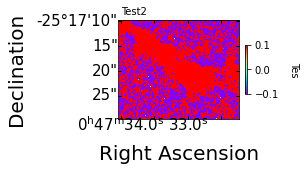

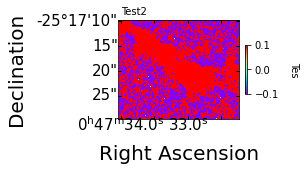

In [58]:

#Create a function that uses the dendrogram input to calculate all the quantities, and has the size and linewidth requirements of the Shetty paper
#Requires the computed dendrogram, the data from the line image, the velocity axis, and the data from the Continuum image, as well as metadata for the structures
#Finds Size, Linewidth, Luminosity, and Column Density of a structure for each structure and returns them in [[][]] arrays [Leaves][Branches]
#Continuum is in Jansky/Beam, Line data should have the unit specified in the metadata as 'data_unit'
vel,RA,Dec = scF.world[:,0,0]
def Dendro_Arrays(Dendrogram,LineData,DataVel,ContData,metadata):
    SizeA,SigmaA,LuminA,CDA = [[],[]],[[],[]],[[],[]],[[],[]]
    
    for t in Dendrogram.all_structures: 

        I = t.indices()
        Cont = True
        try:
            if(str(t.descendants[0]).find("branch") != -1):
                Cont = False #If we find a branch inside this structure t, then it is at least order two and will be discarded
        except:
            lop=12

        if(Cont):
            s = PPVStatistic(t,metadata=metadata)
            nproj_pix=len(set(zip(*tuple(I[i] for i in [1,2]))))
            v_IWM = np.nansum(LineData[I]*DataVel[I[0]]/u.km*u.s)/np.nansum(LineData[I])
            sig_Sh = np.sqrt(np.nansum(LineData[I]*(DataVel[I[0]]/u.km*u.s-v_IWM)**2)/np.nansum(LineData[I])) 





            #Require size greater than the beam and velocity greater than the spectral resolution
            if(sig_Sh>metadata["velocity_scale"]*u.s/u.km and ((np.sqrt(nproj_pix/np.pi)))>np.sqrt(metadata['beam_area_ratio'])/u.pix and ((np.sqrt(nproj_pix*area_res/np.pi)))*10**6 <24):
                #The flux from the continuum
                #Convert to Jansky from Jansky per beam:
                Cont_Flux=0

                proj = tuple(set(zip(*tuple(I[i] for i in [1,2]))))
                for lmi in range(len(proj)):

                    Cont_Flux+=ContData[proj[lmi]]
                Cont_Flux=Cont_Flux/metadata['beam_area_ratioc']*u.pix**2*u.beam*4*np.log(2)/u.beam*u.Jy#SHould be input as Jansky /beam and will be converted to Jansky, then to unitless

                lum = Flux_to_Lum(s.flux)

                #Flux from the strcuture
                s_flux = s.flux
                #print(s_flux/Cont_Flux,s_flux,Cont_Flux)
                #FR = s_flux/Cont_Flux

                #Line_Mass=Flux_to_Mass(freq,s_flux)/u.Hz/u.mJy/u.s/u.solMass*u.erg
                #Dust_Mass=Flux_to_Mass(freqC,Cont_Flux)#/u.Hz/u.mJy/u.s/u.solMass*u.erg
                Dust_Column = Flux_to_Mass(Cont_Flux)*Num_per_kg/(np.sqrt(nproj_pix*(area_res)/np.pi)**2*(3.086*10**24)**2)/np.pi*(1.989*10**30*u.kg/u.M_sun)/u.kg
                #print(s_flux/Dust_Column)#,Line_Mass,Dust_Mass)

                #Line_N = (Line_Mass/float(np.sqrt(nproj_pix*(area_res)/np.pi))/u.Mpc).to(u.kg)
                if(t.is_leaf):
                    SizeA[0].append((float(np.sqrt(nproj_pix*(area_res)/np.pi)))) #define size as shetty does
                    SigmaA[0].append((float(sig_Sh)))#
                    CDA[0].append(float(Dust_Column))
                    LuminA[0].append(float(lum*u.Hz*u.s/u.erg))
                if(t.is_branch	):
                    SizeA[1].append((float(np.sqrt(nproj_pix*(area_res)/np.pi)))) #define size as shetty does
                    SigmaA[1].append((float(sig_Sh)))#
                    CDA[1].append(float(Dust_Column))
                    LuminA[1].append(float(lum*u.Hz*u.s/u.erg))
    return SizeA,SigmaA,CDA,LuminA

#Make a function to make an image 

#Data to plot, minimum of color bar, maximum, WCS projection for coords, and position of the image in the larger figure
def Make_Plot(Name,Name2,Data,vmin,vmax,WCS,rows,columns,index,show):
    
    axA = np.empty((rows,columns),dtype = type(pylab.subplot(1,1,1,projection=WCS)))
    ax = pylab.subplot(rows,columns,index,projection=WCS) 
    RA = ax.coords[0]                                                                  # 
    Dec = ax.coords[1]
    im = pylab.imshow(Data,vmin=vmin,vmax=vmax,cmap='rainbow')
    RA.set_ticks(size=-3)                                                                                      
    Dec.set_ticks(size=-3) 
    RA.set_ticklabel(exclude_overlapping=True) 
    Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
    pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
    pylab.ylabel('Declination',fontsize=20,labelpad=1)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 15)    
    cb=pylab.colorbar(im,fraction=0.016,pad=0.04)                                     
    cb.set_label(label=Name,fontsize=10,rotation=270,labelpad=20) 
    cb.ax.tick_params(which = 'major', labelsize = 10)   
    pylab.annotate(s=Name2,fontsize=10,xy=(0.02,1.05),xycoords="axes fraction")  
    if(show==True):
        pylab.show()
def Make_Plot_Anno(Name,Name2,Data,vmin,vmax,WCS,rows,columns,index,show,pos1,pos2):
    
    axA = np.empty((rows,columns),dtype = type(pylab.subplot(1,1,1,projection=WCS)))
    ax = pylab.subplot(rows,columns,index,projection=WCS) 
    RA = ax.coords[0]                                                                  # 
    Dec = ax.coords[1]
    im = pylab.imshow(Data,vmin=vmin,vmax=vmax,cmap='rainbow')
    RA.set_ticks(size=-3)                                                                                      
    Dec.set_ticks(size=-3) 
    RA.set_ticklabel(exclude_overlapping=True) 
    Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
    pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
    pylab.ylabel('Declination',fontsize=20,labelpad=1)
    ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
    cb=pylab.colorbar(im,fraction=0.016,pad=0.04)                                     
    cb.set_label(label=Name,fontsize=10,rotation=270,labelpad=20) 
    cb.ax.tick_params(which = 'major', labelsize = 10)   
    pylab.annotate(s=Name2,fontsize=10,xy=(pos1,pos2),xycoords="axes fraction")  
    if(show==True):
        pylab.show()
        
        
#Put this up here for the column density map
def Flux_to_Mass(flux):
    J_to_e = 10**-23*u.erg/u.s/u.cm**2/u.Hz/u.Jy
    flux_erg = flux*J_to_e
    L = 4*np.pi*(3.5*3.086*10**24)**2*flux_erg*u.cm**2 #Megaparsec is converted to cm
    
    
    a_850 = 6.7*10**19*u.erg/u.s/u.Hz/u.M_sun #6.7+-1.7
    
    M_mol = L/a_850#Just in Solar mass*1.989*10**30*u.kg/u.M_sun#Determines mass of the cont for 850 in kg
    return M_mol
def Flux_to_Lum(flux):
    J_to_e = 10**-23*u.erg/u.s/u.cm**2/u.Hz/u.Jy
    flux_erg = flux*J_to_e
    L = 4*np.pi*(3.5*3.086*10**24)**2*flux_erg*u.cm**2 #Megaparsec is converted to cm
    
    return L

#Return a cropped cube for some ra and dec, also crops the velocity axis if needed (0 for no crop)
def Crop(cube,WCS,Np1,Np2,BadVel,D2):
    NraDP1 = [int(scW.world_to_pixel(Np1)[0]),int(scW.world_to_pixel(Np1)[1])]
    NraDP2 = [int(scW.world_to_pixel(Np2)[0]),int(scW.world_to_pixel(Np2)[1])]
    if(D2==False):
        return cube[BadVel:np.shape(cube)[0]-BadVel,NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]]
    if(D2==True):
        return cube[NraDP1[1]:NraDP2[1],NraDP1[0]:NraDP2[0]]
    
Make_Plot("Tes","Test2",Q.moment0().hdu.data,0,0,Q.wcs[:][:][0],2,2,1,True)
Make_Plot("Tes","Test2",Q.moment0().hdu.data,0,0,Q.wcs[:][:][0],2,2,2,True)

HCOp-J4-3_Dend_AbsSigmas
NGC_HCO_Plus.cube.K-kms.pbcor.fits
[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 0. 1. 0.]] (252, 400, 488) (252, 400, 488)
[nan nan nan ... nan nan nan]
(252, 400, 488) (252, 400, 488)
0.12999999999999598 arcsec 0.169999999999992 arcsec
8.839999999997895 pix2
(657,)


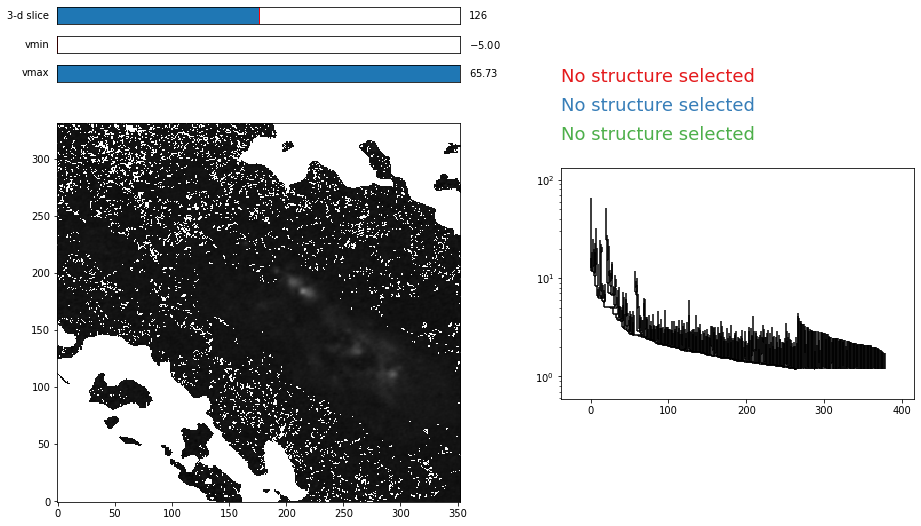

nan nan leaves:
Not Enough Well-Defined Structures


<Figure size 2160x2160 with 0 Axes>

In [15]:
#HCO+ 4-3

Num=9
Overlaps=1#6
Ram_Limiter=1#What percent of the cube my ram can handle
Name = "HCOp-J4-3_Dend_Abs"
name = "HCOp_j_4_3_CM_Abs.jpeg"


NameS = (Name+"Sigmas")
NameR = (Name+"Radii")

RNames=np.load('RNames.npy')
SNames=np.load('SNames.npy')

RNames[Num] = NameR
SNames[Num] = NameS
np.save("RNames",RNames)
np.save("SNames",SNames)
print(NameS)
paths = pylab.array(['NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_HCN_J1.cube.reproject.K-kms.pbcor.fits','NGC_H13CN_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_CO_J3_2.cube.reproject.K-kms.pbcor.fits','SiJ2_1.cube.reproject.K-kms.pbcor.fits','H13CoPJ1_0.cube.reproject.K-kms.pbcor.fits','CCH_N1.cube.reproject.K-kms.pbcor.fits','HC3N_J11.cube.reproject.K-kms.pbcor.fits','NGC_H13CN.cube.reproject.K-kms.pbcor.fits','NGC_HCO_Plus.cube.K-kms.pbcor.fits','NGC253_HCN.cube.reproject.K-kms.pbcor.fits'])
path = paths[Num]
print(path)
Confidences = np.load('Confidence_data.npy')

Noises = np.load('Noises_K.npy')
#Noises = Ns
m = Noises[Num]
#Make subcube
Qp = SpectralCube.read(path).with_spectral_unit(u.km/u.s,velocity_convention="radio")
Qp.allow_huge_operations=True

Q = Qp.to(u.K).spectral_slab(-200. *u.km / u.s, 700. *u.km / u.s)



sc = Q.unmasked_copy()
scQ = Q
scW = sc.wcs[:][:][0]
print(Confidences[0],Confidences.shape,sc.hdu.data.shape)
BP = np.where(Confidences<Overlaps)#Overlaps)
del Confidences
sc.hdu.data[BP]=np.nan
print(sc.hdu.data[BP])
dat = sc.hdu.data[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
print(np.shape(dat),np.shape(sc))
scn = sc[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
scQn = scQ[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
cen_p1 = SkyCoord('00h47m33.9s', '-25d17m26.8s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.6s', '-25d17m10.2s', frame='icrs')

#cen_p1 = SkyCoord('00h47m33.6s', '-25d17m16.8s', frame='icrs')
#cen_p2 = SkyCoord('00h47m33.3s', '-25d17m14.2s', frame='icrs')

scW = scn.wcs[:][:][0]
scQW = scQn.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
datn = dat[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
scF = scn[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
raQDP1 = [int(scQW.world_to_pixel(cen_p1)[0]),int(scQW.world_to_pixel(cen_p1)[1])]
raQDP2 = [int(scQW.world_to_pixel(cen_p2)[0]),int(scQW.world_to_pixel(cen_p2)[1])]
scQF = scQn[:,raQDP1[1]:raQDP2[1],raQDP1[0]:raQDP2[0]] # Make a subcube
scWCS = scF.wcs[:][:][0]
wcs = scF.wcs[:][:][0]
wcsQ = scQF.wcs[:][:][0]

#Unload all the unimportant vars

del BP
del paths


header = fits.getheader(path)

#make metadata for the dendrogram
metadata = {}

metadata['data_unit'] = u.Jy / u.beam
metadata['arc_per_pix'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix']**2 

print(metadata['beam_minor'],metadata['beam_major'])
print(beam_area_ratio)
#metadata["wcs"] = wcs
metadata["velocity_scale"] = abs(header["CDELT3"])*u.km/u.s#3.3714064157379937*u.km/u.s
metadata["distance"] = 3.5*u.Mpc

d = astrodendro.Dendrogram.compute(datn,min_delta=m,min_value=m*5,min_npix=50) #The main culprit



vel,NA,na = sc.world[:,0,0]

##Analyze dendograms
print(np.shape(d))

v = d.viewer()
v.show()
p=d.plotter()
fig = plt.figure(1,figsize=(30,30))

scU = SpectralCube.read(path)  
scWU = scU.wcs[:][:][0]
raDP1U = [int(scWU.world_to_pixel(cen_p1)[0]),int(scWU.world_to_pixel(cen_p1)[1])]
raDP2U = [int(scWU.world_to_pixel(cen_p2)[0]),int(scWU.world_to_pixel(cen_p2)[1])]
scNU = scU[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),raDP1U[1]:raDP2U[1],raDP1U[0]:raDP2U[0]] # Make a subcube based on position
scWU = scNU.wcs[:][:][0]
#####
SC_KMSU = scNU.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMSU.allow_huge_operations=True
SC_K_KMSU = SC_KMSU.to(u.K)
SC_K_KMS_slabU = SC_K_KMSU.spectral_slab(-888. *u.km / u.s, 888. *u.km / u.s)  # Extract a subset of the velocities
ds=20
SC_CM = SC_K_KMS_slabU.downsample_axis(ds,axis=0) # Here we use downsampling to bin (average)the data # into coarse bins (broad channels) with width ~ 11 km/s    
vel, dec, ra = SC_CM.world[:,0,0]           # For plotting purposes, I want to know the average velocity
wcsU = SC_CM.wcs[:][:][0]
#Done making unmasked CM

noplot=True #produce plot of channel maps and contours? y/n

for n in np.arange(0,len(SC_CM.hdu.data)):   
    if(noplot):
        break
    # Now we loop through each slice (averaged channels) 
    #ax = pylab.subplot(5,5,n+1,projection=wcsU) # We plot them in a grid    
    ax = pylab.subplot(5,5,n+1,projection=sc.wcs[:][:][0]) # We plot them in a grid    
    im = pylab.imshow(SC_CM.hdu.data[n],cmap='gray',vmin=0,vmax=m*8)
    #print(np.shape(datn),np.shape(np.nanmean(datn[n:n+9],axis=0)))
    #im = pylab.imshow(np.nanmean(datn[n*ds:ds*n+ds-1],axis=0),cmap='gray',vmin=0,vmax=m*8)
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-1)                                                                                      
    Dec.set_ticks(size=-1) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(0,0,s="%i km/s"%(vel.value[n]),fontsize=30,c="Red") # Print the velocity of each averaged channel
    ax.tick_params(axis = 'both', which = 'major', labelsize = 12) 
    cb=pylab.colorbar(im,fraction=0.035,pad=0.01) 
    if n==len(SC_CM.hdu.data)-1:
        pylab.xlabel("Right Ascension",fontsize=30)
        pylab.ylabel("Declination",labelpad=-13,fontsize=30,rotation=90)
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
    pylab.tight_layout(w_pad=6,h_pad=-0)
    
    for t in d.all_structures:
        
        I = t.indices()
        s = PPVStatistic(t,metadata=metadata)
        if(s.v_rms>1*u.pix and s.radius>1*u.pix and  s.radius<24*2*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 2):
            k=0
            for ll in range(len(I[0])):
                if(I[0][ll] - int((n+.5)*ds) ==0):
                    k=int((n+.5)*ds)
                    break
            for ll in range(len(I[0])):
                if(k==int((n+.5)*ds)  and n!= 0):
                    break
                miN=3
                if(abs(I[0][ll] - int((n+.5)*ds)) <miN):
                    k=I[0][ll]
                    break
            if(k!=0):
                p.plot_contour(ax, structure=t, lw=1, colors='red',alpha=.1,slice = k)
                ellipse = s.to_mpl_ellipse(edgecolor='pink', facecolor='pink',alpha=.1)
                ax.add_patch(ellipse)
            #print(t.indices())
            #break
if (noplot==False):
    fig.savefig(bbox_inches='tight',fname=name)



pc_per_pixel = metadata['arc_per_pix']/3600/180*np.pi/u.arcsec*metadata['distance']/u.Mpc
sig_per_pixel=np.nan#metadata['spectral_resolution']/u.pix
radsL=np.array([])
radsB=np.array([])
sigmasL=np.array([])
sigmasB=np.array([])

for t in d.all_structures: 
    
    I = t.indices()
    s = PPVStatistic(t,metadata=metadata)
        
    if(s.v_rms > 2*u.km/u.s and s.v_rms*s.radius**2>1*metadata["velocity_scale"]*u.pix**2*3 and s.radius<24*2*u.pix and s.radius>4.8*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 2):
        
        
        
        
        
        
        
        if(t.is_leaf):
            radsL=np.append(radsL,(float(s.radius*pc_per_pixel))) #convert pixel to pc (then make it dimensionless)
            sigmasL=np.append(sigmasL,(float(s.v_rms*u.s/u.km)))#Convert pixel to velocity (then make it dimensionless)
        if(t.is_branch	):
            radsB=np.append(radsB,(float(s.radius*pc_per_pixel))) #convert pixel to pc (then make it dimensionless)
            sigmasB=np.append(sigmasB,(float(s.v_rms*u.s/u.km)))#Convert pixel to velocity (then make it dimensionless)



from scipy.optimize import curve_fit

def func(R,a,b):
    return a*R**(b)
try:
    popt, pcov = curve_fit(func, radsL*10**6, sigmasL)
except:
    popt, pcov = np.nan,np.nan
poptB, pcovB = curve_fit(func, radsB*10**6, sigmasB)

Rcon = np.concatenate((radsL,radsB))
Scon = np.concatenate((sigmasL,sigmasB))

poptCon, pcovCon = curve_fit(func, Rcon*10**6, Scon)
try:
    print(popt,pcov,"leaves:")
    print("a = ",popt[0],"+-",np.sqrt(pcov[0][0]))
    print("b = ",popt[1],"+-",np.sqrt(pcov[1][1]))
    print(poptB,pcovB,"branches:")
    print("a = ",poptB[0],"+-",np.sqrt(pcovB[0][0]))
    print("b = ",poptB[1],"+-",np.sqrt(pcovB[1][1]))
    print(poptCon,pcovCon,"All_structures:")
    print("a = ",poptCon[0],"+-",np.sqrt(pcovCon[0][0]))
    print("b = ",poptCon[1],"+-",np.sqrt(pcovCon[1][1]))

    fig = plt.figure()
    ax = pylab.subplot(2, 1, 1)
    xpL,xpB = ax.scatter(radsL*10**6,sigmasL),ax.scatter(radsB*10**6,sigmasB)
    xs=np.linspace(np.nanmin(Rcon*10**6),np.nanmax(Rcon*10**6),50)
    ysL,ysB,ysCon=func(xs,popt[0],popt[1]),func(xs,poptB[0],poptB[1]),func(xs,poptCon[0],poptCon[1])
    xpa1,xpa2,xpaTot = ax.plot(xs,ysL),ax.plot(xs,ysB),ax.plot(xs,ysCon)
    plt.xlabel("Size (pc)")
    plt.ylabel("Sigma (km/s)")
    pylab.show()
    ax2 = pylab.subplot(2, 1, 2)
    xpL,xpB = ax2.scatter(radsL*10**6,sigmasL),ax2.scatter(radsB*10**6,sigmasB)
    p,p2,p3 = ax2.plot(xs,ysL),ax2.plot(xs,ysB),ax2.plot(xs,ysCon)
    ax2.set_yscale('log')
    ax2.set_xscale('log')
    plt.xlabel("Size (pc)")
    plt.ylabel("Sigma (km/s)")
    pylab.show()

except:
    
    print("Not Enough Well-Defined Structures")
NameSL = (NameS+"_Leaves")
NameSB = (NameS+"_Branches")
NameRL = (NameR+"_Leaves")
NameRB = (NameR+"_Branches")

np.save(NameSL,sigmasL)
np.save(NameSB,sigmasB)
np.save(NameRL,radsL)
np.save(NameRB,radsB)

NGC253_HCN.cube.reproject.K-kms.pbcor.fits
[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 0. 1. 0.]] (252, 400, 488) (252, 400, 488)
[nan nan nan ... nan nan nan]
(252, 400, 488) (252, 400, 488)
0.12999999999999598 arcsec 0.169999999999992 arcsec
8.839999999997895 pix2
(8812,)


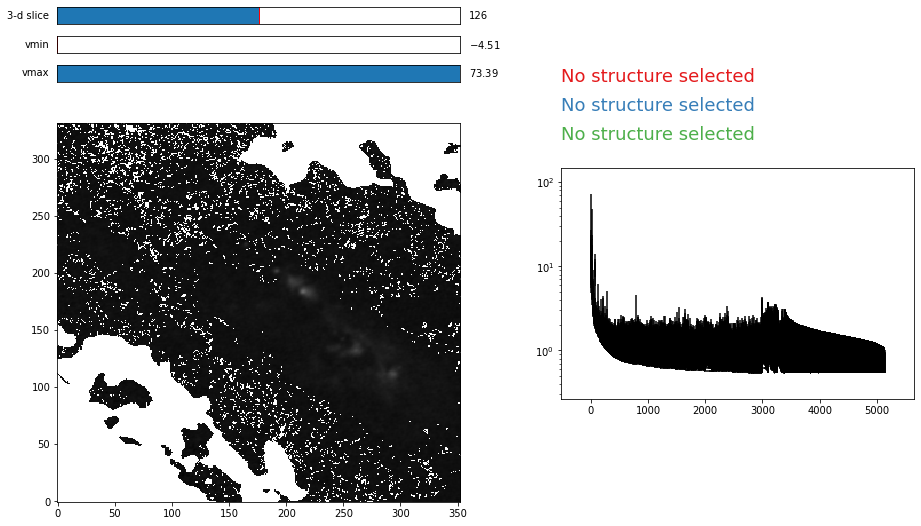

[8.14931183 0.04115283] [[inf inf]
 [inf inf]] leaves:
a =  8.149311827275785 +- inf
b =  0.04115283265542409 +- inf
[12.63400984  0.4320528 ] [[ 1.23511452e-01 -2.87187442e-03]
 [-2.87187442e-03  6.90136473e-05]] branches:
a =  12.63400983825368 +- 0.35144196066756106
b =  0.4320527979284707 +- 0.008307445295210008
[12.59403617  0.43295766] [[ 1.22926249e-01 -2.86722164e-03]
 [-2.86722164e-03  6.91180129e-05]] All_structures:
a =  12.594036165323427 +- 0.35060839764978796
b =  0.43295766100460165 +- 0.00831372436782962


<Figure size 2160x2160 with 0 Axes>

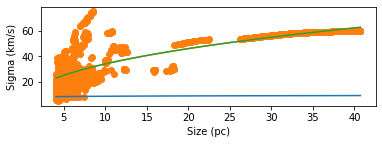

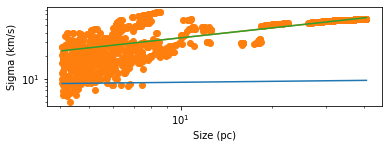

In [16]:
#HCN 4-3


Num = 10
Overlaps=1#4
Ram_Limiter = 1
Name = "HCN4-3_Abs"
name = "HCN4_3_CM_Contours_DS_10_Abs.jpeg"
NameS = (Name+"Sigmas")
NameR = (Name+"Radii")
RNames=np.load('RNames.npy')
SNames=np.load('SNames.npy')

RNames[Num] = NameR
SNames[Num] = NameS
np.save("RNames",RNames)
np.save("SNames",SNames)
paths = pylab.array(['NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_HCN_J1.cube.reproject.K-kms.pbcor.fits','NGC_H13CN_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_CO_J3_2.cube.reproject.K-kms.pbcor.fits','SiJ2_1.cube.reproject.K-kms.pbcor.fits','H13CoPJ1_0.cube.reproject.K-kms.pbcor.fits','CCH_N1.cube.reproject.K-kms.pbcor.fits','HC3N_J11.cube.reproject.K-kms.pbcor.fits','NGC_H13CN.cube.reproject.K-kms.pbcor.fits','NGC_HCO_Plus.cube.K-kms.pbcor.fits','NGC253_HCN.cube.reproject.K-kms.pbcor.fits'])
path = paths[Num]
print(path)
Confidences = np.load('Confidence_data.npy')

Noises = np.load('Noises_K.npy')
#Noises = Ns
m = Noises[Num]
#Make subcube
Q = SpectralCube.read(path)  
sc = Q.unmasked_copy()
scQ = Q
scW = sc.wcs[:][:][0]
print(Confidences[0],Confidences.shape,sc.hdu.data.shape)
BP = np.where(Confidences<Overlaps)#Overlaps)
del Confidences
sc.hdu.data[BP]=np.nan
print(sc.hdu.data[BP])
dat = sc.hdu.data[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
print(np.shape(dat),np.shape(sc))
scn = sc[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
scQn = scQ[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
cen_p1 = SkyCoord('00h47m33.9s', '-25d17m26.8s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.6s', '-25d17m10.2s', frame='icrs')

#cen_p1 = SkyCoord('00h47m33.6s', '-25d17m16.8s', frame='icrs')
#cen_p2 = SkyCoord('00h47m33.3s', '-25d17m14.2s', frame='icrs')

scW = scn.wcs[:][:][0]
scQW = scQn.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
datn = dat[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
scF = scn[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
raQDP1 = [int(scQW.world_to_pixel(cen_p1)[0]),int(scQW.world_to_pixel(cen_p1)[1])]
raQDP2 = [int(scQW.world_to_pixel(cen_p2)[0]),int(scQW.world_to_pixel(cen_p2)[1])]
scQF = scQn[:,raQDP1[1]:raQDP2[1],raQDP1[0]:raQDP2[0]] # Make a subcube
scWCS = scF.wcs[:][:][0]
wcs = scF.wcs[:][:][0]
wcsQ = scQF.wcs[:][:][0]

#Unload all the unimportant vars

del BP
del paths

#make metadata for the dendrogram
metadata = {}

metadata['data_unit'] = u.Jy / u.beam
metadata['arc_per_pix'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix']**2 

print(metadata['beam_minor'],metadata['beam_major'])
print(beam_area_ratio)
#metadata["wcs"] = wcs
metadata["velocity_scale"] = abs(header["CDELT3"])*u.km/u.s#3.3714064157379937*u.km/u.s
metadata["distance"] = 3.5*u.Mpc

d = astrodendro.Dendrogram.compute(datn,min_delta=m,min_value=m*5,min_npix=50) #The main culprit



header = fits.getheader(path)


vel,NA,na = sc.world[:,0,0]

##Analyze dendograms
print(np.shape(d))

v = d.viewer()
v.show()
p=d.plotter()
fig = plt.figure(1,figsize=(30,30))

scU = SpectralCube.read(path)  
scWU = scU.wcs[:][:][0]
raDP1U = [int(scWU.world_to_pixel(cen_p1)[0]),int(scWU.world_to_pixel(cen_p1)[1])]
raDP2U = [int(scWU.world_to_pixel(cen_p2)[0]),int(scWU.world_to_pixel(cen_p2)[1])]
scNU = scU[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),raDP1U[1]:raDP2U[1],raDP1U[0]:raDP2U[0]] # Make a subcube based on position
scWU = scNU.wcs[:][:][0]
#####
SC_KMSU = scNU.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMSU.allow_huge_operations=True
SC_K_KMSU = SC_KMSU.to(u.K)
SC_K_KMS_slabU = SC_K_KMSU.spectral_slab(-888. *u.km / u.s, 888. *u.km / u.s)  # Extract a subset of the velocities
ds=20
SC_CM = SC_K_KMS_slabU.downsample_axis(ds,axis=0) # Here we use downsampling to bin (average)the data # into coarse bins (broad channels) with width ~ 11 km/s    
vel, dec, ra = SC_CM.world[:,0,0]           # For plotting purposes, I want to know the average velocity
wcsU = SC_CM.wcs[:][:][0]
#Done making unmasked CM

noplot=True #produce plot of channel maps and contours? y/n

for n in np.arange(0,len(SC_CM.hdu.data)):   
    if(noplot):
        break
    # Now we loop through each slice (averaged channels) 
    #ax = pylab.subplot(5,5,n+1,projection=wcsU) # We plot them in a grid    
    ax = pylab.subplot(5,5,n+1,projection=sc.wcs[:][:][0]) # We plot them in a grid    
    im = pylab.imshow(SC_CM.hdu.data[n],cmap='gray',vmin=0,vmax=m*8)
    #print(np.shape(datn),np.shape(np.nanmean(datn[n:n+9],axis=0)))
    #im = pylab.imshow(np.nanmean(datn[n*ds:ds*n+ds-1],axis=0),cmap='gray',vmin=0,vmax=m*8)
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-1)                                                                                      
    Dec.set_ticks(size=-1) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(0,0,s="%i km/s"%(vel.value[n]),fontsize=30,c="Red") # Print the velocity of each averaged channel
    ax.tick_params(axis = 'both', which = 'major', labelsize = 12) 
    cb=pylab.colorbar(im,fraction=0.035,pad=0.01) 
    if n==len(SC_CM.hdu.data)-1:
        pylab.xlabel("Right Ascension",fontsize=30)
        pylab.ylabel("Declination",labelpad=-13,fontsize=30,rotation=90)
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
    pylab.tight_layout(w_pad=6,h_pad=-0)
    
    for t in d.all_structures:
        
        I = t.indices()
        s = PPVStatistic(t,metadata=metadata)
        if(s.v_rms>1*u.pix and s.radius>1*u.pix and  s.radius<24*2*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 2):
            k=0
            for ll in range(len(I[0])):
                if(I[0][ll] - int((n+.5)*ds) ==0):
                    k=int((n+.5)*ds)
                    break
            for ll in range(len(I[0])):
                if(k==int((n+.5)*ds)  and n!= 0):
                    break
                miN=3
                if(abs(I[0][ll] - int((n+.5)*ds)) <miN):
                    k=I[0][ll]
                    break
            if(k!=0):
                p.plot_contour(ax, structure=t, lw=1, colors='red',alpha=.1,slice = k)
                ellipse = s.to_mpl_ellipse(edgecolor='pink', facecolor='pink',alpha=.1)
                ax.add_patch(ellipse)
            #print(t.indices())
            #break
if (noplot==False):
    fig.savefig(bbox_inches='tight',fname=name)


pc_per_pixel = metadata['arc_per_pix']/3600/180*np.pi/u.arcsec*metadata['distance']/u.Mpc
sig_per_pixel=np.nan#metadata['spectral_resolution']/u.pix
radsL=np.array([])
radsB=np.array([])
sigmasL=np.array([])
sigmasB=np.array([])

for t in d.all_structures: 
    
    I = t.indices()
    s = PPVStatistic(t,metadata=metadata)
        
    if(s.v_rms > 2*u.km/u.s and s.v_rms*s.radius**2>1*metadata["velocity_scale"]*u.pix**2*3 and s.radius<24*2*u.pix and s.radius>4.8*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 2):
        
        
        
        
        
        
        
        if(t.is_leaf):
            radsL=np.append(radsL,(float(s.radius*pc_per_pixel))) #convert pixel to pc (then make it dimensionless)
            sigmasL=np.append(sigmasL,(float(s.v_rms*u.s/u.km)))#Convert pixel to velocity (then make it dimensionless)
        if(t.is_branch	):
            radsB=np.append(radsB,(float(s.radius*pc_per_pixel))) #convert pixel to pc (then make it dimensionless)
            sigmasB=np.append(sigmasB,(float(s.v_rms*u.s/u.km)))#Convert pixel to velocity (then make it dimensionless)



from scipy.optimize import curve_fit

def func(R,a,b):
    return a*R**(b)
try:
    popt, pcov = curve_fit(func, radsL*10**6, sigmasL) 
except:
    popt, pcov = np.nan,np.nan
poptB, pcovB = curve_fit(func, radsB*10**6, sigmasB)

Rcon = np.concatenate((radsL,radsB))
Scon = np.concatenate((sigmasL,sigmasB))

poptCon, pcovCon = curve_fit(func, Rcon*10**6, Scon)

try:
    print(popt,pcov,"leaves:")
    print("a = ",popt[0],"+-",np.sqrt(pcov[0][0]))
    print("b = ",popt[1],"+-",np.sqrt(pcov[1][1]))
    print(poptB,pcovB,"branches:")
    print("a = ",poptB[0],"+-",np.sqrt(pcovB[0][0]))
    print("b = ",poptB[1],"+-",np.sqrt(pcovB[1][1]))
    print(poptCon,pcovCon,"All_structures:")
    print("a = ",poptCon[0],"+-",np.sqrt(pcovCon[0][0]))
    print("b = ",poptCon[1],"+-",np.sqrt(pcovCon[1][1]))

    fig = plt.figure()
    ax = pylab.subplot(2, 1, 1)
    xpL,xpB = ax.scatter(radsL*10**6,sigmasL),ax.scatter(radsB*10**6,sigmasB)
    xs=np.linspace(np.nanmin(Rcon*10**6),np.nanmax(Rcon*10**6),50)
    ysL,ysB,ysCon=func(xs,popt[0],popt[1]),func(xs,poptB[0],poptB[1]),func(xs,poptCon[0],poptCon[1])
    xpa1,xpa2,xpaTot = ax.plot(xs,ysL),ax.plot(xs,ysB),ax.plot(xs,ysCon)
    plt.xlabel("Size (pc)")
    plt.ylabel("Sigma (km/s)")
    pylab.show()
    ax2 = pylab.subplot(2, 1, 2)
    xpL,xpB = ax2.scatter(radsL*10**6,sigmasL),ax2.scatter(radsB*10**6,sigmasB)
    p,p2,p3 = ax2.plot(xs,ysL),ax2.plot(xs,ysB),ax2.plot(xs,ysCon)
    ax2.set_yscale('log')
    ax2.set_xscale('log')
    plt.xlabel("Size (pc)")
    plt.ylabel("Sigma (km/s)")
    pylab.show()

except:
    
    print("Not Enough Well-Defined Structures")
NameSL = (NameS+"_Leaves")
NameSB = (NameS+"_Branches")
NameRL = (NameR+"_Leaves")
NameRB = (NameR+"_Branches")

np.save(NameSL,sigmasL)
np.save(NameSB,sigmasB)
np.save(NameRL,radsL)
np.save(NameRB,radsB)

['HCOp-J1_Dend_AbsRadii' 'HCN-J1_Dend_AbsRadii' 'H13CN-J1_AbsRadii'
 'CO 3-2_AbsRadii' '5' 'H13COp_1_0_AbsRadii' '7' '8' 'H13CN4_3_AbsRadii'
 'HCOp-J4-3_Dend_AbsRadii' 'HCN4-3_AbsRadii'] ['HCOp-J1_Dend_AbsSigmas' 'HCN-J1_Dend_AbsSigmas' 'H13CN-J1_AbsSigmas'
 'CO 3-2_AbsSigmas' '5' 'H13COp_1_0_AbsSigmas' '7' '8'
 'H13CN4_3_AbsSigmas' 'HCOp-J4-3_Dend_AbsSigmas' 'HCN4-3_AbsSigmas'] H13CN4_3_AbsRadii H13CN4_3_AbsSigmas
H13CN4_3_AbsSigmas
NGC_H13CN.cube.reproject.K-kms.pbcor.fits
[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 0. 1. 0.]] (252, 400, 488) (252, 400, 488)
[nan nan nan ... nan nan nan]
(252, 400, 488) (252, 400, 488)
0.12999999999999598 arcsec 0.169999999999992 arcsec
8.839999999997895 pix2
(168,)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
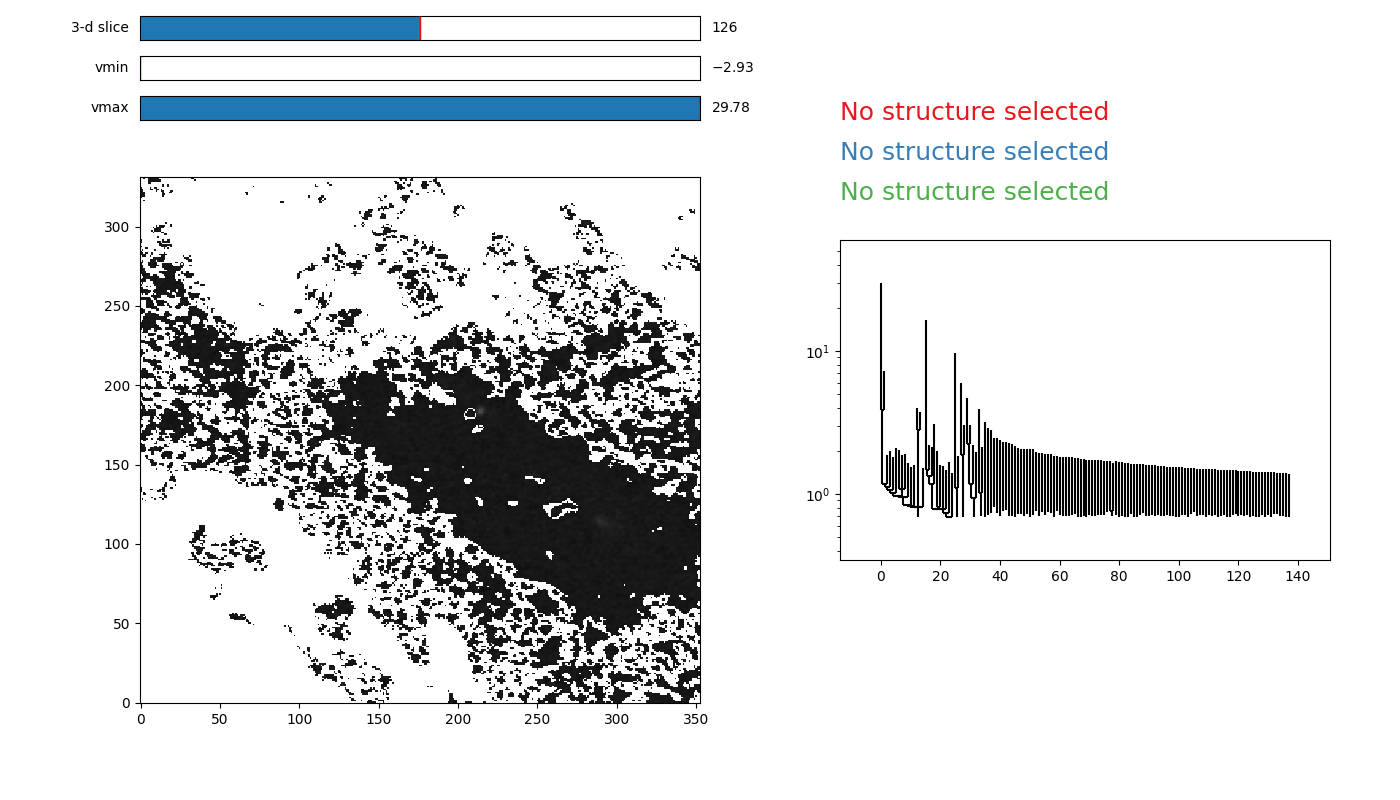

(8,)
nan nan leaves:
Not Enough Well-Defined Structures


In [3]:
#H13CN 4-3


Num = 8
Overlaps=1#5
Ram_Limiter = 1
Name = "H13CN4_3_Abs"
name = "H13CN4_3_CM_Contours_DS_10_Abs.jpeg"
NameS = (Name+"Sigmas")
NameR = (Name+"Radii")
RNames=np.load('RNames.npy')
SNames=np.load('SNames.npy')

RNames[Num] = NameR
SNames[Num] = NameS
print(RNames,SNames,NameR,NameS)
np.save("RNames",RNames)
np.save("SNames",SNames)

print(NameS)
paths = pylab.array(['NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_HCN_J1.cube.reproject.K-kms.pbcor.fits','NGC_H13CN_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_CO_J3_2.cube.reproject.K-kms.pbcor.fits','SiJ2_1.cube.reproject.K-kms.pbcor.fits','H13CoPJ1_0.cube.reproject.K-kms.pbcor.fits','CCH_N1.cube.reproject.K-kms.pbcor.fits','HC3N_J11.cube.reproject.K-kms.pbcor.fits','NGC_H13CN.cube.reproject.K-kms.pbcor.fits','NGC_HCO_Plus.cube.K-kms.pbcor.fits','NGC253_HCN.cube.reproject.K-kms.pbcor.fits'])
path = paths[Num]
print(path)
Confidences = np.load('Confidence_data.npy')
H13CN_MASK = np.load('H13CN_MASK_NGC.npy')
Noises = np.load('Noises_K.npy')
#Noises = Ns
m = Noises[Num]
#Make subcube
Q = SpectralCube.read(path)  
sc = Q.unmasked_copy()
scQ = Q
scW = sc.wcs[:][:][0]
print(Confidences[0],Confidences.shape,sc.hdu.data.shape)
#BP = np.where(Confidences<Overlaps)#Overlaps)
BP = np.where(H13CN_MASK<1) #Mask where HCN is not found >1 sigma
del Confidences
sc.hdu.data[BP]=np.nan
print(sc.hdu.data[BP])
dat = sc.hdu.data[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
print(np.shape(dat),np.shape(sc))
scn = sc[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
scQn = scQ[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
cen_p1 = SkyCoord('00h47m33.9s', '-25d17m26.8s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.6s', '-25d17m10.2s', frame='icrs')

#cen_p1 = SkyCoord('00h47m33.6s', '-25d17m16.8s', frame='icrs')
#cen_p2 = SkyCoord('00h47m33.3s', '-25d17m14.2s', frame='icrs')

scW = scn.wcs[:][:][0]
scQW = scQn.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
datn = dat[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
scF = scn[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
raQDP1 = [int(scQW.world_to_pixel(cen_p1)[0]),int(scQW.world_to_pixel(cen_p1)[1])]
raQDP2 = [int(scQW.world_to_pixel(cen_p2)[0]),int(scQW.world_to_pixel(cen_p2)[1])]
scQF = scQn[:,raQDP1[1]:raQDP2[1],raQDP1[0]:raQDP2[0]] # Make a subcube
scWCS = scF.wcs[:][:][0]
wcs = scF.wcs[:][:][0]
wcsQ = scQF.wcs[:][:][0]

#Unload all the unimportant vars

del BP
del paths
#make metadata for the dendrogram
header = fits.getheader(path)
metadata = {}

metadata['data_unit'] = u.Jy / u.beam
metadata['arc_per_pix'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix']**2 

print(metadata['beam_minor'],metadata['beam_major'])
print(beam_area_ratio)
#metadata["wcs"] = wcs
metadata["velocity_scale"] = abs(header["CDELT3"])*u.km/u.s#3.3714064157379937*u.km/u.s
metadata["distance"] = 3.5*u.Mpc

d = astrodendro.Dendrogram.compute(datn,min_delta=m,min_value=m*1,min_npix=15) #The main culprit




##Analyze dendograms
print(np.shape(d))

v = d.viewer()
v.show()
p=d.plotter()
fig = plt.figure(1,figsize=(30,30))

scU = SpectralCube.read(path)  
scWU = scU.wcs[:][:][0]
raDP1U = [int(scWU.world_to_pixel(cen_p1)[0]),int(scWU.world_to_pixel(cen_p1)[1])]
raDP2U = [int(scWU.world_to_pixel(cen_p2)[0]),int(scWU.world_to_pixel(cen_p2)[1])]
scNU = scU[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),raDP1U[1]:raDP2U[1],raDP1U[0]:raDP2U[0]] # Make a subcube based on position
scWU = scNU.wcs[:][:][0]
#####
SC_KMSU = scNU.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMSU.allow_huge_operations=True
SC_K_KMSU = SC_KMSU.to(u.K)
SC_K_KMS_slabU = SC_K_KMSU.spectral_slab(-888. *u.km / u.s, 888. *u.km / u.s)  # Extract a subset of the velocities
ds=20
SC_CM = SC_K_KMS_slabU.downsample_axis(ds,axis=0) # Here we use downsampling to bin (average)the data # into coarse bins (broad channels) with width ~ 11 km/s    
vel, dec, ra = SC_CM.world[:,0,0]           # For plotting purposes, I want to know the average velocity
wcsU = SC_CM.wcs[:][:][0]
#Done making unmasked CM

noplot=True #produce plot of channel maps and contours? y/n

for n in np.arange(0,len(SC_CM.hdu.data)):   
    if(noplot):
        break
    # Now we loop through each slice (averaged channels) 
    #ax = pylab.subplot(5,5,n+1,projection=wcsU) # We plot them in a grid    
    ax = pylab.subplot(5,5,n+1,projection=sc.wcs[:][:][0]) # We plot them in a grid    
    im = pylab.imshow(SC_CM.hdu.data[n],cmap='gray',vmin=0,vmax=m*8)
    #print(np.shape(datn),np.shape(np.nanmean(datn[n:n+9],axis=0)))
    #im = pylab.imshow(np.nanmean(datn[n*ds:ds*n+ds-1],axis=0),cmap='gray',vmin=0,vmax=m*8)
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-1)                                                                                      
    Dec.set_ticks(size=-1) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(0,0,s="%i km/s"%(vel.value[n]),fontsize=30,c="Red") # Print the velocity of each averaged channel
    ax.tick_params(axis = 'both', which = 'major', labelsize = 12) 
    cb=pylab.colorbar(im,fraction=0.035,pad=0.01) 
    if n==len(SC_CM.hdu.data)-1:
        pylab.xlabel("Right Ascension",fontsize=30)
        pylab.ylabel("Declination",labelpad=-13,fontsize=30,rotation=90)
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
    pylab.tight_layout(w_pad=6,h_pad=-0)
    
    for t in d.all_structures:
        
        I = t.indices()
        s = PPVStatistic(t,metadata=metadata)
        if(s.v_rms>1*u.pix and s.radius>1*u.pix and  s.radius<24*2*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 2):
            k=0
            for ll in range(len(I[0])):
                if(I[0][ll] - int((n+.5)*ds) ==0):
                    k=int((n+.5)*ds)
                    break
            for ll in range(len(I[0])):
                if(k==int((n+.5)*ds)  and n!= 0):
                    break
                miN=3
                if(abs(I[0][ll] - int((n+.5)*ds)) <miN):
                    k=I[0][ll]
                    break
            if(k!=0):
                p.plot_contour(ax, structure=t, lw=1, colors='red',alpha=.1,slice = k)
                ellipse = s.to_mpl_ellipse(edgecolor='pink', facecolor='pink',alpha=.1)
                ax.add_patch(ellipse)
            #print(t.indices())
            #break
if (noplot==False):
    fig.savefig(bbox_inches='tight',fname=name)

pc_per_pixel = metadata['arc_per_pix']/3600/180*np.pi/u.arcsec*metadata['distance']/u.Mpc
sig_per_pixel=np.nan#metadata['spectral_resolution']/u.pix
radsL=np.array([])
radsB=np.array([])
sigmasL=np.array([])
sigmasB=np.array([])

for t in d.all_structures: 
    
    I = t.indices()
    s = PPVStatistic(t,metadata=metadata)
        
    if(s.v_rms > 2*u.km/u.s and s.v_rms*s.radius**2>1*metadata["velocity_scale"]*u.pix**2*3 and s.radius<24*2*u.pix and s.radius>4.8*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 2):
        
        
        
        
        
        
        
        if(t.is_leaf):
            radsL=np.append(radsL,(float(s.radius*pc_per_pixel))) #convert pixel to pc (then make it dimensionless)
            sigmasL=np.append(sigmasL,(float(s.v_rms*u.s/u.km)))#Convert pixel to velocity (then make it dimensionless)
        if(t.is_branch	):
            radsB=np.append(radsB,(float(s.radius*pc_per_pixel))) #convert pixel to pc (then make it dimensionless)
            sigmasB=np.append(sigmasB,(float(s.v_rms*u.s/u.km)))#Convert pixel to velocity (then make it dimensionless)



from scipy.optimize import curve_fit

def func(R,a,b):
    return a*R**(b)
try:     
    popt, pcov = curve_fit(func, radsL*10**6, sigmasL) 
except:     
    popt, pcov = np.nan,np.nan
poptB, pcovB = curve_fit(func, radsB*10**6, sigmasB)

Rcon = np.concatenate((radsL,radsB))
Scon = np.concatenate((sigmasL,sigmasB))
print(np.shape(Rcon))
poptCon, pcovCon = curve_fit(func, Rcon*10**6, Scon)

try:
    print(popt,pcov,"leaves:")
    print("a = ",popt[0],"+-",np.sqrt(pcov[0][0]))
    print("b = ",popt[1],"+-",np.sqrt(pcov[1][1]))
    print(poptB,pcovB,"branches:")
    print("a = ",poptB[0],"+-",np.sqrt(pcovB[0][0]))
    print("b = ",poptB[1],"+-",np.sqrt(pcovB[1][1]))
    print(poptCon,pcovCon,"All_structures:")
    print("a = ",poptCon[0],"+-",np.sqrt(pcovCon[0][0]))
    print("b = ",poptCon[1],"+-",np.sqrt(pcovCon[1][1]))

    fig = plt.figure()
    ax = pylab.subplot(2, 1, 1)
    xpL,xpB = ax.scatter(radsL*10**6,sigmasL),ax.scatter(radsB*10**6,sigmasB)
    xs=np.linspace(np.nanmin(Rcon*10**6),np.nanmax(Rcon*10**6),50)
    ysL,ysB,ysCon=func(xs,popt[0],popt[1]),func(xs,poptB[0],poptB[1]),func(xs,poptCon[0],poptCon[1])
    xpa1,xpa2,xpaTot = ax.plot(xs,ysL),ax.plot(xs,ysB),ax.plot(xs,ysCon)
    plt.xlabel("Size (pc)")
    plt.ylabel("Sigma (km/s)")
    pylab.show()
    ax2 = pylab.subplot(2, 1, 2)
    xpL,xpB = ax2.scatter(radsL*10**6,sigmasL),ax2.scatter(radsB*10**6,sigmasB)
    p,p2,p3 = ax2.plot(xs,ysL),ax2.plot(xs,ysB),ax2.plot(xs,ysCon)
    ax2.set_yscale('log')
    ax2.set_xscale('log')
    plt.xlabel("Size (pc)")
    plt.ylabel("Sigma (km/s)")
    pylab.show()

except:
    
    print("Not Enough Well-Defined Structures")
NameSL = (NameS+"_Leaves")
NameSB = (NameS+"_Branches")
NameRL = (NameR+"_Leaves")
NameRB = (NameR+"_Branches")

np.save(NameSL,sigmasL)
np.save(NameSB,sigmasB)
np.save(NameRL,radsL)
np.save(NameRB,radsB)

['HCOp-J1_Dend_AbsRadii' 'HCN-J1_Dend_AbsRadii' 'H13CN-J1_AbsRadii'
 'CO 3-2_AbsRadii' '5' 'H13COp_1_0_AbsRadii' '7' '8' '9' '10' '11'] ['HCOp-J1_Dend_AbsSigmas' 'HCN-J1_Dend_AbsSigmas' 'H13CN-J1_AbsSigmas'
 'CO 3-2_AbsSigmas' '5' 'H13COp_1_0_AbsSigmas' '7' '8' '9' '10' '11'] H13COp_1_0_AbsRadii H13COp_1_0_AbsSigmas
H13COp_1_0_AbsSigmas
H13CoPJ1_0.cube.reproject.K-kms.pbcor.fits
[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]] (252, 400, 488) (252, 400, 488)
[nan nan nan ... nan nan nan]
(252, 400, 488) (252, 400, 488)
0.20722991228103602 arcsec 0.28256428241730003 arcsec
23.422308583632642 pix2
(13,)


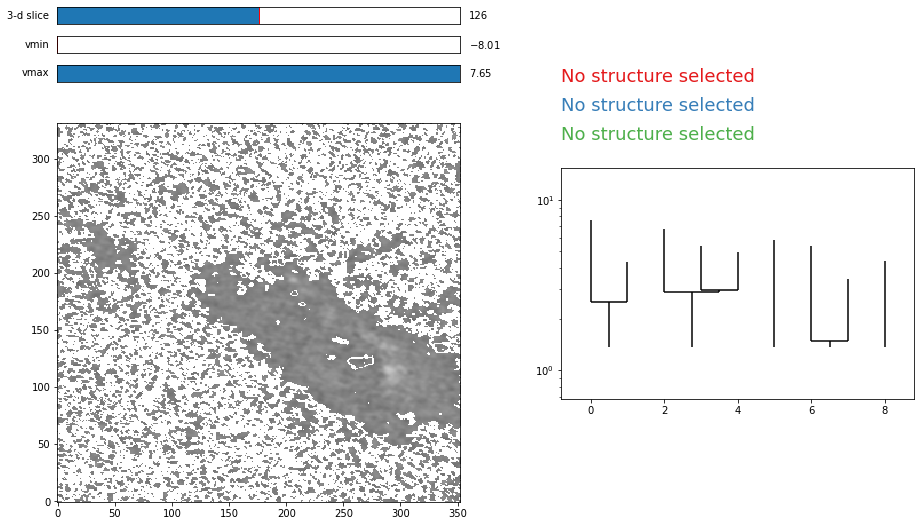

(13,)
[4.63417537 0.7274359 ] [[ 0.97927366 -0.16032303]
 [-0.16032303  0.02938902]] leaves:
a =  4.634175371324563 +- 0.989582566904077
b =  0.7274359016270574 +- 0.17143225100135484
[1.3025251  1.34404365] [[ 0.41233305 -0.16000165]
 [-0.16000165  0.06266247]] branches:
a =  1.302525099590032 +- 0.6421316453360171
b =  1.344043651556748 +- 0.2503247346620545
[4.4107282  0.72808909] [[ 0.63551572 -0.08213365]
 [-0.08213365  0.01150999]] All_structures:
a =  4.410728197147834 +- 0.7971923955564599
b =  0.7280890918461969 +- 0.1072845998506391


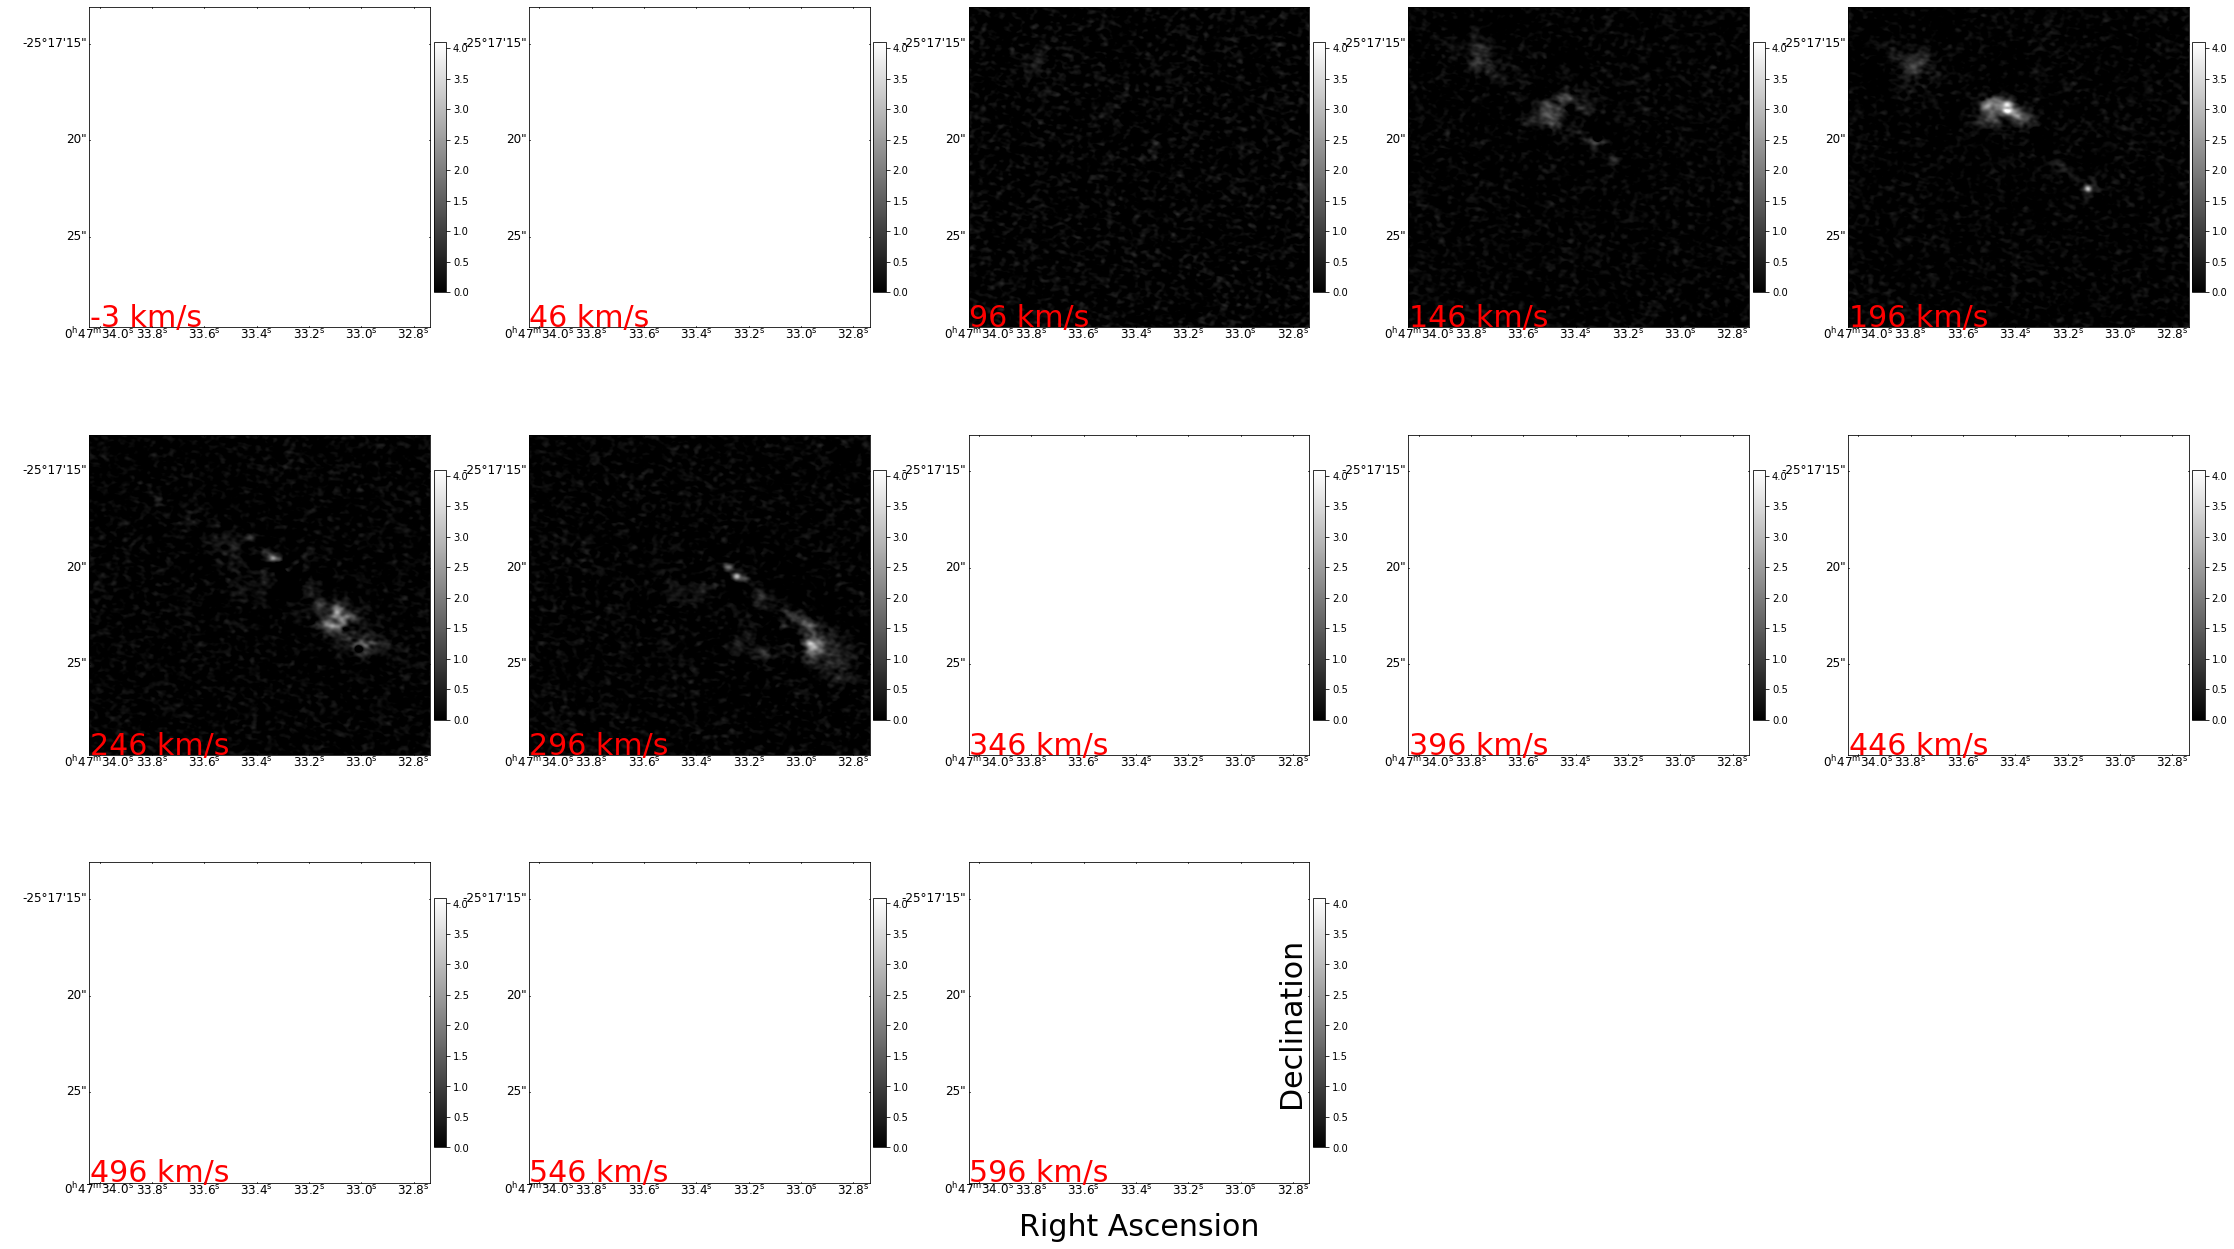

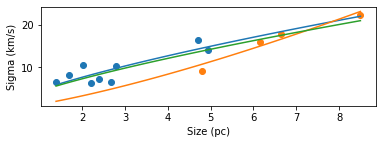

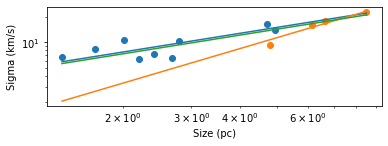

In [98]:
#H13CO 1-0


Num = 5
Overlaps=1#5
Ram_Limiter = 1
Name = "H13COp_1_0_Abs"
name = "H13COp1_0_CM_Contours_DS_10_Abs.jpeg"
NameS = (Name+"Sigmas")
NameR = (Name+"Radii")
RNames=np.load('RNames.npy')
SNames=np.load('SNames.npy')

RNames[Num] = NameR
SNames[Num] = NameS
print(RNames,SNames,NameR,NameS)
np.save("RNames",RNames)
np.save("SNames",SNames)

print(NameS)
paths = pylab.array(['NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_HCN_J1.cube.reproject.K-kms.pbcor.fits','NGC_H13CN_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_CO_J3_2.cube.reproject.K-kms.pbcor.fits','SiJ2_1.cube.reproject.K-kms.pbcor.fits','H13CoPJ1_0.cube.reproject.K-kms.pbcor.fits','CCH_N1.cube.reproject.K-kms.pbcor.fits','HC3N_J11.cube.reproject.K-kms.pbcor.fits','NGC_H13CN.cube.reproject.K-kms.pbcor.fits','NGC_HCO_Plus.cube.K-kms.pbcor.fits','NGC253_HCN.cube.reproject.K-kms.pbcor.fits'])
path = paths[Num]
print(path)
Confidences = np.load('Confidence_data.npy')
H13COP_MASK = np.load('H13COP_MASK_NGC.npy')
Noises = np.load('Noises_K.npy')
#Noises = Ns
m = Noises[Num]
#Make subcube
Qp = SpectralCube.read(path).with_spectral_unit(u.km/u.s,velocity_convention="radio")
Qp.allow_huge_operations=True

Q = Qp.to(u.K).spectral_slab(-200. *u.km / u.s, 700. *u.km / u.s)


sc = Q.unmasked_copy()
scQ = Q
scW = sc.wcs[:][:][0]
print(Confidences[0],Confidences.shape,sc.hdu.data.shape)
#BP = np.where(Confidences<Overlaps)#Overlaps)
BP = np.where(H13COP_MASK<1) #Mask where HCO is not found >1 sigma
del Confidences
sc.hdu.data[BP]=np.nan
print(sc.hdu.data[BP])
dat = sc.hdu.data[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
print(np.shape(dat),np.shape(sc))
scn = sc[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
scQn = scQ[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
cen_p1 = SkyCoord('00h47m33.9s', '-25d17m26.8s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.6s', '-25d17m10.2s', frame='icrs')

#cen_p1 = SkyCoord('00h47m33.6s', '-25d17m16.8s', frame='icrs')
#cen_p2 = SkyCoord('00h47m33.3s', '-25d17m14.2s', frame='icrs')

scW = scn.wcs[:][:][0]
scQW = scQn.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
datn = dat[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
scF = scn[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
raQDP1 = [int(scQW.world_to_pixel(cen_p1)[0]),int(scQW.world_to_pixel(cen_p1)[1])]
raQDP2 = [int(scQW.world_to_pixel(cen_p2)[0]),int(scQW.world_to_pixel(cen_p2)[1])]
scQF = scQn[:,raQDP1[1]:raQDP2[1],raQDP1[0]:raQDP2[0]] # Make a subcube
scWCS = scF.wcs[:][:][0]
wcs = scF.wcs[:][:][0]
wcsQ = scQF.wcs[:][:][0]

#Unload all the unimportant vars

del BP
del paths
#make metadata for the dendrogram
header = fits.getheader(path)
metadata = {}
try:
    metadata['wavelength'] = header["RESTFREQ"]*u.Hz#
except:
    
metadata['data_unit'] = u.Jy / u.beam
metadata['arc_per_pix'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix']**2 

print(metadata['beam_minor'],metadata['beam_major'])
print(beam_area_ratio)
#metadata["wcs"] = wcs
metadata["velocity_scale"] = abs(header["CDELT3"])*u.km/u.s#3.3714064157379937*u.km/u.s
metadata["distance"] = 3.5*u.Mpc
metadata["vaxis"]=0

d = astrodendro.Dendrogram.compute(datn,min_delta=m*5,min_value=m*4,min_npix=5*2) #The main culprit




##Analyze dendograms
print(np.shape(d))

v = d.viewer()
v.show()
p=d.plotter()
fig = plt.figure(1,figsize=(30,30))

scU = SpectralCube.read(path)  
scWU = scU.wcs[:][:][0]
raDP1U = [int(scWU.world_to_pixel(cen_p1)[0]),int(scWU.world_to_pixel(cen_p1)[1])]
raDP2U = [int(scWU.world_to_pixel(cen_p2)[0]),int(scWU.world_to_pixel(cen_p2)[1])]
scNU = scU[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),raDP1U[1]:raDP2U[1],raDP1U[0]:raDP2U[0]] # Make a subcube based on position
scWU = scNU.wcs[:][:][0]
#####
SC_KMSU = scNU.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMSU.allow_huge_operations=True
SC_K_KMSU = SC_KMSU.to(u.K)
SC_K_KMS_slabU = SC_K_KMSU.spectral_slab(-200. *u.km / u.s, 700. *u.km / u.s)  # Extract a subset of the velocities
ds=20
SC_CM = SC_K_KMS_slabU.downsample_axis(ds,axis=0) # Here we use downsampling to bin (average)the data # into coarse bins (broad channels) with width ~ 11 km/s    
vel, dec, ra = SC_CM.world[:,0,0]           # For plotting purposes, I want to know the average velocity

wcsU = SC_CM.wcs[:][:][0]
#Done making unmasked CM

noplot=False #produce plot of channel maps and contours? y/n

for n in np.arange(0,len(SC_CM.hdu.data)):   
    if(noplot):
        break
    # Now we loop through each slice (averaged channels) 
    #ax = pylab.subplot(5,5,n+1,projection=wcsU) # We plot them in a grid    
    ax = pylab.subplot(5,5,n+1,projection=sc.wcs[:][:][0]) # We plot them in a grid    
    im = pylab.imshow(SC_CM.hdu.data[n],cmap='gray',vmin=0,vmax=m*12)
    #print(np.shape(datn),np.shape(np.nanmean(datn[n:n+9],axis=0)))
    #im = pylab.imshow(np.nanmean(datn[n*ds:ds*n+ds-1],axis=0),cmap='gray',vmin=0,vmax=m*8)
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-1)                                                                                      
    Dec.set_ticks(size=-1) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(0,0,s="%i km/s"%(vel.value[n]),fontsize=30,c="Red") # Print the velocity of each averaged channel
    ax.tick_params(axis = 'both', which = 'major', labelsize = 12) 
    cb=pylab.colorbar(im,fraction=0.035,pad=0.01) 
    if n==len(SC_CM.hdu.data)-1:
        pylab.xlabel("Right Ascension",fontsize=30)
        pylab.ylabel("Declination",labelpad=-13,fontsize=30,rotation=90)
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
    pylab.tight_layout(w_pad=6,h_pad=-0)
    
    for t in d.all_structures:
        
        I = t.indices()
        Cont = True
        try:
            #print(str(t.descendants[0]).find("branch"))
            #print(str(t.descendants[0]))
            if(str(t.descendants[0]).find("branch") != -1):
                Cont = False #If we find a branch inside this structure t, then it is at least order two and will be discarded
        except:
            lop=12

        if(Cont):
            s = PPVStatistic(t,metadata=metadata)
            #if(s.v_rms > 2*u.km/u.s and s.v_rms*s.radius**2>1*metadata["velocity_scale"]*u.pix**2*3 and s.radius<24*2*u.pix and s.radius>np.sqrt(NBars[1])*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 4):
            if((True)):
                for lmn in range(np.nanmax(I[0])-np.nanmin(I[0])):
                    p.plot_contour(ax, structure=t, lw=1, colors='red',alpha=.1,slice = lmn)
                #p.plot_contour(ax, structure=t, lw=1, colors='red',alpha=.1)
                #print(n)
                #ellipse = s.to_mpl_ellipse(edgecolor='pink', facecolor='pink',alpha=.1)
                #ax.add_patch(ellipse)
                #print(t.indices())
                #break
if (noplot==False):
    fig.savefig(bbox_inches='tight',fname=name)

pc_per_pixel = metadata['arc_per_pix']/3600/180*np.pi/u.arcsec*metadata['distance']/u.Mpc

sig_per_pixel=np.nan#metadata['spectral_resolution']/u.pix
radsL=np.array([])
radsB=np.array([])
sigmasL=np.array([])
sigmasB=np.array([])

for t in d.all_structures: 
    
    I = t.indices()
    Cont = True
    try:
        #print(str(t.descendants[0]).find("branch"))
        #print(str(t.descendants[0]))
        if(str(t.descendants[0]).find("branch") != -1):
            Cont = False #If we find a branch inside this structure t, then it is at least order two and will be discarded
    except:
        lop=12
    
    if(Cont):
        s = PPVStatistic(t,metadata=metadata)
        #if(s.v_rms > 2*u.km/u.s and s.v_rms*s.radius**2>1*metadata["velocity_scale"]*u.pix**2*3 and s.radius<24*2*u.pix and s.radius>np.sqrt(NBars[3])*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 4):
        if(True):
        #if(s.v_rms*s.radius**2>1*metadata["velocity_scale"]*u.pix**2*3):







            if(t.is_leaf):
                radsL=np.append(radsL,(float(s.radius*pc_per_pixel))) #convert pixel to pc (then make it dimensionless)
                sigmasL=np.append(sigmasL,(float(s.v_rms*u.s/u.km)))#Convert pixel to velocity (then make it dimensionless)
            if(t.is_branch	):
                radsB=np.append(radsB,(float(s.radius*pc_per_pixel))) #convert pixel to pc (then make it dimensionless)
                sigmasB=np.append(sigmasB,(float(s.v_rms*u.s/u.km)))#Convert pixel to velocity (then make it dimensionless)



from scipy.optimize import curve_fit

def func(R,a,b):
    return a*R**(b)
try:
    popt, pcov = curve_fit(func, radsL*10**6, sigmasL)
except:
    popt, pcov = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
try:
    poptB, pcovB = curve_fit(func, radsB*10**6, sigmasB)
except:
    poptB, pcovB = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]

Rcon = np.concatenate((radsL,radsB))
Scon = np.concatenate((sigmasL,sigmasB))
print(np.shape(Rcon))
poptCon, pcovCon = curve_fit(func, Rcon*10**6, Scon)
try:
    print(popt,pcov,"leaves:")
    print("a = ",popt[0],"+-",np.sqrt(pcov[0][0]))
    print("b = ",popt[1],"+-",np.sqrt(pcov[1][1]))
    print(poptB,pcovB,"branches:")
    print("a = ",poptB[0],"+-",np.sqrt(pcovB[0][0]))
    print("b = ",poptB[1],"+-",np.sqrt(pcovB[1][1]))
    print(poptCon,pcovCon,"All_structures:")
    print("a = ",poptCon[0],"+-",np.sqrt(pcovCon[0][0]))
    print("b = ",poptCon[1],"+-",np.sqrt(pcovCon[1][1]))

    fig = plt.figure()
    ax = pylab.subplot(2, 1, 1)
    xpL,xpB = ax.scatter(radsL*10**6,sigmasL),ax.scatter(radsB*10**6,sigmasB)
    xs=np.linspace(np.nanmin(Rcon*10**6),np.nanmax(Rcon*10**6),50)
    ysL,ysB,ysCon=func(xs,popt[0],popt[1]),func(xs,poptB[0],poptB[1]),func(xs,poptCon[0],poptCon[1])
    xpa1,xpa2,xpaTot = ax.plot(xs,ysL),ax.plot(xs,ysB),ax.plot(xs,ysCon)
    plt.xlabel("Size (pc)")
    plt.ylabel("Sigma (km/s)")
    pylab.show()
    ax2 = pylab.subplot(2, 1, 2)
    xpL,xpB = ax2.scatter(radsL*10**6,sigmasL),ax2.scatter(radsB*10**6,sigmasB)
    p,p2,p3 = ax2.plot(xs,ysL),ax2.plot(xs,ysB),ax2.plot(xs,ysCon)
    ax2.set_yscale('log')
    ax2.set_xscale('log')
    plt.xlabel("Size (pc)")
    plt.ylabel("Sigma (km/s)")
    pylab.show()

except:
    
    print("Not Enough Well-Defined Structures")
NameSL = (NameS+"_Leaves")
NameSB = (NameS+"_Branches")
NameRL = (NameR+"_Leaves")
NameRB = (NameR+"_Branches")

np.save(NameSL,sigmasL)
np.save(NameSB,sigmasB)
np.save(NameRL,radsL)
np.save(NameRB,radsB)

HCOp-J1_Dendrogram
NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits
0.5073068768590464
(252, 400, 488) (252, 400, 488)
(252, 332, 353) (400, 488)
(242, 160, 95)


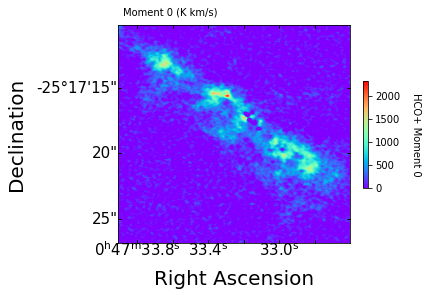

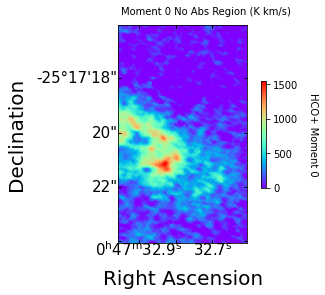

nan
4.954002325159296e+22 1 / cm2


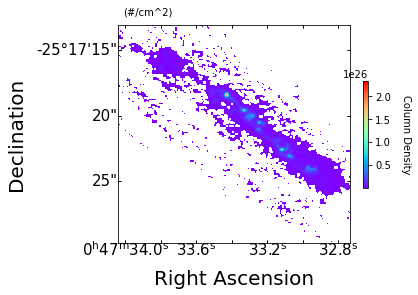

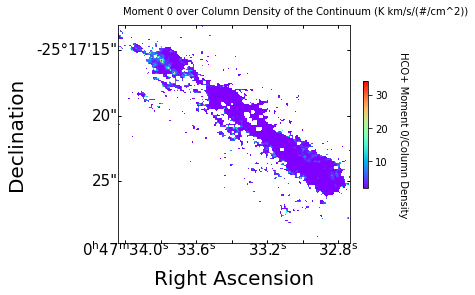

nan
3.489355484284155e+22 1 / cm2
[45] [136] (200, 81)
<class 'float'> <class 'float'> 0.68


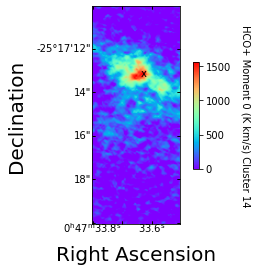

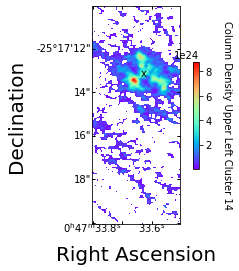

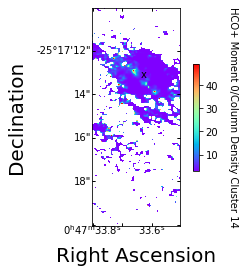

0.0013539918964422153

0.1839043346733 arcsec 0.250526942496108 arcsec
18.429196270990186 pix2
(463,) (80,)


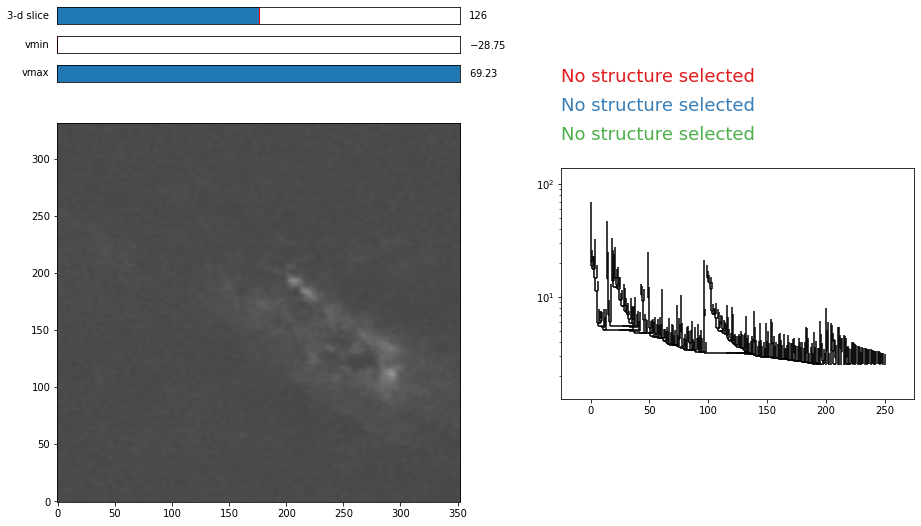

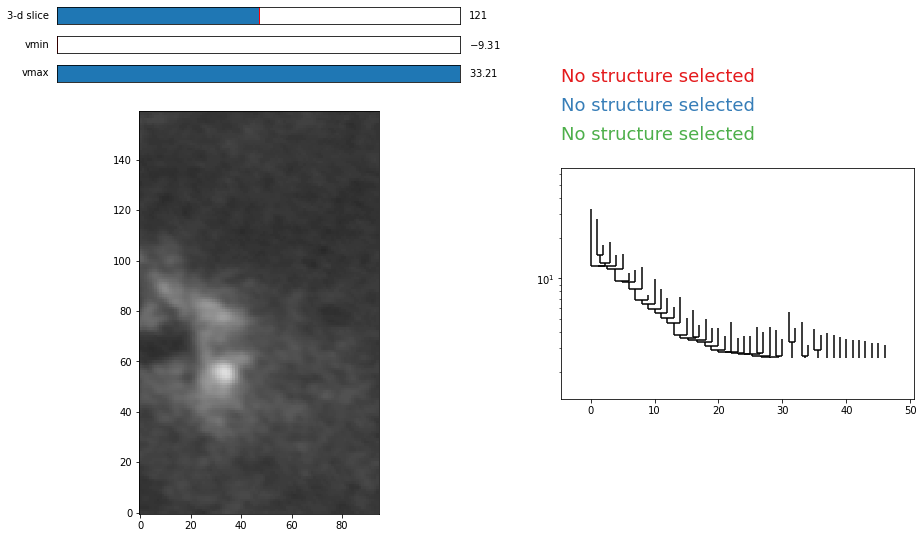

(110,)
(23,)
(110,) (110,)
[2.47622605 0.76137203] [[ 0.05426446 -0.00921191]
 [-0.00921191  0.00167476]] Size Linewidth All_structures:
a =  2.4762260453248914 +- 0.23294732374705907
b =  0.7613720325580905 +- 0.04092380471537074
[2.47622605 0.76137203] [[ 0.05426446 -0.00921191]
 [-0.00921191  0.00167476]] Size Linewidth All_structures No abs:
a =  2.3008859668379333 +- 0.5296681946364804
b =  0.7924815403074679 +- 0.09949025732087889
[3.38337209e+24 3.56774926e-01] [[ 2.81267664e+48 -3.86741731e+23]
 [-3.86741731e+23  5.70406533e-02]] Radius to Luminosity:
c =  3.3833720893724505e+24 +- 1.6771036476243474e+24
d =  0.356774925585677 +- 0.23883185159007683
[0.00076769 0.14677702] [[ 1.96797935e-06 -3.70789705e-05]
 [-3.70789705e-05  6.99190753e-04]] Column Density to linewidth^2/size:
e =  0.0007676911635840947 +- 0.0014028468720070177
f =  0.1467770207128799 +- 0.026442215353742523
[2.65255564 0.70603626] [[ 0.14503151 -0.02088942]
 [-0.02088942  0.00325641]] Size Linewidth Region 14

NameError: name 'st2' is not defined

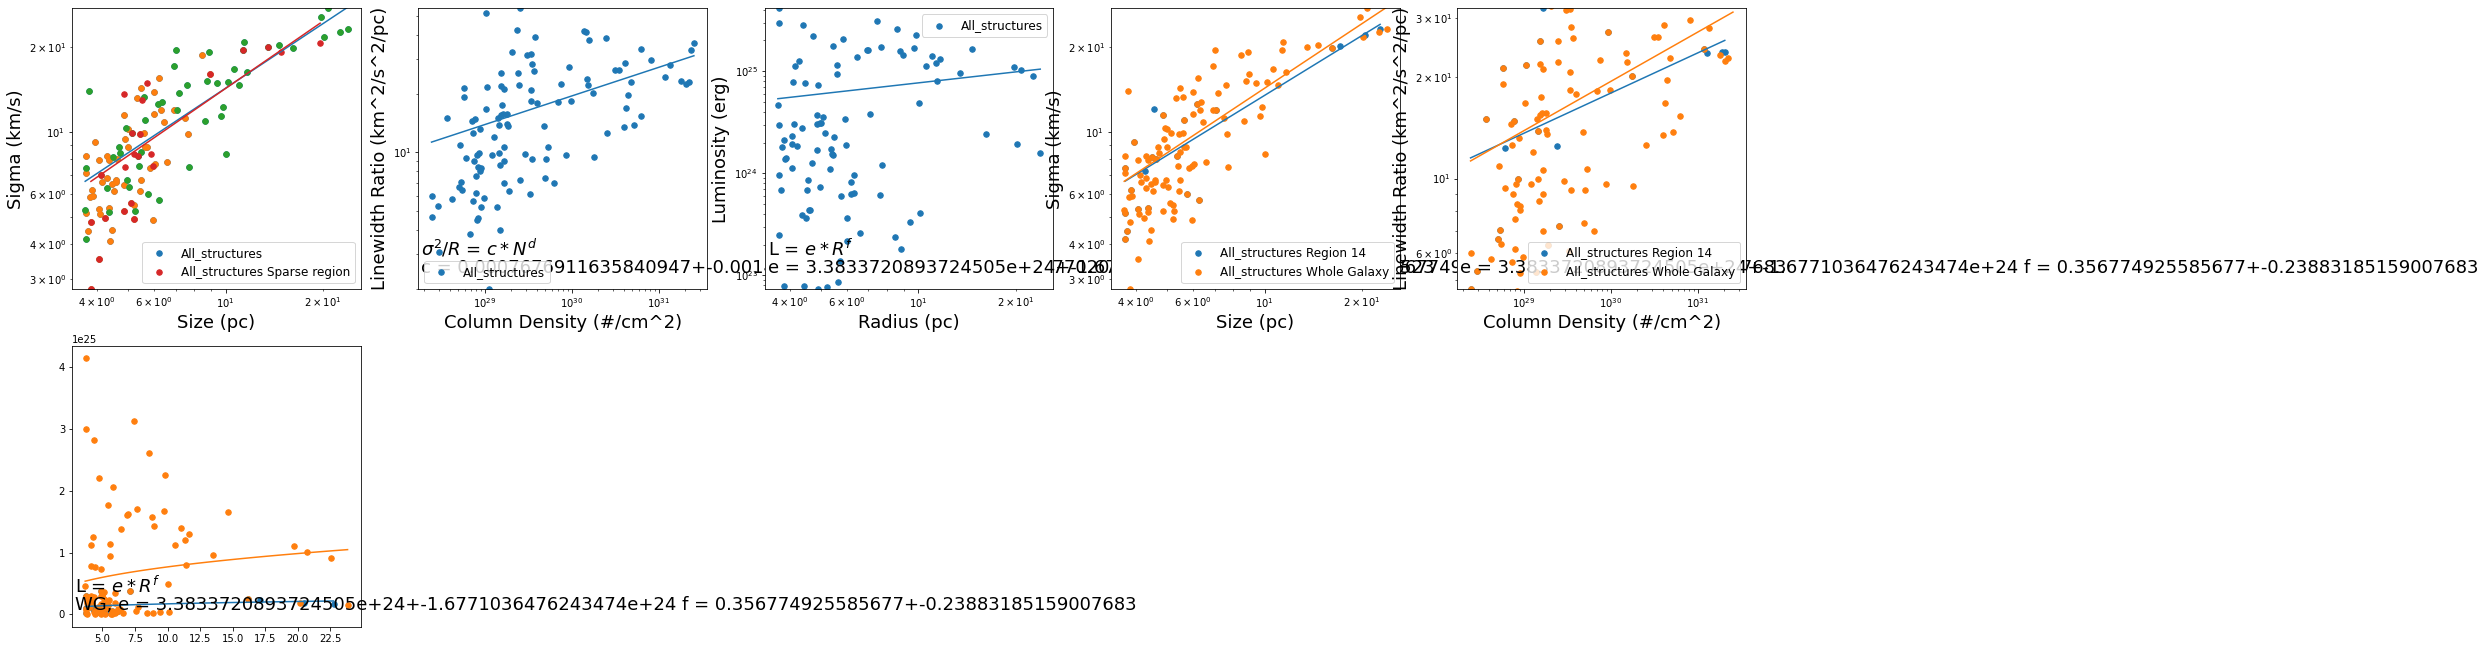

In [64]:
#HCO+_J1-0

Num=0
Overlaps=0#4
Ram_Limiter=1#What percent of the cube my ram can handle
Name = "HCOp-J1_Dendrogram"

Num_per_kg= 6.0221409*10**23/(2.8*10**-3)#6.0221409*10**23/29.0180*10**-3#num/kg for h2


Names[Num] = Name
NameS = (Name+"Sigmas")
NameR = (Name+"Radii")

np.save("Names",Names)

print(Name)

paths = pylab.array(['NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_HCN_J1.cube.reproject.K-kms.pbcor.fits','NGC_H13CN_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_CO_J3_2.cube.reproject.K-kms.pbcor.fits','SiJ2_1.cube.reproject.K-kms.pbcor.fits','H13CoPJ1_0.cube.reproject.K-kms.pbcor.fits','CCH_N1.cube.reproject.K-kms.pbcor.fits','HC3N_J11.cube.reproject.K-kms.pbcor.fits','NGC_H13CN.cube.reproject.K-kms.pbcor.fits','NGC_HCO_Plus.cube.K-kms.pbcor.fits','NGC253_HCN.cube.reproject.K-kms.pbcor.fits'])
path = paths[Num]

pathCont = 'Continuum_Reproject.fits'
print(path)
Confidences = np.load('Confidence_data.npy')

Noises = np.load('Noises_K.npy')
#Noises = Ns
m = Noises[Num]
print(m)
#Continuum image
scCont = spectral_cube.Projection.from_hdu(fits.open(pathCont)[0])
#Put this up here for the column density map
metadata = {}
metadata["distance"] = 3.5*u.Mpc
try:
    freqC = scCont.hdu.header["RESTFREQ"]*u.Hz#
except:
    freqC = scCont.hdu.header["RESTFRQ"]*u.Hz#
arc_per_pix_yc =  abs(scCont.hdu.header["CDELT1"]*3600.0 * u.arcsec)/u.pix
arc_per_pix_xc =  abs(scCont.hdu.header["CDELT2"]*3600.0 * u.arcsec)/u.pix
beam_majorc =  scCont.hdu.header["BMAJ"]*3600.0 * u.arcsec
beam_minorc =  scCont.hdu.header["BMIN"]*3600.0 * u.arcsec
beam_area_ratioc = beam_minorc*beam_majorc/arc_per_pix_yc/arc_per_pix_xc
metadata['beam_area_ratioc']=beam_area_ratioc
pc_per_pixelc = abs(scCont.hdu.header["CDELT1"])/180*np.pi*metadata['distance']/u.Mpc



#Make subcube
Qp = SpectralCube.read(path).with_spectral_unit(u.km/u.s,velocity_convention="radio")
Qp.allow_huge_operations=True

Q = Qp.to(u.K).spectral_slab(-200. *u.km / u.s, 700. *u.km / u.s)

sc = Q.unmasked_copy()
#scQ = Q
scW = sc.wcs[:][:][0]


dat = sc.hdu.data[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
scn = sc[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
print(np.shape(dat),np.shape(scn))
cen_p1 = SkyCoord('00h47m33.9s', '-25d17m26.8s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.6s', '-25d17m10.2s', frame='icrs')

scF = Crop(scn,scn.wcs,cen_p1,cen_p2,0,False)
datn = Crop(dat,scn.wcs,cen_p1,cen_p2,0,False)

#Do the same thing to the continuum image
scContW =  Crop(scCont,scCont.wcs,cen_p1,cen_p2,5,True)

print(np.shape(datn),np.shape(scCont))
#Cubes with little dense gas and abs
AbpRAD1 = SkyCoord('00h47m32.95s', '-25d17m24.0s', frame='icrs')
AbpRAD2 = SkyCoord('00h47m32.6s', '-25d17m16.0s', frame='icrs')
SCNA= Crop(scn,scW,AbpRAD1,AbpRAD2,5,False)
scContNA = Crop(scCont,scCont.wcs,AbpRAD1,AbpRAD2,0,True)
datna = SCNA.hdu.data 
print(np.shape(SCNA))

UL1 = SkyCoord('00h47m33.8s', '-25d17m20.0s', frame='icrs')
UL2 = SkyCoord('00h47m33.5s', '-25d17m10.0s', frame='icrs')
scWCS = scF.wcs[:][:][0]
scWCSNA = SCNA.wcs[:][:][0]
moment_0_subNA  = SCNA.moment(order=0,how='slice')            # Calculate the Moment 0 map 
moment_0_sub  = scF.moment(order=0,how='slice')            # Calculate the Moment 0 map 
UpLeft = Crop(scCont,scCont.wcs,UL1,UL2,5,True)
SCUL = Crop(scn,scn.wcs,UL1,UL2,0,False)
moment_0_UL = SCUL.moment(order=0,how='slice')            # Calculate the Moment 0 map 
######Moment 0 for both
######and cont
Make_Plot("HCO+ Moment 0","Moment 0 (K km/s)",moment_0_sub.hdu.data,0,np.nanmax(moment_0_sub.hdu.data),moment_0_sub.wcs,1,1,1,True)
#Make_Plot("Continuum","Continuum (Jy/Beam)",scContW.hdu.data,0,np.nanmax(scCont.hdu.data),scCont.wcs,1,1,1,True)
Make_Plot("HCO+ Moment 0","Moment 0 No Abs Region (K km/s)",moment_0_subNA.hdu.data,0,np.nanmax(moment_0_subNA.hdu.data),moment_0_subNA.wcs,1,1,1,True)


cSD = (Flux_to_Mass(scContW.hdu.data*u.Jy/u.beam/beam_area_ratioc*u.pix**2*u.beam*4*np.log(2))/(pc_per_pixelc*10**6*3.086*10**18*u.cm)**2)*(1.989*10**30*u.kg/u.M_sun)*Num_per_kg/u.kg #Flux goes to luminosity for a gaussian beam and goes to column density for square pixels, mass goes to kg to number
rm=moment_0_sub.hdu.data/cSD
rmU = rm*u.K*u.km/u.s#Just put back in the units
rmU = np.array(rmU /(u.K*u.km/u.s)/u.cm**2*10**22,dtype='float64')#Now remove them all
print(rmU[0][0])
######ratio
    
bp = np.where(cSD<=np.nanmean(np.nanstd(cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50],axis=0))*.05)
bp2 = np.where( moment_0_sub.hdu.data < m*.05)
print(np.nanmean(np.nanstd(cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50],axis=0))*.05)
cSD[bp]=np.nan
rmU[bp]=np.nan
rmU[bp2]=np.nan

#Make_Plot("HCO+ Moment 0/Column Density","Moment 0 over Column Density of the Continuum (K km/s/(#/cm^2))",moment_0_subNA.hdu.data,0,np.nanmax(moment_0_subNA.hdu.data),scCont.wcs,1,1,1,True)
Make_Plot("Column Density","(#/cm^2)",cSD,float(np.nanmin(cSD*u.cm**2)),float(np.nanmax(cSD*u.cm**2)),scCont.wcs,1,1,1,True)
Make_Plot("HCO+ Moment 0/Column Density","Moment 0 over Column Density of the Continuum (K km/s/(#/cm^2))",rmU,np.nanmean(rmU)*.5,abs(np.nanmean(rmU))*8,scCont.wcs,1,1,1,True)

#Region of interest in upper left
cSDUL = (Flux_to_Mass(UpLeft.hdu.data*u.Jy/u.beam/beam_area_ratioc*u.pix**2*u.beam*4*np.log(2))/(pc_per_pixelc*10**6*3.086*10**18*u.cm)**2)*(1.989*10**30*u.kg/u.M_sun)*Num_per_kg/u.kg #Flux goes to luminosity for a gaussian beam and goes to column density for square pixels, mass goes to kg to number
rmUL=moment_0_UL.hdu.data/cSDUL
rmUUL = rmUL*u.K*u.km/u.s#Just put back in the units
rmUUL = np.array(rmUUL /(u.K*u.km/u.s)/u.cm**2*10**22,dtype='float64')#Now remove them all
print(rmUUL[0][0])
######ratio
    
bp = np.where(cSDUL<=np.nanmean(np.nanstd(cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50],axis=0))*.05)
bp2 = np.where( moment_0_UL.hdu.data < m*.05)
print(np.nanmean(np.nanstd(cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50],axis=0))*.05)
cSDUL[bp]=np.nan
rmUUL[bp]=np.nan
rmUUL[bp2]=np.nan

z,yf,xf = np.where(SCUL.hdu.data==np.nanmax(SCUL.hdu.data))
print(xf,yf,np.shape(UpLeft.hdu.data))
xf,yf = float(xf/np.shape(UpLeft.hdu.data)[1]),float(yf/np.shape(UpLeft.hdu.data)[0])
print(type(xf),type(.5),yf)
Make_Plot_Anno("HCO+ Moment 0 (K km/s) Cluster 14","x",moment_0_UL.hdu.data,0,np.nanmax(moment_0_UL.hdu.data),UpLeft.wcs,1,1,1,True,xf,yf)
Make_Plot_Anno("Column Density Upper Left Cluster 14","x",cSDUL,float(np.nanmin(cSDUL*u.cm**2)),float(np.nanmax(cSDUL*u.cm**2)),UpLeft.wcs,1,1,1,True,xf,yf)
Make_Plot_Anno("HCO+ Moment 0/Column Density Cluster 14","x",rmUUL,np.nanmean(rmUUL)*.5,abs(np.nanmean(rmUUL))*8,UpLeft.wcs,1,1,1,True,xf,yf)


print(np.nanmin(rmU))



header = scF.hdu.header
print()
#make metadata for the dendrogram

try:
    freq = header["RESTFREQ"]*u.Hz#
    metadata['wavelength']=299792458*u.m/header["RESTFREQ"]#
except:
    freq = header["RESTFRQ"]*u.Hz#
    metadata['wavelength']=299792458*u.m/header["RESTFRQ"]#
metadata['data_unit'] =u.K# header['BUNIT']
metadata['arc_per_pix_y'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['arc_per_pix_x'] =  abs(header["CDELT2"]*3600.0 * u.arcsec)/u.pix


metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix_y']/metadata['arc_per_pix_x'] 
metadata['beam_area_ratio']=beam_area_ratio
metadata['spatial_scale'] =  np.sqrt(header["BMAJ"]*header["BMIN"]*u.degree**2)
area_res = abs(header["CDELT1"])*abs(header["CDELT2"])*(np.pi/180*3.5)**2#mpc^2/pix^2


print(metadata['beam_minor'],metadata['beam_major'])
print(beam_area_ratio)
#metadata["wcs"] = wcs
metadata["velocity_scale"] = abs(header["CDELT3"])*u.km/u.s#3.3714064157379937*u.km/u.s

metadata["vaxis"]=0

d = astrodendro.Dendrogram.compute(datn,min_delta=m,min_value=m*5,min_npix=50) #The main culprit
dNA = astrodendro.Dendrogram.compute(datna,min_value=m*5,min_delta=m,min_npix=50) #The main culprit
dUL = astrodendro.Dendrogram.compute(SCUL.hdu.data,min_value=m*5,min_delta=m,min_npix=50) #The main culprit



##Analyze dendograms
print(np.shape(d),np.shape(dNA))

v = d.viewer()
v.show()
p=d.plotter()

v = dNA.viewer()
v.show()
p=dNA.plotter()

fig = plt.figure(1,figsize=(30,30))


pc_per_pixel = abs(header["CDELT1"])/180*np.pi*metadata['distance']/u.Mpc

sig_per_pixel=np.nan#metadata['spectral_resolution']/u.pix


#Finds Size, Linewidth, Luminosity, and Column Density of a structure for each structure and returns them in [[][]] arrays [Leaves][Branches]
vel,RA,Dec = scF.world[:,0,0]
Rads,Sigmas,Lumin,CD = Dendro_Arrays(d,datn,vel,scContW.hdu.data,metadata)
RadsNA,SigmasNA,LuminNA,CDNA = Dendro_Arrays(dNA,datna,vel,scContNA.hdu.data,metadata)
RadsUL,SigmasUL,LuminUL,CDUL = Dendro_Arrays(dUL,SCUL.hdu.data,vel,UpLeft.hdu.data,metadata)
#def Dendro_Arrays(Dendrogram,LineData,DataVel,ContData,metadata):
    

from scipy.optimize import curve_fit
from scipy.optimize import leastsq

def func(R,a,b):
    return a*R**(b)
try:
    popt, pcov = curve_fit(func, Rads[0]*10**6,Sigmas[0])
except:
    popt, pcov = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
try:
    poptB, pcovB = curve_fit(func,  Rads[1]*10**6,Sigmas[1])
except:
    poptB, pcovB = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]


    
Rcon = np.concatenate((Rads[0],Rads[1]))
Scon = np.concatenate((Sigmas[0],Sigmas[1]))
print(np.shape(Rcon))
poptCon, pcovCon = curve_fit(func, Rcon*10**6, Scon)





RconNA = np.concatenate((RadsNA[0],RadsNA[1]))
SconNA = np.concatenate((SigmasNA[0],SigmasNA[1]))
print(np.shape(RconNA))
poptConNA, pcovConNA = curve_fit(func, RconNA*10**6, SconNA)







xs=np.linspace(np.nanmin(Rcon*10**6),np.nanmax(Rcon*10**6),50)
ysL,ysB,ysCon=func(xs,popt[0],popt[1]),func(xs,poptB[0],poptB[1]),func(xs,poptCon[0],poptCon[1])

xsNA = np.linspace(np.nanmin(RconNA*10**6),np.nanmax(RconNA*10**6),50)
ysNA = func(xsNA,poptConNA[0],poptConNA[1])

LuminCon = np.concatenate((Lumin[0],Lumin[1]))
ColumnCon= np.concatenate((CD[0],CD[1]))
#Flux ratios fit
#FRpopt,FRpcov = curve_fit(func, abs(FRs),Scon**2/Rcon/10**6)
#xsF=np.linspace(np.nanmin(abs(FRs)),np.nanmax(abs(FRs)),50)
#ysF = func(xsF,FRpopt[0],FRpopt[1])

#Radius Luminosity fit
gp = np.where(LuminCon>0)
#print(gp)
#print(LuminCon[gp])
print(np.shape(Rcon),np.shape(LuminCon))
lgp = LuminCon[gp]
radgp = Rcon[gp]*10**6
#print(np.shape(Rcon[gp]*10**6),np.shape(LuminCon[gp]))
RLpopt,RLpcov = curve_fit(func, np.array(radgp,dtype='float64'),np.array(lgp,dtype='float64'),maxfev=999999,p0 = np.array([10**27,1],dtype='float64'),ftol = 10**-10)

xsRL=np.linspace(np.nanmin(radgp),np.nanmax(radgp),50)
ysRL = func(xsRL,RLpopt[0],RLpopt[1])

#Column density to Size-linewidth
gp2 = np.where(ColumnCon>0)
cgp = ColumnCon[gp2]
rgp=Scon[gp2]**2/Rcon[gp2]/10**6
CDpopt,CDpcov = curve_fit(func, np.array(cgp,dtype='float64') ,np.array(rgp,dtype='float64'),maxfev=9999099,p0 = np.array([10,.01],dtype='float64'),ftol = 10**-10)
xsCD=np.linspace(np.nanmin(cgp),np.nanmax(cgp),50)
ysCD = func(xsCD,CDpopt[0],CDpopt[1])

print(poptCon,pcovCon,"Size Linewidth All_structures:")
print("a = ",poptCon[0],"+-",np.sqrt(pcovCon[0][0]))
print("b = ",poptCon[1],"+-",np.sqrt(pcovCon[1][1]))

print(poptCon,pcovCon,"Size Linewidth All_structures No abs:")
print("a = ",poptConNA[0],"+-",np.sqrt(pcovConNA[0][0]))
print("b = ",poptConNA[1],"+-",np.sqrt(pcovConNA[1][1]))

print(RLpopt,RLpcov,"Radius to Luminosity:")
print("c = ",RLpopt[0],"+-",np.sqrt(RLpcov[0][0]))
print("d = ",RLpopt[1],"+-",np.sqrt(RLpcov[1][1]))

print(CDpopt,CDpcov,"Column Density to linewidth^2/size:")
print("e = ",CDpopt[0],"+-",np.sqrt(CDpcov[0][0]))
print("f = ",CDpopt[1],"+-",np.sqrt(CDpcov[1][1]))


fig = plt.figure(1,figsize=(15,15))

ax2 = pylab.subplot(5, 5, 1)
ax3 = pylab.subplot(5, 5, 2)
ax4 = pylab.subplot(5, 5, 3)




xpcon,xpL,xpB = ax2.scatter(Rcon*10**6,Scon,label="All_structures",s=30),ax2.scatter(radsL*10**6,sigmasL,s=30),ax2.scatter(radsB*10**6,sigmasB,s=30)
p,p2,p3 = ax2.plot(xs,ysCon),ax2.plot(xs,ysL),ax2.plot(xs,ysB)

pNA = ax2.plot(xsNA,ysNA)
xpNA = ax2.scatter(RconNA*10**6,SconNA,label="All_structures Sparse region",s=30)

ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_ylim(np.nanmin(Scon),np.nanmax(Scon))
ax2.set_xlabel("Size (pc)",fontsize=18)
ax2.set_ylabel("Sigma (km/s)",fontsize=18,)
ax2.legend(prop={'size': 12})


#gp = np.where(FRs>0)





xspF = ax3.scatter(cgp,rgp,label="All_structures",s=30)
pF = ax3.plot(xsCD,ysCD)
ax3.annotate(s=r'$\sigma^2/R$ = $c*N^d$',fontsize=18,xy=(0.01,0.12),xycoords="axes fraction")
st = "c = "+ str(CDpopt[0])+"+-"+str(np.sqrt(CDpcov[0][0]))+" d = "+str(CDpopt[1])+"+-"+str(np.sqrt(CDpcov[1][1]))

ax3.annotate(s=st,fontsize=18,xy=(0.01,0.06),xycoords="axes fraction")
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_ylim(np.nanmin(rgp),np.nanmax(rgp))
ax3.set_xlabel("Column Density (#/cm^2)",fontsize=18)
ax3.set_ylabel("Linewidth Ratio (km^2/s^2/pc)",fontsize=18)
ax3.legend(prop={'size': 12})



xspL = ax4.scatter(radgp,lgp,label="All_structures",s=30)
pFLL = ax4.plot(xsRL,ysRL)

st = "e = "+ str(RLpopt[0])+"+-"+str(np.sqrt(RLpcov[0][0]))+" f = "+str(RLpopt[1])+"+-"+str(np.sqrt(RLpcov[1][1]))
ax4.annotate(s='L = $e*R^f$',fontsize=18,xy=(0.01,0.12),xycoords="axes fraction")
ax4.annotate(s=st,fontsize=18,xy=(0.01,0.06),xycoords="axes fraction")

ax4.set_yscale('log')
ax4.set_xscale('log')
ax4.set_ylim(np.nanmin(lgp),np.nanmax(lgp))
ax4.set_xlabel("Radius (pc)",fontsize=18)
ax4.set_ylabel("Luminosity (erg)",fontsize=18)
ax4.legend(prop={'size': 12})




    
RconUL = np.concatenate((RadsUL[0],RadsUL[1]))
SconUL = np.concatenate((SigmasUL[0],SigmasUL[1]))

poptUL, pcovUL = curve_fit(func, RconUL*10**6, SconUL)








xsUL=np.linspace(np.nanmin(RconUL*10**6),np.nanmax(RconUL*10**6),50)
ysUL=func(xsUL,poptUL[0],poptUL[1])

LuminConUL = np.concatenate((LuminUL[0],LuminUL[1]))
ColumnConUL= np.concatenate((CDUL[0],CDUL[1]))

#Radius Luminosity fit
gp = np.where(LuminConUL>0)
lgpUL = LuminConUL[gp]
radgpUL = RconUL[gp]*10**6
#print(np.shape(Rcon[gp]*10**6),np.shape(LuminCon[gp]))
RLpoptUL,RLpcovUL = curve_fit(func, np.array(radgpUL,dtype='float64'),np.array(lgpUL,dtype='float64'),maxfev=999999,p0 = np.array([10**27,1],dtype='float64'),ftol = 10**-10)

xsRLUL=np.linspace(np.nanmin(radgpUL),np.nanmax(radgpUL),50)
ysRLUL = func(xsRLUL,RLpoptUL[0],RLpoptUL[1])

#Column density to Size-linewidth
gp2 = np.where(ColumnConUL>0)
cgpUL = ColumnConUL[gp2]
rgpUL=SconUL[gp2]**2/RconUL[gp2]/10**6
CDpoptUL,CDpcovUL = curve_fit(func, np.array(cgpUL,dtype='float64') ,np.array(rgpUL,dtype='float64'),maxfev=9999099,p0 = np.array([10,.01],dtype='float64'),ftol = 10**-10)
xsCDUL=np.linspace(np.nanmin(cgpUL),np.nanmax(cgpUL),50)
ysCDUL = func(xsCDUL,CDpoptUL[0],CDpoptUL[1])

print(poptConUL,pcovConUL,"Size Linewidth Region 14:")
print("a = ",poptConUL[0],"+-",np.sqrt(pcovConUL[0][0]))
print("b = ",poptConUL[1],"+-",np.sqrt(pcovConUL[1][1]))

print(RLpoptUL,RLpcovUL,"Radius to Luminosity Region 14:")
print("c = ",RLpoptUL[0],"+-",np.sqrt(RLpcovUL[0][0]))
print("d = ",RLpoptUL[1],"+-",np.sqrt(RLpcovUL[1][1]))


ax5 = pylab.subplot(5, 5, 4)
ax6 = pylab.subplot(5, 5, 5)
ax7 = pylab.subplot(5, 5, 6)




xpconhh = ax5.scatter(RconUL*10**6,SconUL,label="All_structures Region 14",s=30)
p2 = ax5.plot(xsUL,ysUL)
xpconhh2 = ax5.scatter(Rcon*10**6,Scon,label="All_structures Whole Galaxy",s=30)
p22 = ax5.plot(xs,ysCon)

ax5.set_yscale('log')
ax5.set_xscale('log')
ax5.set_ylim(np.nanmin(Scon),np.nanmax(Scon))
ax5.set_xlabel("Size (pc)",fontsize=18)
ax5.set_ylabel("Sigma (km/s)",fontsize=18,)
ax5.legend(prop={'size': 12})


#gp = np.where(FRs>0)





xspFUL = ax6.scatter(cgpUL,rgpUL,label="All_structures Region 14",s=30)
pFUL = ax6.plot(xsCDUL,ysCDUL)

xspFUL2 = ax6.scatter(cgp,rgp,label="All_structures Whole Galaxy",s=30)
pFUL2 = ax6.plot(xsCD,ysCD)



ax6.annotate(s=st,fontsize=18,xy=(0.01,0.06),xycoords="axes fraction")
ax6.set_yscale('log')
ax6.set_xscale('log')
ax6.set_ylim(np.nanmin(rgpUL),np.nanmax(rgpUL))
ax6.set_xlabel("Column Density (#/cm^2)",fontsize=18)
ax6.set_ylabel("Linewidth Ratio (km^2/s^2/pc)",fontsize=18)
ax6.legend(prop={'size': 12})



xspLu = ax7.scatter(radgpUL,lgpUL,label="All_structure Region 14",s=30)
pFLLu = ax7.plot(xsRLUL,ysRLUL)
xspLu2 = ax7.scatter(radgp,lgp,label="All_structure Whole Galaxy",s=30)
pFLLu2 = ax7.plot(xsRL,ysRL)

st = "WG, e = "+ str(RLpopt[0])+"+-"+str(np.sqrt(RLpcov[0][0]))+" f = "+str(RLpopt[1])+"+-"+str(np.sqrt(RLpcov[1][1]))
ax7.annotate(s='L = $e*R^f$',fontsize=18,xy=(0.01,0.12),xycoords="axes fraction")
ax7.annotate(s=st,fontsize=18,xy=(0.01,0.06),xycoords="axes fraction")
st = "14, e = "+ str(RLpoptUL[0])+"+-"+str(np.sqrt(RLpcovUL[0][0]))+" f = "+str(RLpoptUL[1])+"+-"+str(np.sqrt(RLpcovUL[1][1]))
ax7.annotate(s=st2,fontsize=18,xy=(0.01,0.18),xycoords="axes fraction")

ax7.set_yscale('log')
ax7.set_xscale('log')
ax7.set_ylim(np.nanmin(lgp),np.nanmax(lgp))
ax7.set_xlabel("Radius (pc)",fontsize=18)
ax7.set_ylabel("Luminosity (erg)",fontsize=18)
ax7.legend(prop={'size': 12})
#print(FRs)
NameSL = (NameS+"_Leaves")
NameSB = (NameS+"_Branches")
NameRL = (NameR+"_Leaves")
NameRB = (NameR+"_Branches")

NameSNA = (NameS+"_NA")
NameRNA = (NameR+"_NA")


NameCol = (Name+"_Column")
NameLum = (Name+"_Luminosities")
np.save(NameCol,ColumnCon)
np.save(NameLum,LuminCon)

np.save(NameSL,sigmasL)
np.save(NameSB,sigmasB)
np.save(NameRL,radsL)
np.save(NameRB,radsB)


np.save(NameRNA,RconNA)
np.save(NameSNA,SconNA)

H13CN-J1_AbsSigmas
NGC_H13CN_J1_0.cube.reproject.K-kms.pbcor.fits
0.48746873240970096
(252, 400, 488) (252, 400, 488)
(252, 332, 353) (400, 488)
(242, 160, 95)


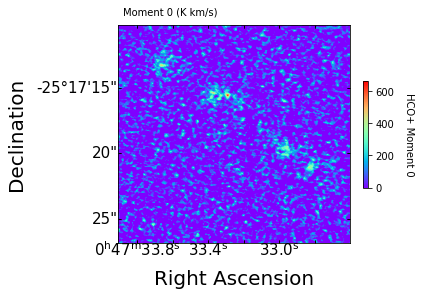

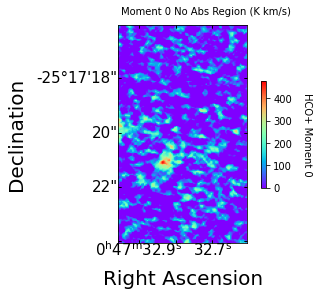

nan
4.954002325159296e+22 1 / cm2


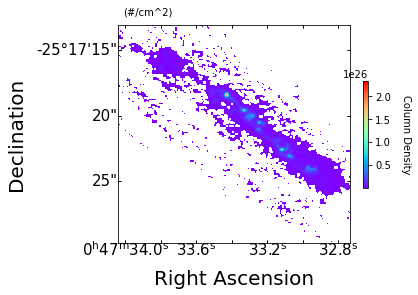

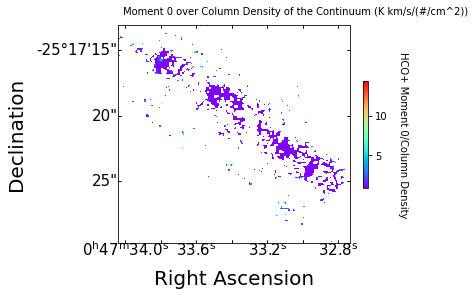

nan
3.489355484284155e+22 1 / cm2
[37] [134] (200, 81)
<class 'float'> <class 'float'> 0.67


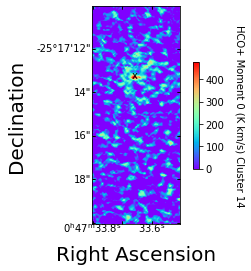

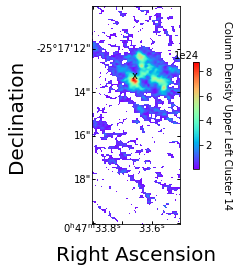

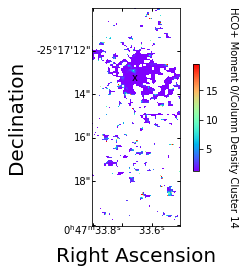

6.913930467457548e-05

0.193741553900124 arcsec 0.2583761863464 arcsec
20.02328153341261 pix2
(41,) (5,)


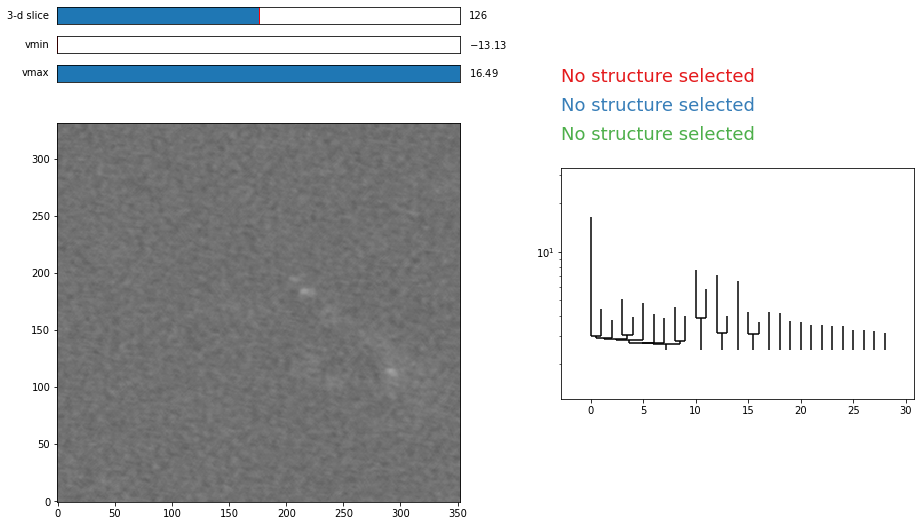

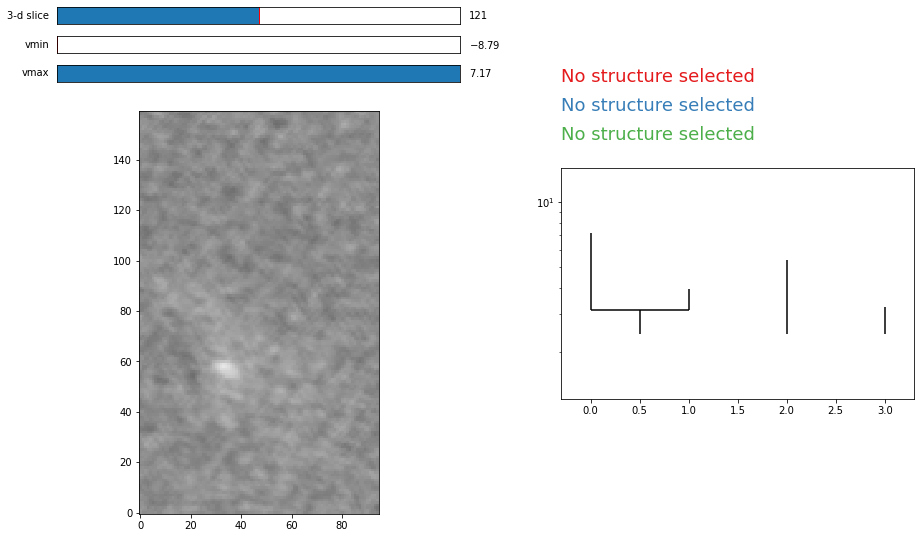

(13,)
(3,)
(13,) (13,)
[5.5580882 0.4814654] [[ 1.8209808  -0.15004237]
 [-0.15004237  0.01285025]] Size Linewidth All_structures:
a =  5.558088197566391 +- 1.3494372159304207
b =  0.48146540065891547 +- 0.11335895469624596
[5.5580882 0.4814654] [[ 1.8209808  -0.15004237]
 [-0.15004237  0.01285025]] Size Linewidth All_structures No abs:
a =  5.25801031593298 +- 5.3548966482253615
b =  0.5406922614321038 +- 0.542356984937898
[ 2.21741285e+25 -7.06451733e-02] [[ 1.45980678e+50 -3.30221099e+24]
 [-3.30221099e+24  7.84909355e-02]] Radius to Luminosity:
c =  2.217412845700891e+25 +- 1.2082246415251986e+25
d =  -0.07064517328366149 +- 0.2801623377703503
[ 4.92018689e+01 -7.43075500e-03] [[ 1.01501256e+05 -3.02857692e+01]
 [-3.02857692e+01  9.03906970e-03]] Column Density to linewidth^2/size:
e =  49.20186891597531 +- 318.5926181582261
f =  -0.007430754996223161 +- 0.09507402219616677


TypeError: Improper input: N=2 must not exceed M=1

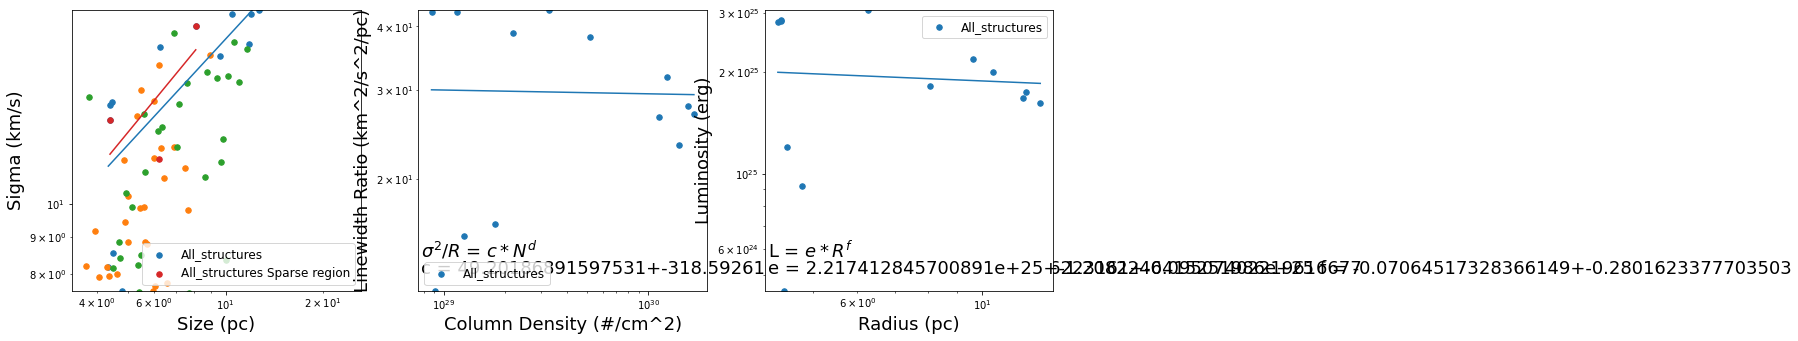

In [65]:
##### H13CN_J1-0

Num=2
Overlaps=1#4
Ram_Limiter=1#What percent of the cube my ram can handle
Name = "H13CN-J1_Abs"
name ="H13CN_J1_0_Countours_CM_Abs.jpeg"
Num_per_kg= 6.0221409*10**23/(2.8*10**-3)#6.0221409*10**23/29.0180*10**-3#num/kg for h2

NameS = (Name+"Sigmas")
NameR = (Name+"Radii")
RNames[Num] = NameR
SNames[Num] = NameS
np.save("RNames",RNames)
np.save("SNames",SNames)
print(NameS)

#Put this up here for the column density map
def Flux_to_Mass(flux):
    J_to_e = 10**-23*u.erg/u.s/u.cm**2/u.Hz/u.Jy
    flux_erg = flux*J_to_e
    L = 4*np.pi*(3.5*3.086*10**24)**2*flux_erg*u.cm**2 #Megaparsec is converted to cm
    
    
    a_850 = 6.7*10**19*u.erg/u.s/u.Hz/u.M_sun #6.7+-1.7
    
    M_mol = L/a_850#Just in Solar mass*1.989*10**30*u.kg/u.M_sun#Determines mass of the cont for 850 in kg
    return M_mol
def Flux_to_Lum(flux):
    J_to_e = 10**-23*u.erg/u.s/u.cm**2/u.Hz/u.Jy
    flux_erg = flux*J_to_e
    L = 4*np.pi*(3.5*3.086*10**24)**2*flux_erg*u.cm**2 #Megaparsec is converted to cm
    
    return L


paths = pylab.array(['NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_HCN_J1.cube.reproject.K-kms.pbcor.fits','NGC_H13CN_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_CO_J3_2.cube.reproject.K-kms.pbcor.fits','SiJ2_1.cube.reproject.K-kms.pbcor.fits','H13CoPJ1_0.cube.reproject.K-kms.pbcor.fits','CCH_N1.cube.reproject.K-kms.pbcor.fits','HC3N_J11.cube.reproject.K-kms.pbcor.fits','NGC_H13CN.cube.reproject.K-kms.pbcor.fits','NGC_HCO_Plus.cube.K-kms.pbcor.fits','NGC253_HCN.cube.reproject.K-kms.pbcor.fits'])
path = paths[Num]

pathCont = 'Continuum_Reproject.fits'
#path='HCOp_J1-0.cube.fits'
pathCont = 'Continuum_Reproject.fits'
print(path)
Confidences = np.load('Confidence_data.npy')

Noises = np.load('Noises_K.npy')
#Noises = Ns
m = Noises[Num]
print(m)
#Continuum image
scCont = spectral_cube.Projection.from_hdu(fits.open(pathCont)[0])
#Put this up here for the column density map
metadata = {}
metadata["distance"] = 3.5*u.Mpc
try:
    freqC = scCont.hdu.header["RESTFREQ"]*u.Hz#
except:
    freqC = scCont.hdu.header["RESTFRQ"]*u.Hz#
arc_per_pix_yc =  abs(scCont.hdu.header["CDELT1"]*3600.0 * u.arcsec)/u.pix
arc_per_pix_xc =  abs(scCont.hdu.header["CDELT2"]*3600.0 * u.arcsec)/u.pix
beam_majorc =  scCont.hdu.header["BMAJ"]*3600.0 * u.arcsec
beam_minorc =  scCont.hdu.header["BMIN"]*3600.0 * u.arcsec
beam_area_ratioc = beam_minorc*beam_majorc/arc_per_pix_yc/arc_per_pix_xc
metadata['beam_area_ratioc']=beam_area_ratioc
pc_per_pixelc = abs(scCont.hdu.header["CDELT1"])/180*np.pi*metadata['distance']/u.Mpc



#Make subcube
Qp = SpectralCube.read(path).with_spectral_unit(u.km/u.s,velocity_convention="radio")
Qp.allow_huge_operations=True

Q = Qp.to(u.K).spectral_slab(-200. *u.km / u.s, 700. *u.km / u.s)

sc = Q.unmasked_copy()
#scQ = Q
scW = sc.wcs[:][:][0]


dat = sc.hdu.data[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
scn = sc[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
print(np.shape(dat),np.shape(scn))
cen_p1 = SkyCoord('00h47m33.9s', '-25d17m26.8s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.6s', '-25d17m10.2s', frame='icrs')

scF = Crop(scn,scn.wcs,cen_p1,cen_p2,0,False)
datn = Crop(dat,scn.wcs,cen_p1,cen_p2,0,False)

#Do the same thing to the continuum image
scContW =  Crop(scCont,scCont.wcs,cen_p1,cen_p2,5,True)

print(np.shape(datn),np.shape(scCont))
#Cubes with little dense gas and abs
AbpRAD1 = SkyCoord('00h47m32.95s', '-25d17m24.0s', frame='icrs')
AbpRAD2 = SkyCoord('00h47m32.6s', '-25d17m16.0s', frame='icrs')
SCNA= Crop(scn,scW,AbpRAD1,AbpRAD2,5,False)
scContNA = Crop(scCont,scCont.wcs,AbpRAD1,AbpRAD2,0,True)
datna = SCNA.hdu.data 
print(np.shape(SCNA))

UL1 = SkyCoord('00h47m33.8s', '-25d17m20.0s', frame='icrs')
UL2 = SkyCoord('00h47m33.5s', '-25d17m10.0s', frame='icrs')
scWCS = scF.wcs[:][:][0]
scWCSNA = SCNA.wcs[:][:][0]
moment_0_subNA  = SCNA.moment(order=0,how='slice')            # Calculate the Moment 0 map 
moment_0_sub  = scF.moment(order=0,how='slice')            # Calculate the Moment 0 map 
UpLeft = Crop(scCont,scCont.wcs,UL1,UL2,5,True)
SCUL = Crop(scn,scn.wcs,UL1,UL2,0,False)
moment_0_UL = SCUL.moment(order=0,how='slice')            # Calculate the Moment 0 map 
######Moment 0 for both
######and cont
Make_Plot("HCO+ Moment 0","Moment 0 (K km/s)",moment_0_sub.hdu.data,0,np.nanmax(moment_0_sub.hdu.data),moment_0_sub.wcs,1,1,1,True)
#Make_Plot("Continuum","Continuum (Jy/Beam)",scContW.hdu.data,0,np.nanmax(scCont.hdu.data),scCont.wcs,1,1,1,True)
Make_Plot("HCO+ Moment 0","Moment 0 No Abs Region (K km/s)",moment_0_subNA.hdu.data,0,np.nanmax(moment_0_subNA.hdu.data),moment_0_subNA.wcs,1,1,1,True)


cSD = (Flux_to_Mass(scContW.hdu.data*u.Jy/u.beam/beam_area_ratioc*u.pix**2*u.beam*4*np.log(2))/(pc_per_pixelc*10**6*3.086*10**18*u.cm)**2)*(1.989*10**30*u.kg/u.M_sun)*Num_per_kg/u.kg #Flux goes to luminosity for a gaussian beam and goes to column density for square pixels, mass goes to kg to number
rm=moment_0_sub.hdu.data/cSD
rmU = rm*u.K*u.km/u.s#Just put back in the units
rmU = np.array(rmU /(u.K*u.km/u.s)/u.cm**2*10**22,dtype='float64')#Now remove them all
print(rmU[0][0])
######ratio
    
bp = np.where(cSD<=np.nanmean(np.nanstd(cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50],axis=0))*.05)
bp2 = np.where( moment_0_sub.hdu.data < m*.05)
print(np.nanmean(np.nanstd(cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50],axis=0))*.05)
cSD[bp]=np.nan
rmU[bp]=np.nan
rmU[bp2]=np.nan

#Make_Plot("HCO+ Moment 0/Column Density","Moment 0 over Column Density of the Continuum (K km/s/(#/cm^2))",moment_0_subNA.hdu.data,0,np.nanmax(moment_0_subNA.hdu.data),scCont.wcs,1,1,1,True)
Make_Plot("Column Density","(#/cm^2)",cSD,float(np.nanmin(cSD*u.cm**2)),float(np.nanmax(cSD*u.cm**2)),scCont.wcs,1,1,1,True)
Make_Plot("HCO+ Moment 0/Column Density","Moment 0 over Column Density of the Continuum (K km/s/(#/cm^2))",rmU,np.nanmean(rmU)*.5,abs(np.nanmean(rmU))*8,scCont.wcs,1,1,1,True)

#Region of interest in upper left
cSDUL = (Flux_to_Mass(UpLeft.hdu.data*u.Jy/u.beam/beam_area_ratioc*u.pix**2*u.beam*4*np.log(2))/(pc_per_pixelc*10**6*3.086*10**18*u.cm)**2)*(1.989*10**30*u.kg/u.M_sun)*Num_per_kg/u.kg #Flux goes to luminosity for a gaussian beam and goes to column density for square pixels, mass goes to kg to number
rmUL=moment_0_UL.hdu.data/cSDUL
rmUUL = rmUL*u.K*u.km/u.s#Just put back in the units
rmUUL = np.array(rmUUL /(u.K*u.km/u.s)/u.cm**2*10**22,dtype='float64')#Now remove them all
print(rmUUL[0][0])
######ratio
    
bp = np.where(cSDUL<=np.nanmean(np.nanstd(cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50],axis=0))*.05)
bp2 = np.where( moment_0_UL.hdu.data < m*.05)
print(np.nanmean(np.nanstd(cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50],axis=0))*.05)
cSDUL[bp]=np.nan
rmUUL[bp]=np.nan
rmUUL[bp2]=np.nan

z,yf,xf = np.where(SCUL.hdu.data==np.nanmax(SCUL.hdu.data))
print(xf,yf,np.shape(UpLeft.hdu.data))
xf,yf = float(xf/np.shape(UpLeft.hdu.data)[1]),float(yf/np.shape(UpLeft.hdu.data)[0])
print(type(xf),type(.5),yf)
Make_Plot_Anno("HCO+ Moment 0 (K km/s) Cluster 14","x",moment_0_UL.hdu.data,0,np.nanmax(moment_0_UL.hdu.data),UpLeft.wcs,1,1,1,True,xf,yf)
Make_Plot_Anno("Column Density Upper Left Cluster 14","x",cSDUL,float(np.nanmin(cSDUL*u.cm**2)),float(np.nanmax(cSDUL*u.cm**2)),UpLeft.wcs,1,1,1,True,xf,yf)
Make_Plot_Anno("HCO+ Moment 0/Column Density Cluster 14","x",rmUUL,np.nanmean(rmUUL)*.5,abs(np.nanmean(rmUUL))*8,UpLeft.wcs,1,1,1,True,xf,yf)


print(np.nanmin(rmU))



header = scF.hdu.header
print()
#make metadata for the dendrogram

try:
    freq = header["RESTFREQ"]*u.Hz#
    metadata['wavelength']=299792458*u.m/header["RESTFREQ"]#
except:
    freq = header["RESTFRQ"]*u.Hz#
    metadata['wavelength']=299792458*u.m/header["RESTFRQ"]#
metadata['data_unit'] =u.K# header['BUNIT']
metadata['arc_per_pix_y'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['arc_per_pix_x'] =  abs(header["CDELT2"]*3600.0 * u.arcsec)/u.pix


metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix_y']/metadata['arc_per_pix_x'] 
metadata['beam_area_ratio']=beam_area_ratio
metadata['spatial_scale'] =  np.sqrt(header["BMAJ"]*header["BMIN"]*u.degree**2)
area_res = abs(header["CDELT1"])*abs(header["CDELT2"])*(np.pi/180*3.5)**2#mpc^2/pix^2


print(metadata['beam_minor'],metadata['beam_major'])
print(beam_area_ratio)
#metadata["wcs"] = wcs
metadata["velocity_scale"] = abs(header["CDELT3"])*u.km/u.s#3.3714064157379937*u.km/u.s

metadata["vaxis"]=0

d = astrodendro.Dendrogram.compute(datn,min_delta=m,min_value=m*5,min_npix=50) #The main culprit
dNA = astrodendro.Dendrogram.compute(datna,min_value=m*5,min_delta=m,min_npix=50) #The main culprit
dUL = astrodendro.Dendrogram.compute(SCUL.hdu.data,min_value=m*5,min_delta=m,min_npix=50) #The main culprit



##Analyze dendograms
print(np.shape(d),np.shape(dNA))

v = d.viewer()
v.show()
p=d.plotter()

v = dNA.viewer()
v.show()
p=dNA.plotter()

fig = plt.figure(1,figsize=(30,30))


pc_per_pixel = abs(header["CDELT1"])/180*np.pi*metadata['distance']/u.Mpc

sig_per_pixel=np.nan#metadata['spectral_resolution']/u.pix


#Finds Size, Linewidth, Luminosity, and Column Density of a structure for each structure and returns them in [[][]] arrays [Leaves][Branches]
vel,RA,Dec = scF.world[:,0,0]
Rads,Sigmas,Lumin,CD = Dendro_Arrays(d,datn,vel,scContW.hdu.data,metadata)
RadsNA,SigmasNA,LuminNA,CDNA = Dendro_Arrays(dNA,datna,vel,scContNA.hdu.data,metadata)
RadsUL,SigmasUL,LuminUL,CDUL = Dendro_Arrays(dUL,SCUL.hdu.data,vel,UpLeft.hdu.data,metadata)
#def Dendro_Arrays(Dendrogram,LineData,DataVel,ContData,metadata):
    

from scipy.optimize import curve_fit
from scipy.optimize import leastsq

def func(R,a,b):
    return a*R**(b)
try:
    popt, pcov = curve_fit(func, Rads[0]*10**6,Sigmas[0])
except:
    popt, pcov = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
try:
    poptB, pcovB = curve_fit(func,  Rads[1]*10**6,Sigmas[1])
except:
    poptB, pcovB = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]


    
Rcon = np.concatenate((Rads[0],Rads[1]))
Scon = np.concatenate((Sigmas[0],Sigmas[1]))
print(np.shape(Rcon))
poptCon, pcovCon = curve_fit(func, Rcon*10**6, Scon)





RconNA = np.concatenate((RadsNA[0],RadsNA[1]))
SconNA = np.concatenate((SigmasNA[0],SigmasNA[1]))
print(np.shape(RconNA))
poptConNA, pcovConNA = curve_fit(func, RconNA*10**6, SconNA)







xs=np.linspace(np.nanmin(Rcon*10**6),np.nanmax(Rcon*10**6),50)
ysL,ysB,ysCon=func(xs,popt[0],popt[1]),func(xs,poptB[0],poptB[1]),func(xs,poptCon[0],poptCon[1])

xsNA = np.linspace(np.nanmin(RconNA*10**6),np.nanmax(RconNA*10**6),50)
ysNA = func(xsNA,poptConNA[0],poptConNA[1])

LuminCon = np.concatenate((Lumin[0],Lumin[1]))
ColumnCon= np.concatenate((CD[0],CD[1]))
#Flux ratios fit
#FRpopt,FRpcov = curve_fit(func, abs(FRs),Scon**2/Rcon/10**6)
#xsF=np.linspace(np.nanmin(abs(FRs)),np.nanmax(abs(FRs)),50)
#ysF = func(xsF,FRpopt[0],FRpopt[1])

#Radius Luminosity fit
gp = np.where(LuminCon>0)
#print(gp)
#print(LuminCon[gp])
print(np.shape(Rcon),np.shape(LuminCon))
lgp = LuminCon[gp]
radgp = Rcon[gp]*10**6
#print(np.shape(Rcon[gp]*10**6),np.shape(LuminCon[gp]))
RLpopt,RLpcov = curve_fit(func, np.array(radgp,dtype='float64'),np.array(lgp,dtype='float64'),maxfev=999999,p0 = np.array([10**27,1],dtype='float64'),ftol = 10**-10)

xsRL=np.linspace(np.nanmin(radgp),np.nanmax(radgp),50)
ysRL = func(xsRL,RLpopt[0],RLpopt[1])

#Column density to Size-linewidth
gp2 = np.where(ColumnCon>0)
cgp = ColumnCon[gp2]
rgp=Scon[gp2]**2/Rcon[gp2]/10**6
CDpopt,CDpcov = curve_fit(func, np.array(cgp,dtype='float64') ,np.array(rgp,dtype='float64'),maxfev=9999099,p0 = np.array([10,.01],dtype='float64'),ftol = 10**-10)
xsCD=np.linspace(np.nanmin(cgp),np.nanmax(cgp),50)
ysCD = func(xsCD,CDpopt[0],CDpopt[1])

print(poptCon,pcovCon,"Size Linewidth All_structures:")
print("a = ",poptCon[0],"+-",np.sqrt(pcovCon[0][0]))
print("b = ",poptCon[1],"+-",np.sqrt(pcovCon[1][1]))

print(poptCon,pcovCon,"Size Linewidth All_structures No abs:")
print("a = ",poptConNA[0],"+-",np.sqrt(pcovConNA[0][0]))
print("b = ",poptConNA[1],"+-",np.sqrt(pcovConNA[1][1]))

print(RLpopt,RLpcov,"Radius to Luminosity:")
print("c = ",RLpopt[0],"+-",np.sqrt(RLpcov[0][0]))
print("d = ",RLpopt[1],"+-",np.sqrt(RLpcov[1][1]))

print(CDpopt,CDpcov,"Column Density to linewidth^2/size:")
print("e = ",CDpopt[0],"+-",np.sqrt(CDpcov[0][0]))
print("f = ",CDpopt[1],"+-",np.sqrt(CDpcov[1][1]))


fig = plt.figure(1,figsize=(15,15))

ax2 = pylab.subplot(5, 5, 1)
ax3 = pylab.subplot(5, 5, 2)
ax4 = pylab.subplot(5, 5, 3)




xpcon,xpL,xpB = ax2.scatter(Rcon*10**6,Scon,label="All_structures",s=30),ax2.scatter(radsL*10**6,sigmasL,s=30),ax2.scatter(radsB*10**6,sigmasB,s=30)
p,p2,p3 = ax2.plot(xs,ysCon),ax2.plot(xs,ysL),ax2.plot(xs,ysB)

pNA = ax2.plot(xsNA,ysNA)
xpNA = ax2.scatter(RconNA*10**6,SconNA,label="All_structures Sparse region",s=30)

ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_ylim(np.nanmin(Scon),np.nanmax(Scon))
ax2.set_xlabel("Size (pc)",fontsize=18)
ax2.set_ylabel("Sigma (km/s)",fontsize=18,)
ax2.legend(prop={'size': 12})


#gp = np.where(FRs>0)





xspF = ax3.scatter(cgp,rgp,label="All_structures",s=30)
pF = ax3.plot(xsCD,ysCD)
ax3.annotate(s=r'$\sigma^2/R$ = $c*N^d$',fontsize=18,xy=(0.01,0.12),xycoords="axes fraction")
st = "c = "+ str(CDpopt[0])+"+-"+str(np.sqrt(CDpcov[0][0]))+" d = "+str(CDpopt[1])+"+-"+str(np.sqrt(CDpcov[1][1]))

ax3.annotate(s=st,fontsize=18,xy=(0.01,0.06),xycoords="axes fraction")
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_ylim(np.nanmin(rgp),np.nanmax(rgp))
ax3.set_xlabel("Column Density (#/cm^2)",fontsize=18)
ax3.set_ylabel("Linewidth Ratio (km^2/s^2/pc)",fontsize=18)
ax3.legend(prop={'size': 12})



xspL = ax4.scatter(radgp,lgp,label="All_structures",s=30)
pFLL = ax4.plot(xsRL,ysRL)

st = "e = "+ str(RLpopt[0])+"+-"+str(np.sqrt(RLpcov[0][0]))+" f = "+str(RLpopt[1])+"+-"+str(np.sqrt(RLpcov[1][1]))
ax4.annotate(s='L = $e*R^f$',fontsize=18,xy=(0.01,0.12),xycoords="axes fraction")
ax4.annotate(s=st,fontsize=18,xy=(0.01,0.06),xycoords="axes fraction")

ax4.set_yscale('log')
ax4.set_xscale('log')
ax4.set_ylim(np.nanmin(lgp),np.nanmax(lgp))
ax4.set_xlabel("Radius (pc)",fontsize=18)
ax4.set_ylabel("Luminosity (erg)",fontsize=18)
ax4.legend(prop={'size': 12})




    
RconUL = np.concatenate((RadsUL[0],RadsUL[1]))
SconUL = np.concatenate((SigmasUL[0],SigmasUL[1]))

poptUL, pcovUL = curve_fit(func, RconUL*10**6, SconUL)








xsUL=np.linspace(np.nanmin(RconUL*10**6),np.nanmax(RconUL*10**6),50)
ysUL=func(xsUL,poptUL[0],poptUL[1])

LuminConUL = np.concatenate((LuminUL[0],LuminUL[1]))
ColumnConUL= np.concatenate((CDUL[0],CDUL[1]))

#Radius Luminosity fit
gp = np.where(LuminConUL>0)
lgpUL = LuminConUL[gp]
radgpUL = RconUL[gp]*10**6
#print(np.shape(Rcon[gp]*10**6),np.shape(LuminCon[gp]))
RLpoptUL,RLpcovUL = curve_fit(func, np.array(radgpUL,dtype='float64'),np.array(lgpUL,dtype='float64'),maxfev=999999,p0 = np.array([10**27,1],dtype='float64'),ftol = 10**-10)

xsRLUL=np.linspace(np.nanmin(radgpUL),np.nanmax(radgpUL),50)
ysRLUL = func(xsRLUL,RLpoptUL[0],RLpoptUL[1])

#Column density to Size-linewidth
gp2 = np.where(ColumnConUL>0)
cgpUL = ColumnConUL[gp2]
rgpUL=SconUL[gp2]**2/RconUL[gp2]/10**6
CDpoptUL,CDpcovUL = curve_fit(func, np.array(cgpUL,dtype='float64') ,np.array(rgpUL,dtype='float64'),maxfev=9999099,p0 = np.array([10,.01],dtype='float64'),ftol = 10**-10)
xsCDUL=np.linspace(np.nanmin(cgpUL),np.nanmax(cgpUL),50)
ysCDUL = func(xsCDUL,CDpoptUL[0],CDpoptUL[1])

print(poptConUL,pcovConUL,"Size Linewidth Region 14:")
print("a = ",poptConUL[0],"+-",np.sqrt(pcovConUL[0][0]))
print("b = ",poptConUL[1],"+-",np.sqrt(pcovConUL[1][1]))

print(RLpoptUL,RLpcovUL,"Radius to Luminosity Region 14:")
print("c = ",RLpoptUL[0],"+-",np.sqrt(RLpcovUL[0][0]))
print("d = ",RLpoptUL[1],"+-",np.sqrt(RLpcovUL[1][1]))


ax5 = pylab.subplot(5, 5, 4)
ax6 = pylab.subplot(5, 5, 5)
ax7 = pylab.subplot(5, 5, 6)




xpconhh = ax5.scatter(RconUL*10**6,SconUL,label="All_structures Region 14",s=30)
p2 = ax5.plot(xsUL,ysUL)
xpconhh2 = ax5.scatter(Rcon*10**6,Scon,label="All_structures Whole Galaxy",s=30)
p22 = ax5.plot(xs,ysCon)

ax5.set_yscale('log')
ax5.set_xscale('log')
ax5.set_ylim(np.nanmin(Scon),np.nanmax(Scon))
ax5.set_xlabel("Size (pc)",fontsize=18)
ax5.set_ylabel("Sigma (km/s)",fontsize=18,)
ax5.legend(prop={'size': 12})


#gp = np.where(FRs>0)





xspFUL = ax6.scatter(cgpUL,rgpUL,label="All_structures Region 14",s=30)
pFUL = ax6.plot(xsCDUL,ysCDUL)

xspFUL2 = ax6.scatter(cgp,rgp,label="All_structures Whole Galaxy",s=30)
pFUL2 = ax6.plot(xsCD,ysCD)



ax6.annotate(s=st,fontsize=18,xy=(0.01,0.06),xycoords="axes fraction")
ax6.set_yscale('log')
ax6.set_xscale('log')
ax6.set_ylim(np.nanmin(rgpUL),np.nanmax(rgpUL))
ax6.set_xlabel("Column Density (#/cm^2)",fontsize=18)
ax6.set_ylabel("Linewidth Ratio (km^2/s^2/pc)",fontsize=18)
ax6.legend(prop={'size': 12})



xspLu = ax7.scatter(radgpUL,lgpUL,label="All_structure Region 14",s=30)
pFLLu = ax7.plot(xsRLUL,ysRLUL)
xspLu2 = ax7.scatter(radgp,lgp,label="All_structure Whole Galaxy",s=30)
pFLLu2 = ax7.plot(xsRL,ysRL)

st = "WG, e = "+ str(RLpopt[0])+"+-"+str(np.sqrt(RLpcov[0][0]))+" f = "+str(RLpopt[1])+"+-"+str(np.sqrt(RLpcov[1][1]))
ax7.annotate(s='L = $e*R^f$',fontsize=18,xy=(0.01,0.12),xycoords="axes fraction")
ax7.annotate(s=st,fontsize=18,xy=(0.01,0.06),xycoords="axes fraction")
st = "14, e = "+ str(RLpoptUL[0])+"+-"+str(np.sqrt(RLpcovUL[0][0]))+" f = "+str(RLpoptUL[1])+"+-"+str(np.sqrt(RLpcovUL[1][1]))
ax7.annotate(s=st2,fontsize=18,xy=(0.01,0.18),xycoords="axes fraction")

ax7.set_yscale('log')
ax7.set_xscale('log')
ax7.set_ylim(np.nanmin(lgp),np.nanmax(lgp))
ax7.set_xlabel("Radius (pc)",fontsize=18)
ax7.set_ylabel("Luminosity (erg)",fontsize=18)
ax7.legend(prop={'size': 12})
#print(FRs)
NameSL = (NameS+"_Leaves")
NameSB = (NameS+"_Branches")
NameRL = (NameR+"_Leaves")
NameRB = (NameR+"_Branches")

NameSNA = (NameS+"_NA")
NameRNA = (NameR+"_NA")


NameCol = (Name+"_Column")
NameLum = (Name+"_Luminosities")
np.save(NameCol,ColumnCon)
np.save(NameLum,LuminCon)

np.save(NameSL,sigmasL)
np.save(NameSB,sigmasB)
np.save(NameRL,radsL)
np.save(NameRB,radsB)


np.save(NameRNA,RconNA)
np.save(NameSNA,SconNA)

HCN-J1_Dend_AbsSigmas
NGC_HCN_J1.cube.reproject.K-kms.pbcor.fits
0.5354513120347881
(252, 400, 488) (252, 400, 488)
(252, 332, 353) (400, 488)
(242, 160, 95)


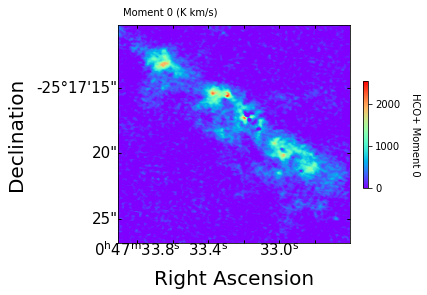

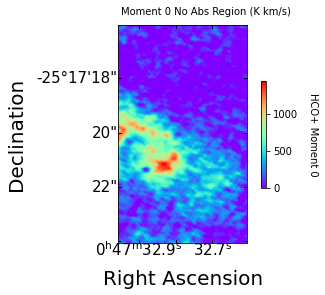

nan
4.954002325159296e+22 1 / cm2


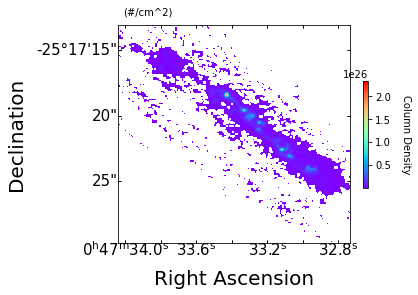

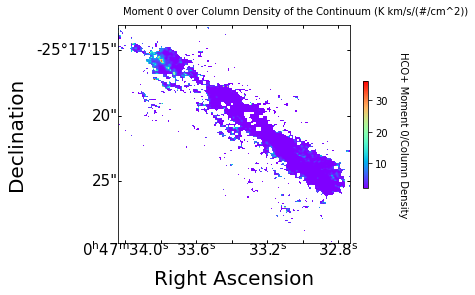

nan
3.489355484284155e+22 1 / cm2
[42] [135] (200, 81)
<class 'float'> <class 'float'> 0.675


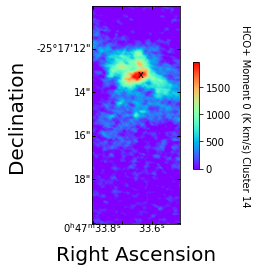

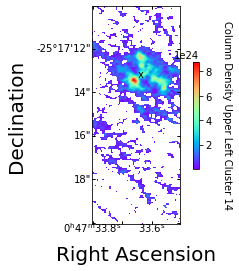

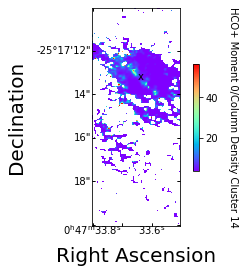

0.0007903749349130207

0.18478998038289599 arcsec 0.25165309832820004 arcsec
18.601188441342256 pix2
(410,) (84,)


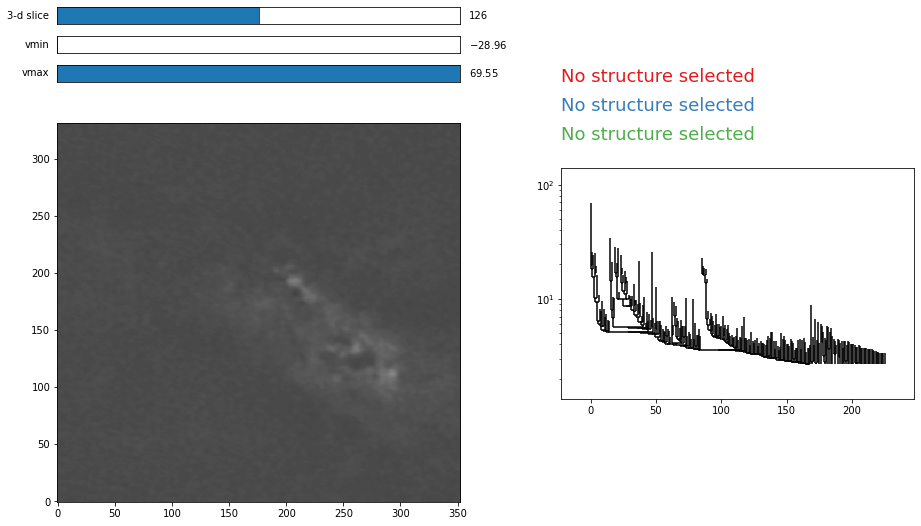

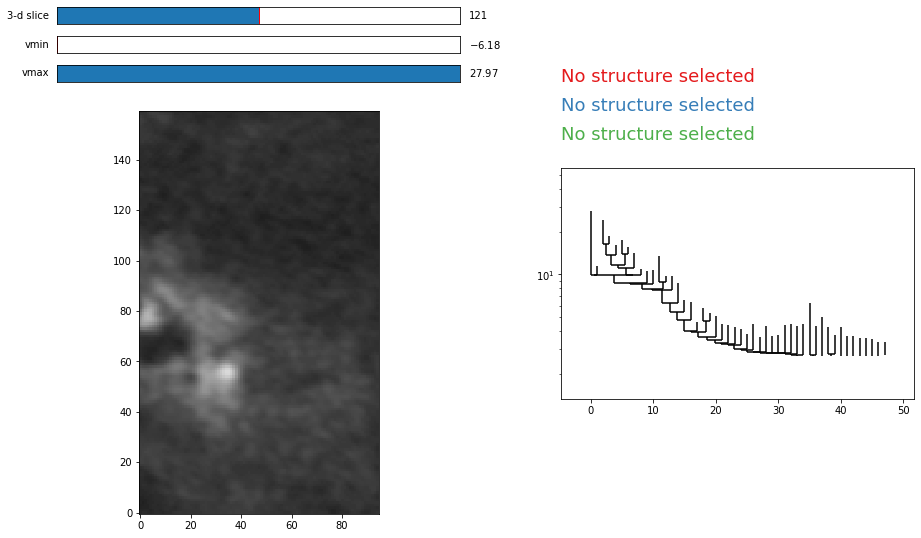

(104,)
(24,)
(104,) (104,)
[2.70540321 0.76135606] [[ 0.06752155 -0.00995522]
 [-0.00995522  0.001568  ]] Size Linewidth All_structures:
a =  2.705403208186182 +- 0.25984909951002055
b =  0.7613560556255977 +- 0.03959795386190334
[2.70540321 0.76135606] [[ 0.06752155 -0.00995522]
 [-0.00995522  0.001568  ]] Size Linewidth All_structures No abs:
a =  2.33851761310265 +- 0.5928967881040139
b =  0.7974144447041308 +- 0.11028377915600492
[3.90070586e+24 2.52292472e-01] [[ 3.78598521e+48 -4.42662665e+23]
 [-4.42662665e+23  5.55548033e-02]] Radius to Luminosity:
c =  3.900705859543608e+24 +- 1.945760830034365e+24
d =  0.25229247158543017 +- 0.23570066454888478
[0.00078148 0.14910568] [[ 1.93886547e-06 -3.56688642e-05]
 [-3.56688642e-05  6.56747083e-04]] Column Density to linewidth^2/size:
e =  0.0007814783061415658 +- 0.0013924314952249858
f =  0.1491056775165088 +- 0.025627077146695744
[2.65255564 0.70603626] [[ 0.14503151 -0.02088942]
 [-0.02088942  0.00325641]] Size Linewidth Region 14:
a

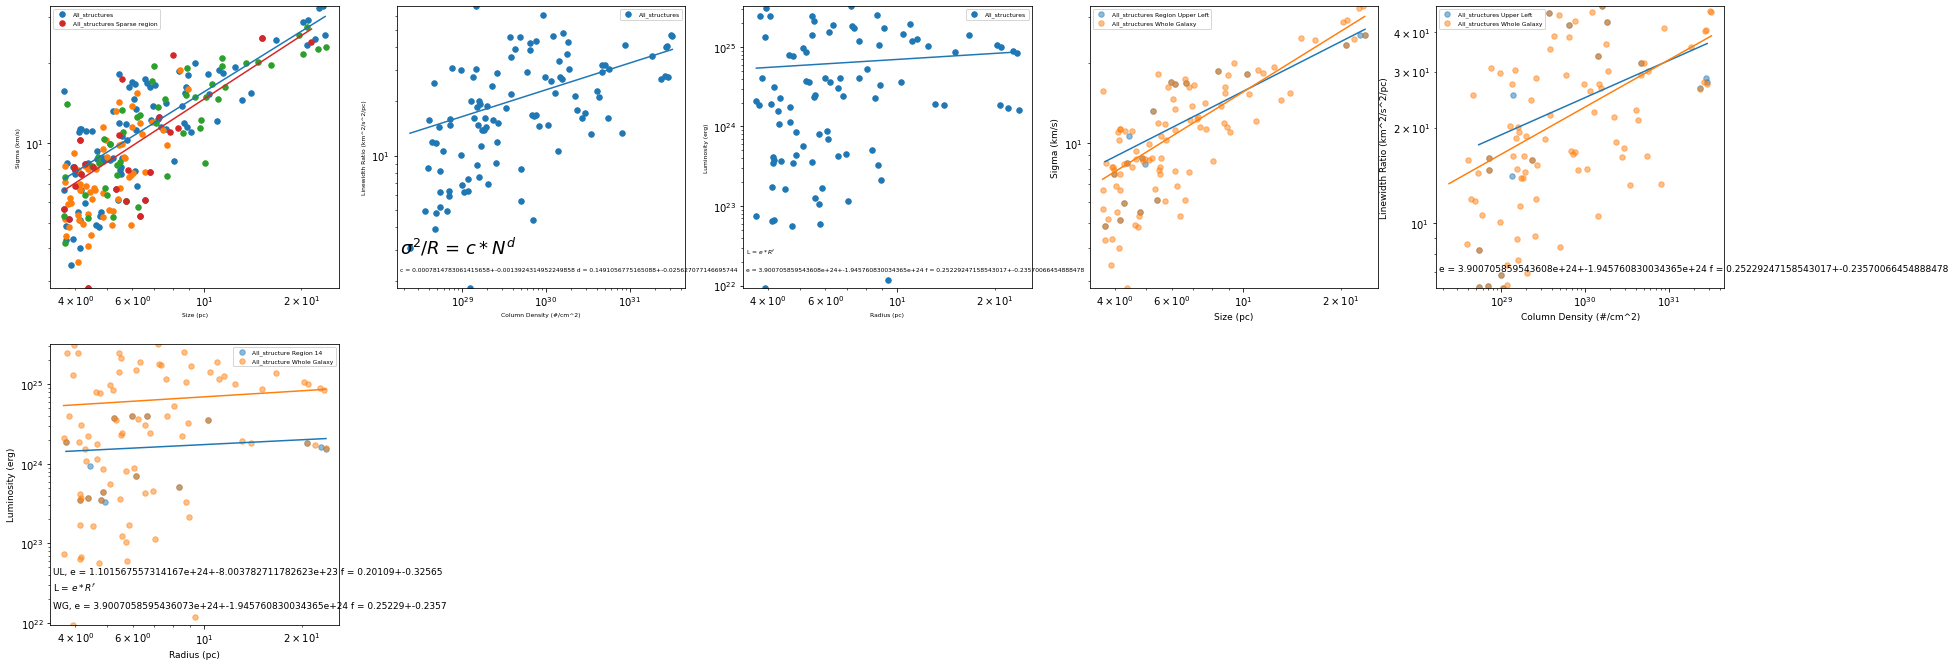

In [71]:
##### HCN_J1-0

Num=1
Overlaps=0#4
Ram_Limiter=1#What percent of the cube my ram can handle
Name = "HCN-J1_Dend_Abs"
name ="HCN_J1_0_Countours_CM_Abs.jpeg"
Num_per_kg= 6.0221409*10**23/(2.8*10**-3)#6.0221409*10**23/29.0180*10**-3#num/kg for h2

NameS = (Name+"Sigmas")
NameR = (Name+"Radii")
RNames[Num] = NameR
SNames[Num] = NameS
np.save("RNames",RNames)
np.save("SNames",SNames)
print(NameS)

#Put this up here for the column density map
def Flux_to_Mass(flux):
    J_to_e = 10**-23*u.erg/u.s/u.cm**2/u.Hz/u.Jy
    flux_erg = flux*J_to_e
    L = 4*np.pi*(3.5*3.086*10**24)**2*flux_erg*u.cm**2 #Megaparsec is converted to cm
    
    
    a_850 = 6.7*10**19*u.erg/u.s/u.Hz/u.M_sun #6.7+-1.7
    
    M_mol = L/a_850#Just in Solar mass*1.989*10**30*u.kg/u.M_sun#Determines mass of the cont for 850 in kg
    return M_mol
def Flux_to_Lum(flux):
    J_to_e = 10**-23*u.erg/u.s/u.cm**2/u.Hz/u.Jy
    flux_erg = flux*J_to_e
    L = 4*np.pi*(3.5*3.086*10**24)**2*flux_erg*u.cm**2 #Megaparsec is converted to cm
    
    return L


paths = pylab.array(['NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_HCN_J1.cube.reproject.K-kms.pbcor.fits','NGC_H13CN_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_CO_J3_2.cube.reproject.K-kms.pbcor.fits','SiJ2_1.cube.reproject.K-kms.pbcor.fits','H13CoPJ1_0.cube.reproject.K-kms.pbcor.fits','CCH_N1.cube.reproject.K-kms.pbcor.fits','HC3N_J11.cube.reproject.K-kms.pbcor.fits','NGC_H13CN.cube.reproject.K-kms.pbcor.fits','NGC_HCO_Plus.cube.K-kms.pbcor.fits','NGC253_HCN.cube.reproject.K-kms.pbcor.fits'])
path = paths[Num]

pathCont = 'Continuum_Reproject.fits'
#path='HCOp_J1-0.cube.fits'
pathCont = 'Continuum_Reproject.fits'
print(path)
Confidences = np.load('Confidence_data.npy')

Noises = np.load('Noises_K.npy')
#Noises = Ns
m = Noises[Num]
print(m)
#Continuum image
scCont = spectral_cube.Projection.from_hdu(fits.open(pathCont)[0])
#Put this up here for the column density map
metadata = {}
metadata["distance"] = 3.5*u.Mpc
try:
    freqC = scCont.hdu.header["RESTFREQ"]*u.Hz#
except:
    freqC = scCont.hdu.header["RESTFRQ"]*u.Hz#
arc_per_pix_yc =  abs(scCont.hdu.header["CDELT1"]*3600.0 * u.arcsec)/u.pix
arc_per_pix_xc =  abs(scCont.hdu.header["CDELT2"]*3600.0 * u.arcsec)/u.pix
beam_majorc =  scCont.hdu.header["BMAJ"]*3600.0 * u.arcsec
beam_minorc =  scCont.hdu.header["BMIN"]*3600.0 * u.arcsec
beam_area_ratioc = beam_minorc*beam_majorc/arc_per_pix_yc/arc_per_pix_xc
metadata['beam_area_ratioc']=beam_area_ratioc
pc_per_pixelc = abs(scCont.hdu.header["CDELT1"])/180*np.pi*metadata['distance']/u.Mpc



#Make subcube
Qp = SpectralCube.read(path).with_spectral_unit(u.km/u.s,velocity_convention="radio")
Qp.allow_huge_operations=True

Q = Qp.to(u.K).spectral_slab(-200. *u.km / u.s, 700. *u.km / u.s)

sc = Q.unmasked_copy()
#scQ = Q
scW = sc.wcs[:][:][0]


dat = sc.hdu.data[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
scn = sc[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
print(np.shape(dat),np.shape(scn))
cen_p1 = SkyCoord('00h47m33.9s', '-25d17m26.8s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.6s', '-25d17m10.2s', frame='icrs')

scF = Crop(scn,scn.wcs,cen_p1,cen_p2,0,False)
datn = Crop(dat,scn.wcs,cen_p1,cen_p2,0,False)

#Do the same thing to the continuum image
scContW =  Crop(scCont,scCont.wcs,cen_p1,cen_p2,5,True)

print(np.shape(datn),np.shape(scCont))
#Cubes with little dense gas and abs
AbpRAD1 = SkyCoord('00h47m32.95s', '-25d17m24.0s', frame='icrs')
AbpRAD2 = SkyCoord('00h47m32.6s', '-25d17m16.0s', frame='icrs')
SCNA= Crop(scn,scW,AbpRAD1,AbpRAD2,5,False)
scContNA = Crop(scCont,scCont.wcs,AbpRAD1,AbpRAD2,0,True)
datna = SCNA.hdu.data 
print(np.shape(SCNA))

UL1 = SkyCoord('00h47m33.8s', '-25d17m20.0s', frame='icrs')
UL2 = SkyCoord('00h47m33.5s', '-25d17m10.0s', frame='icrs')
scWCS = scF.wcs[:][:][0]
scWCSNA = SCNA.wcs[:][:][0]
moment_0_subNA  = SCNA.moment(order=0,how='slice')            # Calculate the Moment 0 map 
moment_0_sub  = scF.moment(order=0,how='slice')            # Calculate the Moment 0 map 
UpLeft = Crop(scCont,scCont.wcs,UL1,UL2,5,True)
SCUL = Crop(scn,scn.wcs,UL1,UL2,0,False)
moment_0_UL = SCUL.moment(order=0,how='slice')            # Calculate the Moment 0 map 
######Moment 0 for both
######and cont
Make_Plot("HCO+ Moment 0","Moment 0 (K km/s)",moment_0_sub.hdu.data,0,np.nanmax(moment_0_sub.hdu.data),moment_0_sub.wcs,1,1,1,True)
#Make_Plot("Continuum","Continuum (Jy/Beam)",scContW.hdu.data,0,np.nanmax(scCont.hdu.data),scCont.wcs,1,1,1,True)
Make_Plot("HCO+ Moment 0","Moment 0 No Abs Region (K km/s)",moment_0_subNA.hdu.data,0,np.nanmax(moment_0_subNA.hdu.data),moment_0_subNA.wcs,1,1,1,True)


cSD = (Flux_to_Mass(scContW.hdu.data*u.Jy/u.beam/beam_area_ratioc*u.pix**2*u.beam*4*np.log(2))/(pc_per_pixelc*10**6*3.086*10**18*u.cm)**2)*(1.989*10**30*u.kg/u.M_sun)*Num_per_kg/u.kg #Flux goes to luminosity for a gaussian beam and goes to column density for square pixels, mass goes to kg to number
rm=moment_0_sub.hdu.data/cSD
rmU = rm*u.K*u.km/u.s#Just put back in the units
rmU = np.array(rmU /(u.K*u.km/u.s)/u.cm**2*10**22,dtype='float64')#Now remove them all
print(rmU[0][0])
######ratio
    
bp = np.where(cSD<=np.nanmean(np.nanstd(cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50],axis=0))*.05)
bp2 = np.where( moment_0_sub.hdu.data < m*.05)
print(np.nanmean(np.nanstd(cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50],axis=0))*.05)
cSD[bp]=np.nan
rmU[bp]=np.nan
rmU[bp2]=np.nan

#Make_Plot("HCO+ Moment 0/Column Density","Moment 0 over Column Density of the Continuum (K km/s/(#/cm^2))",moment_0_subNA.hdu.data,0,np.nanmax(moment_0_subNA.hdu.data),scCont.wcs,1,1,1,True)
Make_Plot("Column Density","(#/cm^2)",cSD,float(np.nanmin(cSD*u.cm**2)),float(np.nanmax(cSD*u.cm**2)),scCont.wcs,1,1,1,True)
Make_Plot("HCO+ Moment 0/Column Density","Moment 0 over Column Density of the Continuum (K km/s/(#/cm^2))",rmU,np.nanmean(rmU)*.5,abs(np.nanmean(rmU))*8,scCont.wcs,1,1,1,True)

#Region of interest in upper left
cSDUL = (Flux_to_Mass(UpLeft.hdu.data*u.Jy/u.beam/beam_area_ratioc*u.pix**2*u.beam*4*np.log(2))/(pc_per_pixelc*10**6*3.086*10**18*u.cm)**2)*(1.989*10**30*u.kg/u.M_sun)*Num_per_kg/u.kg #Flux goes to luminosity for a gaussian beam and goes to column density for square pixels, mass goes to kg to number
rmUL=moment_0_UL.hdu.data/cSDUL
rmUUL = rmUL*u.K*u.km/u.s#Just put back in the units
rmUUL = np.array(rmUUL /(u.K*u.km/u.s)/u.cm**2*10**22,dtype='float64')#Now remove them all
print(rmUUL[0][0])
######ratio
    
bp = np.where(cSDUL<=np.nanmean(np.nanstd(cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50],axis=0))*.05)
bp2 = np.where( moment_0_UL.hdu.data < m*.05)
print(np.nanmean(np.nanstd(cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50],axis=0))*.05)
cSDUL[bp]=np.nan
rmUUL[bp]=np.nan
rmUUL[bp2]=np.nan

z,yf,xf = np.where(SCUL.hdu.data==np.nanmax(SCUL.hdu.data))
print(xf,yf,np.shape(UpLeft.hdu.data))
xf,yf = float(xf/np.shape(UpLeft.hdu.data)[1]),float(yf/np.shape(UpLeft.hdu.data)[0])
print(type(xf),type(.5),yf)
Make_Plot_Anno("HCO+ Moment 0 (K km/s) Cluster 14","x",moment_0_UL.hdu.data,0,np.nanmax(moment_0_UL.hdu.data),UpLeft.wcs,1,1,1,True,xf,yf)
Make_Plot_Anno("Column Density Upper Left Cluster 14","x",cSDUL,float(np.nanmin(cSDUL*u.cm**2)),float(np.nanmax(cSDUL*u.cm**2)),UpLeft.wcs,1,1,1,True,xf,yf)
Make_Plot_Anno("HCO+ Moment 0/Column Density Cluster 14","x",rmUUL,np.nanmean(rmUUL)*.5,abs(np.nanmean(rmUUL))*8,UpLeft.wcs,1,1,1,True,xf,yf)


print(np.nanmin(rmU))



header = scF.hdu.header
print()
#make metadata for the dendrogram

try:
    freq = header["RESTFREQ"]*u.Hz#
    metadata['wavelength']=299792458*u.m/header["RESTFREQ"]#
except:
    freq = header["RESTFRQ"]*u.Hz#
    metadata['wavelength']=299792458*u.m/header["RESTFRQ"]#
metadata['data_unit'] =u.K# header['BUNIT']
metadata['arc_per_pix_y'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['arc_per_pix_x'] =  abs(header["CDELT2"]*3600.0 * u.arcsec)/u.pix


metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix_y']/metadata['arc_per_pix_x'] 
metadata['beam_area_ratio']=beam_area_ratio
metadata['spatial_scale'] =  np.sqrt(header["BMAJ"]*header["BMIN"]*u.degree**2)
area_res = abs(header["CDELT1"])*abs(header["CDELT2"])*(np.pi/180*3.5)**2#mpc^2/pix^2


print(metadata['beam_minor'],metadata['beam_major'])
print(beam_area_ratio)
#metadata["wcs"] = wcs
metadata["velocity_scale"] = abs(header["CDELT3"])*u.km/u.s#3.3714064157379937*u.km/u.s

metadata["vaxis"]=0

d = astrodendro.Dendrogram.compute(datn,min_delta=m,min_value=m*5,min_npix=50) #The main culprit
dNA = astrodendro.Dendrogram.compute(datna,min_value=m*5,min_delta=m,min_npix=50) #The main culprit
dUL = astrodendro.Dendrogram.compute(SCUL.hdu.data,min_value=m*5,min_delta=m,min_npix=50) #The main culprit



##Analyze dendograms
print(np.shape(d),np.shape(dNA))

v = d.viewer()
v.show()
p=d.plotter()

v = dNA.viewer()
v.show()
p=dNA.plotter()

fig = plt.figure(1,figsize=(30,30))


pc_per_pixel = abs(header["CDELT1"])/180*np.pi*metadata['distance']/u.Mpc

sig_per_pixel=np.nan#metadata['spectral_resolution']/u.pix


#Finds Size, Linewidth, Luminosity, and Column Density of a structure for each structure and returns them in [[][]] arrays [Leaves][Branches]
vel,RA,Dec = scF.world[:,0,0]
Rads,Sigmas,Lumin,CD = Dendro_Arrays(d,datn,vel,scContW.hdu.data,metadata)
RadsNA,SigmasNA,LuminNA,CDNA = Dendro_Arrays(dNA,datna,vel,scContNA.hdu.data,metadata)
RadsUL,SigmasUL,LuminUL,CDUL = Dendro_Arrays(dUL,SCUL.hdu.data,vel,UpLeft.hdu.data,metadata)
#def Dendro_Arrays(Dendrogram,LineData,DataVel,ContData,metadata):
    

from scipy.optimize import curve_fit
from scipy.optimize import leastsq

def func(R,a,b):
    return a*R**(b)
try:
    popt, pcov = curve_fit(func, Rads[0]*10**6,Sigmas[0])
except:
    popt, pcov = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
try:
    poptB, pcovB = curve_fit(func,  Rads[1]*10**6,Sigmas[1])
except:
    poptB, pcovB = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]


    
Rcon = np.concatenate((Rads[0],Rads[1]))
Scon = np.concatenate((Sigmas[0],Sigmas[1]))
print(np.shape(Rcon))
poptCon, pcovCon = curve_fit(func, Rcon*10**6, Scon)





RconNA = np.concatenate((RadsNA[0],RadsNA[1]))
SconNA = np.concatenate((SigmasNA[0],SigmasNA[1]))
print(np.shape(RconNA))
poptConNA, pcovConNA = curve_fit(func, RconNA*10**6, SconNA)







xs=np.linspace(np.nanmin(Rcon*10**6),np.nanmax(Rcon*10**6),50)
ysL,ysB,ysCon=func(xs,popt[0],popt[1]),func(xs,poptB[0],poptB[1]),func(xs,poptCon[0],poptCon[1])

xsNA = np.linspace(np.nanmin(RconNA*10**6),np.nanmax(RconNA*10**6),50)
ysNA = func(xsNA,poptConNA[0],poptConNA[1])

LuminCon = np.concatenate((Lumin[0],Lumin[1]))
ColumnCon= np.concatenate((CD[0],CD[1]))
#Flux ratios fit
#FRpopt,FRpcov = curve_fit(func, abs(FRs),Scon**2/Rcon/10**6)
#xsF=np.linspace(np.nanmin(abs(FRs)),np.nanmax(abs(FRs)),50)
#ysF = func(xsF,FRpopt[0],FRpopt[1])

#Radius Luminosity fit
gp = np.where(LuminCon>0)
#print(gp)
#print(LuminCon[gp])
print(np.shape(Rcon),np.shape(LuminCon))
lgp = LuminCon[gp]
radgp = Rcon[gp]*10**6
#print(np.shape(Rcon[gp]*10**6),np.shape(LuminCon[gp]))
RLpopt,RLpcov = curve_fit(func, np.array(radgp,dtype='float64'),np.array(lgp,dtype='float64'),maxfev=999999,p0 = np.array([10**27,1],dtype='float64'),ftol = 10**-10)

xsRL=np.linspace(np.nanmin(radgp),np.nanmax(radgp),50)
ysRL = func(xsRL,RLpopt[0],RLpopt[1])

#Column density to Size-linewidth
gp2 = np.where(ColumnCon>0)
cgp = ColumnCon[gp2]
rgp=Scon[gp2]**2/Rcon[gp2]/10**6
CDpopt,CDpcov = curve_fit(func, np.array(cgp,dtype='float64') ,np.array(rgp,dtype='float64'),maxfev=9999099,p0 = np.array([10,.01],dtype='float64'),ftol = 10**-10)
xsCD=np.linspace(np.nanmin(cgp),np.nanmax(cgp),50)
ysCD = func(xsCD,CDpopt[0],CDpopt[1])

print(poptCon,pcovCon,"Size Linewidth All_structures:")
print("a = ",poptCon[0],"+-",np.sqrt(pcovCon[0][0]))
print("b = ",poptCon[1],"+-",np.sqrt(pcovCon[1][1]))

print(poptCon,pcovCon,"Size Linewidth All_structures No abs:")
print("a = ",poptConNA[0],"+-",np.sqrt(pcovConNA[0][0]))
print("b = ",poptConNA[1],"+-",np.sqrt(pcovConNA[1][1]))

print(RLpopt,RLpcov,"Radius to Luminosity:")
print("c = ",RLpopt[0],"+-",np.sqrt(RLpcov[0][0]))
print("d = ",RLpopt[1],"+-",np.sqrt(RLpcov[1][1]))

print(CDpopt,CDpcov,"Column Density to linewidth^2/size:")
print("e = ",CDpopt[0],"+-",np.sqrt(CDpcov[0][0]))
print("f = ",CDpopt[1],"+-",np.sqrt(CDpcov[1][1]))


fig = plt.figure(1,figsize=(15,15))

ax2 = pylab.subplot(5, 5, 1)
ax3 = pylab.subplot(5, 5, 2)
ax4 = pylab.subplot(5, 5, 3)




xpcon,xpL,xpB = ax2.scatter(Rcon*10**6,Scon,label="All_structures",s=30),ax2.scatter(radsL*10**6,sigmasL,s=30),ax2.scatter(radsB*10**6,sigmasB,s=30)
p,p2,p3 = ax2.plot(xs,ysCon),ax2.plot(xs,ysL),ax2.plot(xs,ysB)

pNA = ax2.plot(xsNA,ysNA)
xpNA = ax2.scatter(RconNA*10**6,SconNA,label="All_structures Sparse region",s=30)

ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_ylim(np.nanmin(Scon),np.nanmax(Scon))
ax2.set_xlabel("Size (pc)",fontsize=6)
ax2.set_ylabel("Sigma (km/s)",fontsize=6)
ax2.legend(prop={'size': 6})


#gp = np.where(FRs>0)





xspF = ax3.scatter(cgp,rgp,label="All_structures",s=30)
pF = ax3.plot(xsCD,ysCD)
ax3.annotate(s=r'$\sigma^2/R$ = $c*N^d$',fontsize=18,xy=(0.01,0.12),xycoords="axes fraction")
st = "c = "+ str(CDpopt[0])+"+-"+str(np.sqrt(CDpcov[0][0]))+" d = "+str(CDpopt[1])+"+-"+str(np.sqrt(CDpcov[1][1]))

ax3.annotate(s=st,fontsize=6,xy=(0.01,0.06),xycoords="axes fraction")
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_ylim(np.nanmin(rgp),np.nanmax(rgp))
ax3.set_xlabel("Column Density (#/cm^2)",fontsize=6)
ax3.set_ylabel("Linewidth Ratio (km^2/s^2/pc)",fontsize=6)
ax3.legend(prop={'size': 6})



xspL = ax4.scatter(radgp,lgp,label="All_structures",s=30)
pFLL = ax4.plot(xsRL,ysRL)

st = "e = "+ str(RLpopt[0])+"+-"+str(np.sqrt(RLpcov[0][0]))+" f = "+str(RLpopt[1])+"+-"+str(np.sqrt(RLpcov[1][1]))
ax4.annotate(s='L = $e*R^f$',fontsize=6,xy=(0.01,0.12),xycoords="axes fraction")
ax4.annotate(s=st,fontsize=6,xy=(0.01,0.06),xycoords="axes fraction")

ax4.set_yscale('log')
ax4.set_xscale('log')
ax4.set_ylim(np.nanmin(lgp),np.nanmax(lgp))
ax4.set_xlabel("Radius (pc)",fontsize=6)
ax4.set_ylabel("Luminosity (erg)",fontsize=6)
ax4.legend(prop={'size': 6})




    
RconUL = np.concatenate((RadsUL[0],RadsUL[1]))
SconUL = np.concatenate((SigmasUL[0],SigmasUL[1]))

poptUL, pcovUL = curve_fit(func, RconUL*10**6, SconUL)








xsUL=np.linspace(np.nanmin(RconUL*10**6),np.nanmax(RconUL*10**6),50)
ysUL=func(xsUL,poptUL[0],poptUL[1])

LuminConUL = np.concatenate((LuminUL[0],LuminUL[1]))
ColumnConUL= np.concatenate((CDUL[0],CDUL[1]))

#Radius Luminosity fit
gp = np.where(LuminConUL>0)
lgpUL = LuminConUL[gp]
radgpUL = RconUL[gp]*10**6
#print(np.shape(Rcon[gp]*10**6),np.shape(LuminCon[gp]))
RLpoptUL,RLpcovUL = curve_fit(func, np.array(radgpUL,dtype='float64'),np.array(lgpUL,dtype='float64'),maxfev=999999,p0 = np.array([10**27,1],dtype='float64'),ftol = 10**-10)

xsRLUL=np.linspace(np.nanmin(radgpUL),np.nanmax(radgpUL),50)
ysRLUL = func(xsRLUL,RLpoptUL[0],RLpoptUL[1])

#Column density to Size-linewidth
gp2 = np.where(ColumnConUL>0)
cgpUL = ColumnConUL[gp2]
rgpUL=SconUL[gp2]**2/RconUL[gp2]/10**6
CDpoptUL,CDpcovUL = curve_fit(func, np.array(cgpUL,dtype='float64') ,np.array(rgpUL,dtype='float64'),maxfev=9999099,p0 = np.array([10,.01],dtype='float64'),ftol = 10**-10)
xsCDUL=np.linspace(np.nanmin(cgpUL),np.nanmax(cgpUL),50)
ysCDUL = func(xsCDUL,CDpoptUL[0],CDpoptUL[1])

print(poptConUL,pcovConUL,"Size Linewidth Region 14:")
print("a = ",poptConUL[0],"+-",np.sqrt(pcovConUL[0][0]))
print("b = ",poptConUL[1],"+-",np.sqrt(pcovConUL[1][1]))

print(RLpoptUL,RLpcovUL,"Radius to Luminosity Region 14:")
print("c = ",RLpoptUL[0],"+-",np.sqrt(RLpcovUL[0][0]))
print("d = ",RLpoptUL[1],"+-",np.sqrt(RLpcovUL[1][1]))


ax5 = pylab.subplot(5, 5, 4)
ax6 = pylab.subplot(5, 5, 5)
ax7 = pylab.subplot(5, 5, 6)




xpconhh = ax5.scatter(RconUL*10**6,SconUL,label="All_structures Region Upper Left",s=30,alpha=.5)
p2 = ax5.plot(xsUL,ysUL)
xpconhh2 = ax5.scatter(Rcon*10**6,Scon,label="All_structures Whole Galaxy",s=30,alpha=.5)
p22 = ax5.plot(xs,ysCon)

ax5.set_yscale('log')
ax5.set_xscale('log')
ax5.set_ylim(np.nanmin(Scon),np.nanmax(Scon))
ax5.set_xlabel("Size (pc)",fontsize=9)
ax5.set_ylabel("Sigma (km/s)",fontsize=9)
ax5.legend(prop={'size': 6})


#gp = np.where(FRs>0)





xspFUL = ax6.scatter(cgpUL,rgpUL,label="All_structures Upper Left",s=30,alpha=.5)
pFUL = ax6.plot(xsCDUL,ysCDUL)

xspFUL2 = ax6.scatter(cgp,rgp,label="All_structures Whole Galaxy",s=30,alpha=.5)
pFUL2 = ax6.plot(xsCD,ysCD)



ax6.annotate(s=st,fontsize=9,xy=(0.01,0.06),xycoords="axes fraction")
ax6.set_yscale('log')
ax6.set_xscale('log')
ax6.set_ylim(np.nanmin(rgpUL),np.nanmax(rgpUL))
ax6.set_xlabel("Column Density (#/cm^2)",fontsize=9)
ax6.set_ylabel("Linewidth Ratio (km^2/s^2/pc)",fontsize=9)
ax6.legend(prop={'size': 6})



xspLu = ax7.scatter(radgpUL,lgpUL,label="All_structure Region 14",s=30,alpha=.5)
pFLLu = ax7.plot(xsRLUL,ysRLUL)
xspLu2 = ax7.scatter(radgp,lgp,label="All_structure Whole Galaxy",s=30,alpha=.5)
pFLLu2 = ax7.plot(xsRL,ysRL)

st = "WG, e = "+ str(round(RLpopt[0],5))+"+-"+str(round(np.sqrt(RLpcov[0][0]),5))+" f = "+str(round(RLpopt[1],5))+"+-"+str(round(np.sqrt(RLpcov[1][1]),5))
ax7.annotate(s='L = $e*R^f$',fontsize=9,xy=(0.01,0.12),xycoords="axes fraction")
ax7.annotate(s=st,fontsize=9,xy=(0.01,0.06),xycoords="axes fraction")
st2 = "UL, e = "+ str(round(RLpoptUL[0],5))+"+-"+str(round(np.sqrt(RLpcovUL[0][0]),5))+" f = "+str(round(RLpoptUL[1],5))+"+-"+str(round(np.sqrt(RLpcovUL[1][1]),5))
ax7.annotate(s=st2,fontsize=9,xy=(0.01,0.18),xycoords="axes fraction")

ax7.set_yscale('log')
ax7.set_xscale('log')
ax7.set_ylim(np.nanmin(lgp),np.nanmax(lgp))
ax7.set_xlabel("Radius (pc)",fontsize=9)
ax7.set_ylabel("Luminosity (erg)",fontsize=9)
ax7.legend(prop={'size': 6})
#print(FRs)
NameSL = (NameS+"_Leaves")
NameSB = (NameS+"_Branches")
NameRL = (NameR+"_Leaves")
NameRB = (NameR+"_Branches")

NameSNA = (NameS+"_NA")
NameRNA = (NameR+"_NA")


NameCol = (Name+"_Column")
NameLum = (Name+"_Luminosities")
np.save(NameCol,ColumnCon)
np.save(NameLum,LuminCon)

np.save(NameSL,sigmasL)
np.save(NameSB,sigmasB)
np.save(NameRL,radsL)
np.save(NameRB,radsB)


np.save(NameRNA,RconNA)
np.save(NameSNA,SconNA)

In [ ]:
#SiO_J2-1


Num=4
Overlaps=1#4
Ram_Limiter=1#What percent of the cube my ram can handle
Name = "SiO_J2-1_Abs"
name = "SiO_J2_1_CM_Contours_DS_10_Abs.jpeg"
NameS = (Name+"Sigmas")
NameR = (Name+"Radii")
RNames[Num] = NameR
SNames[Num] = NameS
np.save("RNames",RNames)
np.save("SNames",SNames)
print(NameS)
paths = pylab.array(['NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_HCN_J1.cube.reproject.K-kms.pbcor.fits','NGC_H13CN_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_CO_J3_2.cube.reproject.K-kms.pbcor.fits','SiJ2_1.cube.reproject.K-kms.pbcor.fits','H13CoPJ1_0.cube.reproject.K-kms.pbcor.fits','CCH_N1.cube.reproject.K-kms.pbcor.fits','HC3N_J11.cube.reproject.K-kms.pbcor.fits','NGC_H13CN.cube.reproject.K-kms.pbcor.fits','NGC_HCO_Plus.cube.K-kms.pbcor.fits','NGC253_HCN.cube.reproject.K-kms.pbcor.fits'])
path = paths[Num]
print(path)
Confidences = np.load('Confidence_data.npy')

Noises = np.load('Noises_K.npy')
#Noises = Ns
m = Noises[Num]
#Make subcube
Q = SpectralCube.read(path)  
sc = Q.unmasked_copy()
scQ = Q
scW = sc.wcs[:][:][0]
print(Confidences[0],Confidences.shape,sc.hdu.data.shape)
BP = np.where(Confidences<Overlaps)#Overlaps)
del Confidences
sc.hdu.data[BP]=np.nan
print(sc.hdu.data[BP])
dat = sc.hdu.data[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
print(np.shape(dat),np.shape(sc))
scn = sc[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
scQn = scQ[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
cen_p1 = SkyCoord('00h47m33.9s', '-25d17m26.8s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.6s', '-25d17m10.2s', frame='icrs')

#cen_p1 = SkyCoord('00h47m33.6s', '-25d17m16.8s', frame='icrs')
#cen_p2 = SkyCoord('00h47m33.3s', '-25d17m14.2s', frame='icrs')

scW = scn.wcs[:][:][0]
scQW = scQn.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
datn = dat[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
scF = scn[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
raQDP1 = [int(scQW.world_to_pixel(cen_p1)[0]),int(scQW.world_to_pixel(cen_p1)[1])]
raQDP2 = [int(scQW.world_to_pixel(cen_p2)[0]),int(scQW.world_to_pixel(cen_p2)[1])]
scQF = scQn[:,raQDP1[1]:raQDP2[1],raQDP1[0]:raQDP2[0]] # Make a subcube
scWCS = scF.wcs[:][:][0]
wcs = scF.wcs[:][:][0]
wcsQ = scQF.wcs[:][:][0]

#Unload all the unimportant vars

del BP
del paths


header = fits.getheader(path)

#make metadata for the dendrogram
metadata = {}

metadata['data_unit'] = u.Jy / u.beam
metadata['arc_per_pix'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix']**2 

print(metadata['beam_minor'],metadata['beam_major'])
print(beam_area_ratio)
#metadata["wcs"] = wcs
metadata["velocity_scale"] = abs(header["CDELT3"])*u.km/u.s#3.3714064157379937*u.km/u.s
metadata["distance"] = 3.5*u.Mpc


d = astrodendro.Dendrogram.compute(datn,min_delta=m,min_value=m*5,min_npix=50) #The main culprit




vel,NA,na = sc.world[:,0,0]

##Analyze dendograms
print(np.shape(d))

v = d.viewer()
v.show()
p=d.plotter()
fig = plt.figure(1,figsize=(30,30))

scU = SpectralCube.read(path)  
scWU = scU.wcs[:][:][0]
raDP1U = [int(scWU.world_to_pixel(cen_p1)[0]),int(scWU.world_to_pixel(cen_p1)[1])]
raDP2U = [int(scWU.world_to_pixel(cen_p2)[0]),int(scWU.world_to_pixel(cen_p2)[1])]
scNU = scU[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),raDP1U[1]:raDP2U[1],raDP1U[0]:raDP2U[0]] # Make a subcube based on position
scWU = scNU.wcs[:][:][0]
#####
SC_KMSU = scNU.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMSU.allow_huge_operations=True
SC_K_KMSU = SC_KMSU.to(u.K)
SC_K_KMS_slabU = SC_K_KMSU.spectral_slab(-888. *u.km / u.s, 888. *u.km / u.s)  # Extract a subset of the velocities
ds=20
SC_CM = SC_K_KMS_slabU.downsample_axis(ds,axis=0) # Here we use downsampling to bin (average)the data # into coarse bins (broad channels) with width ~ 11 km/s    
vel, dec, ra = SC_CM.world[:,0,0]           # For plotting purposes, I want to know the average velocity
wcsU = SC_CM.wcs[:][:][0]
#Done making unmasked CM

noplot=True #produce plot of channel maps and contours? y/n

for n in np.arange(0,len(SC_CM.hdu.data)):   
    if(noplot):
        break
    # Now we loop through each slice (averaged channels) 
    #ax = pylab.subplot(5,5,n+1,projection=wcsU) # We plot them in a grid    
    ax = pylab.subplot(5,5,n+1,projection=sc.wcs[:][:][0]) # We plot them in a grid    
    im = pylab.imshow(SC_CM.hdu.data[n],cmap='gray',vmin=0,vmax=m*8)
    #print(np.shape(datn),np.shape(np.nanmean(datn[n:n+9],axis=0)))
    #im = pylab.imshow(np.nanmean(datn[n*ds:ds*n+ds-1],axis=0),cmap='gray',vmin=0,vmax=m*8)
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-1)                                                                                      
    Dec.set_ticks(size=-1) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(0,0,s="%i km/s"%(vel.value[n]),fontsize=30,c="Red") # Print the velocity of each averaged channel
    ax.tick_params(axis = 'both', which = 'major', labelsize = 12) 
    cb=pylab.colorbar(im,fraction=0.035,pad=0.01) 
    if n==len(SC_CM.hdu.data)-1:
        pylab.xlabel("Right Ascension",fontsize=30)
        pylab.ylabel("Declination",labelpad=-13,fontsize=30,rotation=90)
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
    pylab.tight_layout(w_pad=6,h_pad=-0)
    
    for t in d.all_structures:
        
        I = t.indices()
        s = PPVStatistic(t,metadata=metadata)
        if(s.v_rms>1*u.pix and s.radius>1*u.pix and  s.radius<24*2*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 2):
            k=0
            for ll in range(len(I[0])):
                if(I[0][ll] - int((n+.5)*ds) ==0):
                    k=int((n+.5)*ds)
                    break
            for ll in range(len(I[0])):
                if(k==int((n+.5)*ds)  and n!= 0):
                    break
                miN=3
                if(abs(I[0][ll] - int((n+.5)*ds)) <miN):
                    k=I[0][ll]
                    break
            if(k!=0):
                p.plot_contour(ax, structure=t, lw=1, colors='red',alpha=.1,slice = k)
                ellipse = s.to_mpl_ellipse(edgecolor='pink', facecolor='pink',alpha=.1)
                ax.add_patch(ellipse)
            #print(t.indices())
            #break
if (noplot==False):
    fig.savefig(bbox_inches='tight',fname=name)


rads=np.array([])
sigmas=np.array([])

pc_per_pixel = metadata['arc_per_pix']/3600/180*np.pi/u.arcsec*metadata['distance']/u.Mpc
sig_per_pixel=np.nan#metadata['spectral_resolution']/u.pix
for t in d.all_structures: 
    
    I = t.indices()
    s = PPVStatistic(t,metadata=metadata)
        
    if(s.v_rms>1*u.pix and s.radius>1*u.pix and  s.radius<24*2*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 2):
        rads=np.append(rads,(s.radius*pc_per_pixel)) #convert pixel to pc (then make it dimensionless)
        sigmas=np.append(sigmas,(s.v_rms*sig_per_pixel))#Convert pixel to velocity (then make it dimensionless)


from scipy.optimize import curve_fit

def func(R,a,b):
    return a*R**(b)
popt, pcov = curve_fit(func, rads*10**6, sigmas)
print(popt,pcov)
print("a = ",popt[0],"+-",np.sqrt(pcov[0][0]))
print("b = ",popt[1],"+-",np.sqrt(pcov[1][1]))
fig = plt.figure()
ax = pylab.subplot(2, 1, 1)
xp1 = ax.scatter(rads*10**6,sigmas)
xs=np.linspace(np.nanmin(rads*10**6),np.nanmax(rads*10**6),50)
ys=func(xs,popt[0],popt[1])
xpa1 = ax.scatter(xs,ys)
plt.xlabel("Size (pc)")
plt.ylabel("Sigma (km/s)")
pylab.show()
ax2 = pylab.subplot(2, 1, 2)
xp = ax2.scatter(rads*10**6,sigmas)
p = ax2.plot(xs,ys,c='red')
ax2.set_yscale('log')
ax2.set_xscale('log')
plt.xlabel("Size (pc)")
plt.ylabel("Sigma (km/s)")
pylab.show()

np.save(NameS,sigmas)
np.save(NameR,rads)



CO 3-2_AbsSigmas
NGC_CO_J3_2.cube.reproject.K-kms.pbcor.fits
1.5264287758469108
[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]] (252, 400, 488) (252, 400, 488) nan K
[]
(252, 400, 488) (252, 400, 488)
[36, 57] [389, 389]
(252, 332, 353) (332, 353)
(242, 160, 95)


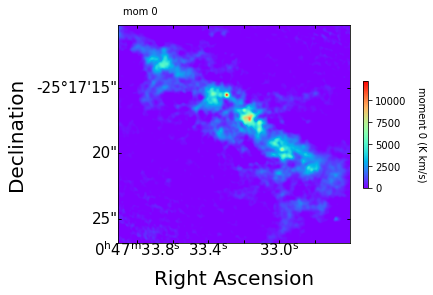

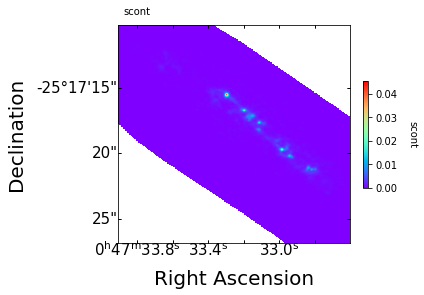

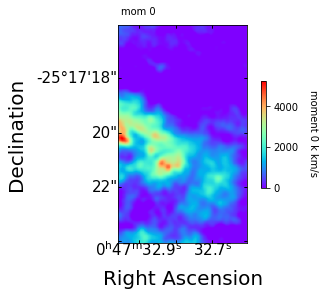

nan
4.954002325159296e+22 1 / cm2


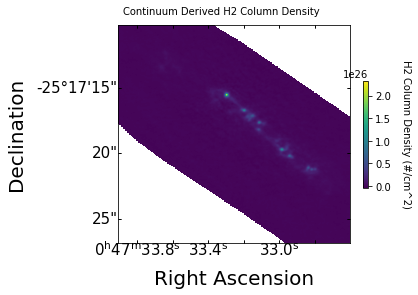

0.002821302031359044


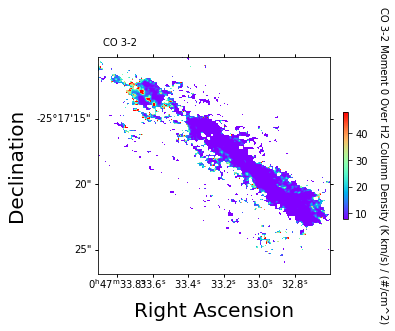


0.174999999999996 arcsec 0.174999999999996 arcsec
12.24999999999748 pix2
(608,) (155,)


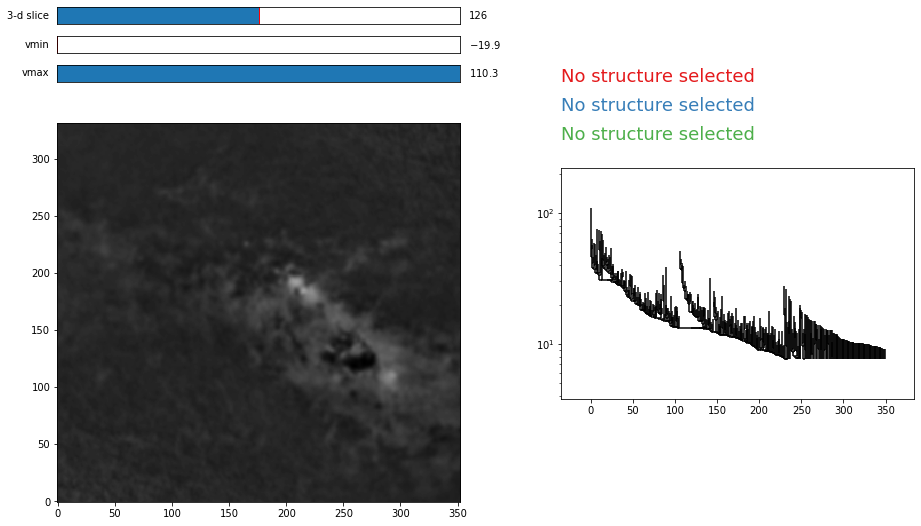

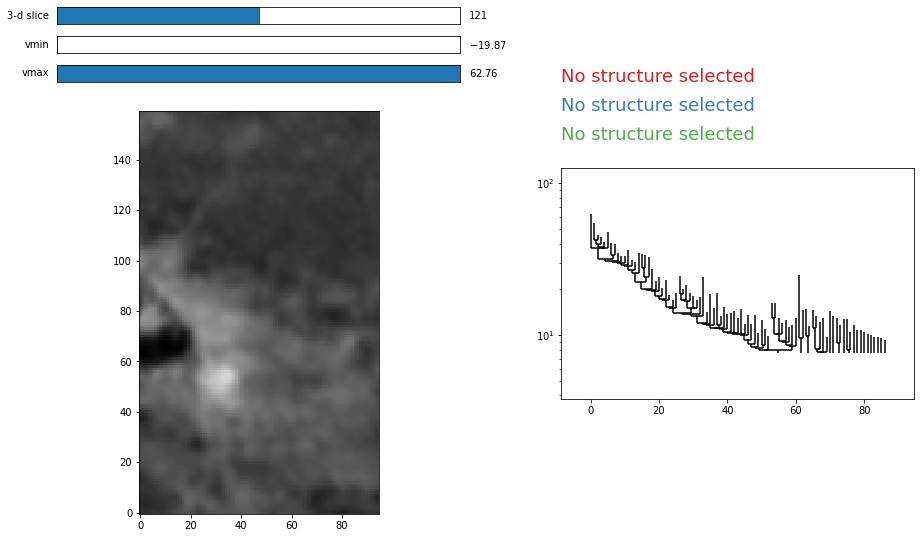

(240,)
(59,)
[8.53152013e+28 1.52523903e+29 9.51129759e+28 2.43398953e+29
 9.45945638e+28 2.59081632e+29 8.21301565e+28 3.30005186e+29
 2.52308112e+29 2.64724534e+29 1.64254099e+29 8.62499919e+28
 9.45172376e+28 1.06513146e+30 2.05481933e+29 7.66382362e+28
 3.60651651e+29 1.14151939e+29 3.09026277e+29 1.48290401e+29
 6.64014617e+29 2.20830731e+30 3.29570168e+29 2.07370050e+29
 2.40695518e+29 1.93963052e+29 6.66435554e+29 1.64080287e+29
 1.52580002e+29 2.54988287e+30 4.68243959e+30 3.78660009e+29
 1.58661102e+30 3.78527799e+29 6.63132027e+29 4.16454367e+29
 2.58699386e+29 1.78141613e+29 1.78646599e+29 7.10677921e+29
 2.85445462e+29 9.02919850e+30 1.29941870e+31 4.32905621e+29
 3.45219107e+30 5.62805222e+29 1.27885443e+30 2.48792769e+30
 3.94677888e+29 1.76253472e+30 1.57896104e+30 3.76669937e+29
 8.31513090e+29 1.17618023e+30 2.97449359e+30 2.26547481e+30
 3.96183568e+29 4.69208954e+29 3.18923022e+29 3.26284145e+29
 2.83299426e+29 6.41248380e+29 9.14782346e+29 4.84481804e+29
 2.14213430

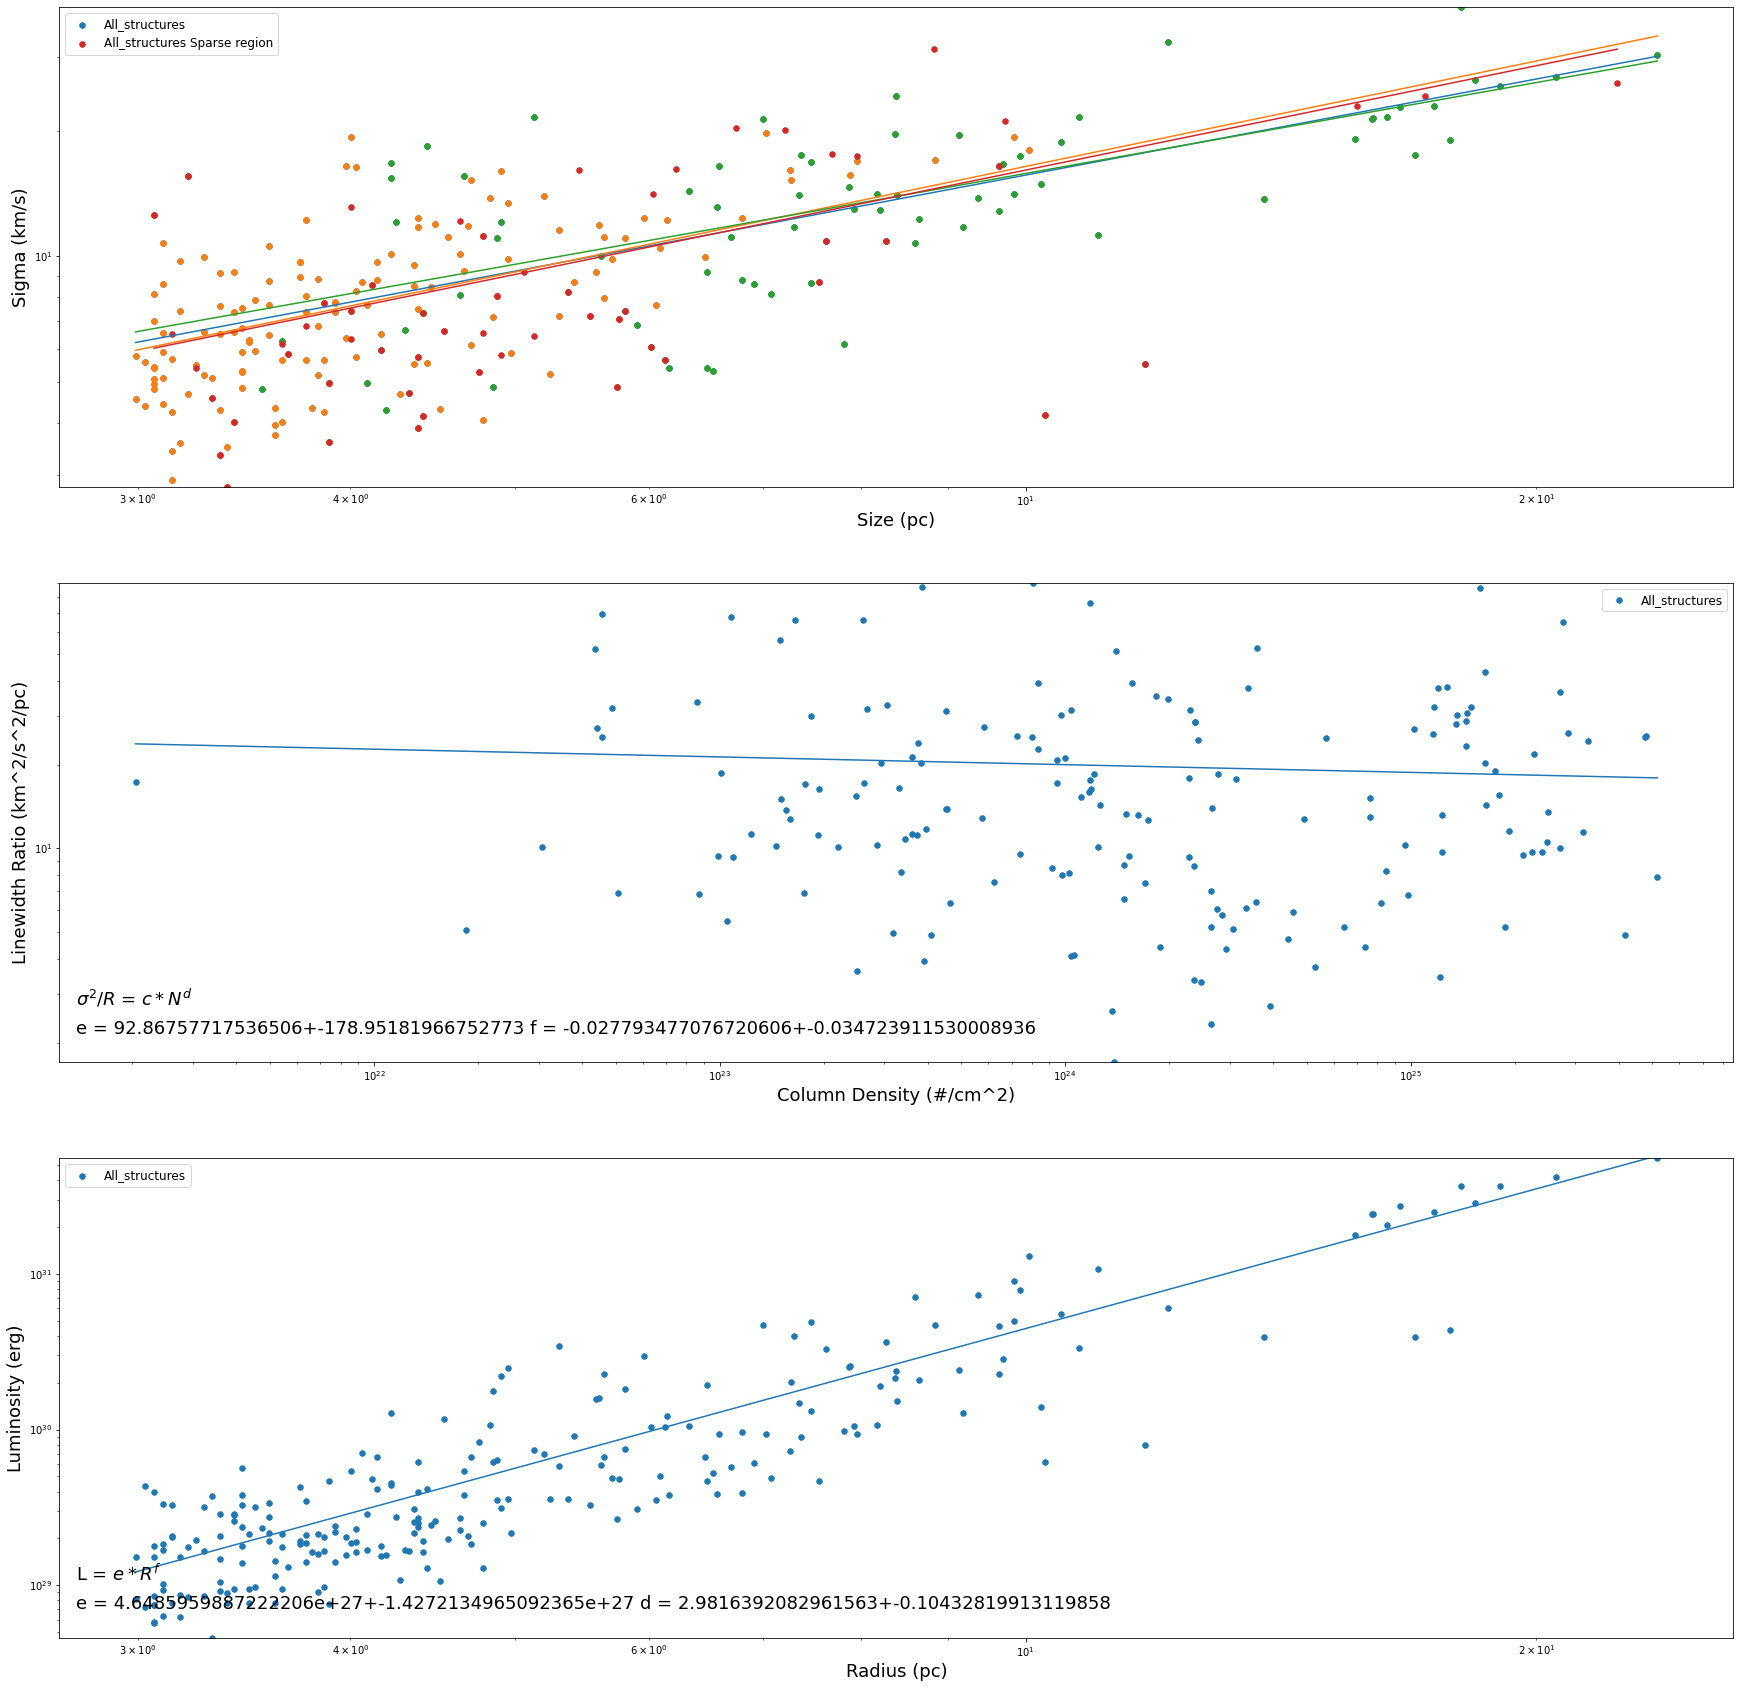

In [127]:
#CO 


Num=3
Overlaps=0#4
Ram_Limiter=1#What percent of the cube my ram can handle
Name = "CO 3-2_Abs"
name = "CO_3_2_CM_Contours_DS_10_Abs.jpeg"
Num_per_kg= 6.0221409*10**23/(2.8*10**-3)#6.0221409*10**23/29.0180*10**-3#num/kg for h2

NameS = (Name+"Sigmas")
NameR = (Name+"Radii")
RNames[Num] = NameR
SNames[Num] = NameS
np.save("RNames",RNames)
np.save("SNames",SNames)
print(NameS)

#Put this up here for the column density map
def Flux_to_Mass(flux):
    J_to_e = 10**-23*u.erg/u.s/u.cm**2/u.Hz/u.Jy
    flux_erg = flux*J_to_e
    L = 4*np.pi*(3.5*3.086*10**24)**2*flux_erg*u.cm**2 #Megaparsec is converted to cm
    
    
    a_850 = 6.7*10**19*u.erg/u.s/u.Hz/u.M_sun #6.7+-1.7
    
    M_mol = L/a_850#Just in Solar mass*1.989*10**30*u.kg/u.M_sun#Determines mass of the cont for 850 in kg
    return M_mol
def Flux_to_Lum(flux):
    J_to_e = 10**-23*u.erg/u.s/u.cm**2/u.Hz/u.Jy
    flux_erg = flux*J_to_e
    L = 4*np.pi*(3.5*3.086*10**24)**2*flux_erg*u.cm**2 #Megaparsec is converted to cm
    
    return L


paths = pylab.array(['NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_HCN_J1.cube.reproject.K-kms.pbcor.fits','NGC_H13CN_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_CO_J3_2.cube.reproject.K-kms.pbcor.fits','SiJ2_1.cube.reproject.K-kms.pbcor.fits','H13CoPJ1_0.cube.reproject.K-kms.pbcor.fits','CCH_N1.cube.reproject.K-kms.pbcor.fits','HC3N_J11.cube.reproject.K-kms.pbcor.fits','NGC_H13CN.cube.reproject.K-kms.pbcor.fits','NGC_HCO_Plus.cube.K-kms.pbcor.fits','NGC253_HCN.cube.reproject.K-kms.pbcor.fits'])
path = paths[Num]

pathCont = 'Continuum_Reproject.fits'
#path='HCOp_J1-0.cube.fits'
print(path)
Confidences = np.load('Confidence_data.npy')

Noises = np.load('Noises_K.npy')
#Noises = Ns
m = Noises[Num]
print(m)
#Continuum image
scCont = spectral_cube.Projection.from_hdu(fits.open(pathCont)[0])
#Put this up here for the column density map
try:
    freqC = scCont.hdu.header["RESTFREQ"]*u.Hz#
except:
    freqC = scCont.hdu.header["RESTFRQ"]*u.Hz#
arc_per_pix_yc =  abs(scCont.hdu.header["CDELT1"]*3600.0 * u.arcsec)/u.pix
arc_per_pix_xc =  abs(scCont.hdu.header["CDELT2"]*3600.0 * u.arcsec)/u.pix
beam_majorc =  scCont.hdu.header["BMAJ"]*3600.0 * u.arcsec
beam_minorc =  scCont.hdu.header["BMIN"]*3600.0 * u.arcsec
beam_area_ratioc = beam_minorc*beam_majorc/arc_per_pix_yc/arc_per_pix_xc
pc_per_pixelc = abs(scCont.hdu.header["CDELT1"])/180*np.pi*metadata['distance']/u.Mpc



#Make subcube
Qp = SpectralCube.read(path).with_spectral_unit(u.km/u.s,velocity_convention="radio")
Qp.allow_huge_operations=True

Q = Qp.to(u.K).spectral_slab(-200. *u.km / u.s, 700. *u.km / u.s)

sc = Q.unmasked_copy()
#scQ = Q
scW = sc.wcs[:][:][0]
print(Confidences[0],Confidences.shape,sc.hdu.data.shape,Q[0][0][0])
BP = np.where(Confidences<Overlaps)#Overlaps)
del Confidences
sc.hdu.data[BP]=np.nan
print(sc.hdu.data[BP])
dat = sc.hdu.data[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]

scn = sc[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
print(np.shape(dat),np.shape(scn))
#scQn = scQ[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
cen_p1 = SkyCoord('00h47m33.9s', '-25d17m26.8s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.6s', '-25d17m10.2s', frame='icrs')

scW = scn.wcs[:][:][0]
#scQW = scQn.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
print(raDP1,raDP2)
datn = dat[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
scF = scn[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
scWCS = scF.wcs[:][:][0]


#Do the same thing to the continuum image
scCont = scCont[raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]]

print(np.shape(datn),np.shape(scCont))
#Cubes with little dense gas and abs
AbpRAD1 = SkyCoord('00h47m32.95s', '-25d17m24.0s', frame='icrs')
AbpRAD2 = SkyCoord('00h47m32.6s', '-25d17m16.0s', frame='icrs')


Abp1 = [int(scW.world_to_pixel(AbpRAD1)[0]),int(scW.world_to_pixel(AbpRAD1)[1])]
Abp2 = [int(scW.world_to_pixel(AbpRAD2)[0]),int(scW.world_to_pixel(AbpRAD2)[1])]


SCNA = scn[5:np.shape(scn)[0]-5,Abp1[1]:Abp2[1],Abp1[0]:Abp2[0]]
datna = SCNA.hdu.data 
print(np.shape(SCNA))
scWCS = scF.wcs[:][:][0]
scWCSNA = SCNA.wcs[:][:][0]
moment_0_subNA  = SCNA.moment(order=0,how='slice')            # Calculate the Moment 0 map 
moment_0_sub  = scF.moment(order=0,how='slice')            # Calculate the Moment 0 map 
######Moment 0 for both
ax3 = pylab.subplot(1,1,1,projection=scWCS) 
RA = ax3.coords[0]                                                                  # 
Dec = ax3.coords[1]
im3 = pylab.imshow(moment_0_sub.hdu.data,vmin=-0,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=1)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3,fraction=0.016,pad=0.04)                                     
cb.set_label(label='moment 0 (K km/s)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='mom 0',fontsize=10,xy=(0.02,1.05),xycoords="axes fraction")  

pylab.show()
######cont
ax3x = pylab.subplot(1,1,1,projection=scCont.wcs) 
RA = ax3x.coords[0]                                                                  # 
Dec = ax3x.coords[1]
im3x = pylab.imshow(scCont.hdu.data,vmin=0,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=1)
ax3x.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3x,fraction=0.016,pad=0.04)                                     
cb.set_label(label='scont',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='scont',fontsize=10,xy=(0.02,1.05),xycoords="axes fraction")  
pylab.show()



ax4 = pylab.subplot(1,1,1,projection=scWCSNA) 
RA = ax4.coords[0]                                                                  # 
Dec = ax4.coords[1]
im4 = pylab.imshow(moment_0_subNA.hdu.data,vmin=-0,cmap='rainbow')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=1)
ax4.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im4,fraction=0.016,pad=0.04)                                     
cb.set_label(label='moment 0 k km/s ',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='mom 0',fontsize=10,xy=(0.02,1.05),xycoords="axes fraction")  
pylab.show()

cSD = (Flux_to_Mass(scCont.hdu.data*u.Jy/u.beam/beam_area_ratioc*u.pix**2*u.beam*4*np.log(2))/(pc_per_pixelc*10**6*3.086*10**18*u.cm)**2)*(1.989*10**30*u.kg/u.M_sun)*Num_per_kg/u.kg #Flux goes to luminosity for a gaussian beam and goes to column density for square pixels, mass goes to kg to number

rm=moment_0_sub.hdu.data/cSD

rmU = rm*u.K*u.km/u.s#Just put back in the units
rmU = np.array(rmU /(u.K*u.km/u.s)/u.cm**2*10**22,dtype='float64')#Now remove them all
print(rmU[0][0])
######ratio

bp = np.where(cSD<=np.nanmean(np.nanstd(cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50],axis=0))*.05)
bp2 = np.where( moment_0_sub.hdu.data < m*.05)
print(np.nanmean(np.nanstd(cSD[NraDP1[1]-50:NraDP2[1]+50,NraDP1[0]-50:NraDP2[0]+50],axis=0))*.05)
rmU[bp]=np.nan
rmU[bp2]=np.nan

axR = pylab.subplot(1,1,1,projection=scCont.wcs) 
RA = axR.coords[0]                                                                  # 
Dec = axR.coords[1]
#imR = pylab.imshow(rmU,vmin=np.nanmean(rmU)*.5,vmax=abs(np.nanmean(rmU))*8,cmap='rainbow') #Calculates the column density of the dust and plots the ratio
imR = pylab.imshow(cSD)
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=1)
axR.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(imR,fraction=0.016,pad=0.04)                                     
cb.set_label(label='H2 Column Density (#/cm^2)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='Continuum Derived H2 Column Density',fontsize=10,xy=(0.02,1.05),xycoords="axes fraction")  
pylab.show()

axR2 = pylab.subplot(1,1,1,projection=scCont.wcs) 
RA = axR.coords[0]                                                                  # 
Dec = axR.coords[1]
print(np.nanmin(rmU))
imR2 = pylab.imshow(rmU,vmin=np.nanmean(rmU)*.5,vmax=abs(np.nanmean(rmU))*3,cmap='rainbow') #Calculates the column density of the dust and plots the ratio
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=1)
axR.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(imR2,fraction=0.016,pad=0.04)                                     
cb.set_label(label='CO 3-2 Moment 0 Over H2 Column Density (K km/s) / (#/cm^2)',fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='CO 3-2',fontsize=10,xy=(0.02,1.05),xycoords="axes fraction")  

pylab.show()
#Unload all the unimportant vars

del BP
del paths


header = scF.hdu.header
print()
#make metadata for the dendrogram
metadata = {}
try:
    freq = header["RESTFREQ"]*u.Hz#
    metadata['wavelength']=299792458*u.m/header["RESTFREQ"]#
except:
    freq = header["RESTFRQ"]*u.Hz#
    metadata['wavelength']=299792458*u.m/header["RESTFRQ"]#
metadata['data_unit'] =u.K# header['BUNIT']
metadata['arc_per_pix_y'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['arc_per_pix_x'] =  abs(header["CDELT2"]*3600.0 * u.arcsec)/u.pix
metadata["distance"] = 3.5*u.Mpc

metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix_y']/metadata['arc_per_pix_x'] 
metadata['spatial_scale'] =  np.sqrt(header["BMAJ"]*header["BMIN"]*u.degree**2)
area_res = abs(header["CDELT1"])*abs(header["CDELT2"])*(np.pi/180*3.5)**2#mpc^2/pix^2


print(metadata['beam_minor'],metadata['beam_major'])
print(beam_area_ratio)
#metadata["wcs"] = wcs
metadata["velocity_scale"] = abs(header["CDELT3"])*u.km/u.s#3.3714064157379937*u.km/u.s

metadata["vaxis"]=0

d = astrodendro.Dendrogram.compute(datn,min_delta=m,min_value=m*5,min_npix=50) #The main culprit
dNA = astrodendro.Dendrogram.compute(datna,min_value=m*5,min_delta=m,min_npix=50) #The main culprit



##Analyze dendograms
print(np.shape(d),np.shape(dNA))

v = d.viewer()
v.show()
p=d.plotter()

v = dNA.viewer()
v.show()
p=dNA.plotter()

fig = plt.figure(1,figsize=(30,30))


pc_per_pixel = abs(header["CDELT1"])/180*np.pi*metadata['distance']/u.Mpc

sig_per_pixel=np.nan#metadata['spectral_resolution']/u.pix
radsL=np.array([])
radsB=np.array([])
sigmasL=np.array([])
sigmasB=np.array([])

Lumin=([[],[]])#[leaf],[branch]

Column_DL=np.array([])#[ratio],[line_mass],[cont_mass]
Column_DB=np.array([])#[ratio],[line_mass],[cont_mass]


'''
def Flux_to_Mass(fr,flux):
    a_850 = 6.7*10**19*u.erg/u.s/u.Hz/u.M_sun #6.7+-1.7
    f= flux.to(u.mJy)#flux should be in mJy
    
    M_mol = 1.78*f*(fr/freqC)**3.8*(3.5*10**-3*u.Gpc)**2*(6.7*10**19/a_850)*10**10*u.M_sun#Determines mass of the line or mass of the cont for 850
    return M_mol
'''


for t in d.all_structures: 
    
    I = t.indices()
    Cont = True
    try:
        if(str(t.descendants[0]).find("branch") != -1):
            Cont = False #If we find a branch inside this structure t, then it is at least order two and will be discarded
    except:
        lop=12
    
    if(Cont):
        s = PPVStatistic(t,metadata=metadata)
        nproj_pix=len(set(zip(*tuple(I[i] for i in [1,2]))))
        vel,RA,Dec = scF.world[:,0,0]
        v_IWM = np.nansum(datn[I]*vel[I[0]]/u.km*u.s)/np.nansum(datn[I])
        sig_Sh = np.sqrt(np.nansum(datn[I]*(vel[I[0]]/u.km*u.s-v_IWM)**2)/np.nansum(datn[I])) 
        
        
        
        
        
        #Require size greater than the beam and velocity greater than the spectral resolution
        if(sig_Sh>metadata["velocity_scale"]*u.s/u.km and ((np.sqrt(nproj_pix/np.pi)))>np.sqrt(beam_area_ratio)/u.pix and ((np.sqrt(nproj_pix*area_res/np.pi)))*10**6 <24):
            #The flux from the continuum
            #Convert to Jansky from Jansky per beam:
            Cont_Flux=0

            proj = tuple(set(zip(*tuple(I[i] for i in [1,2]))))
            for lmi in range(len(proj)):

                Cont_Flux+=scCont[proj[lmi]]
            Cont_Flux=Cont_Flux/beam_area_ratioc*u.pix**2*u.beam*4*np.log(2)#Jansky
            
            lum = Flux_to_Lum(s.flux)
            
            #Flux from the strcuture
            s_flux = s.flux
            #print(s_flux/Cont_Flux,s_flux,Cont_Flux)
            #FR = s_flux/Cont_Flux
            
            #Line_Mass=Flux_to_Mass(freq,s_flux)/u.Hz/u.mJy/u.s/u.solMass*u.erg
            #Dust_Mass=Flux_to_Mass(freqC,Cont_Flux)#/u.Hz/u.mJy/u.s/u.solMass*u.erg
            Dust_Column = Flux_to_Mass(Cont_Flux)*Num_per_kg/(np.sqrt(nproj_pix*(area_res)/np.pi)**2*(3.086*10**24)**2)/np.pi*(1.989*10**30*u.kg/u.M_sun)/u.kg
            #print(s_flux/Dust_Column)#,Line_Mass,Dust_Mass)
            
            #Line_N = (Line_Mass/float(np.sqrt(nproj_pix*(area_res)/np.pi))/u.Mpc).to(u.kg)
            if(t.is_leaf):
                radsL=np.append(radsL,(float(np.sqrt(nproj_pix*(area_res)/np.pi)))) #define size as shetty does
                sigmasL=np.append(sigmasL,(float(sig_Sh)))#
                #Flux_RatiosL = np.append(Flux_RatiosL,float(FR))
                Column_DL = np.append(Column_DL,float(Dust_Column))
                Lumin[0].append(float(lum*u.Hz*u.s/u.erg))
            if(t.is_branch	):
                radsB=np.append(radsB,(float(np.sqrt(nproj_pix*(area_res)/np.pi))))
                sigmasB=np.append(sigmasB,(float(sig_Sh)))#
                #Flux_RatiosB= np.append(Flux_RatiosB,float(FR))
                Column_DB = np.append(Column_DB,float(Dust_Column))
                Lumin[1].append(float(lum*u.Hz*u.s/u.erg))


#FRs =np.concatenate((Flux_RatiosL,Flux_RatiosB))
#print(np.shape(Flux_RatiosL),np.shape(FRs))
radsLNA=np.array([])
radsBNA=np.array([])
sigmasLNA=np.array([])
sigmasBNA=np.array([])

for t in dNA.all_structures: 
    
    I = t.indices()
    Cont = True
    try:
        if(str(t.descendants[0]).find("branch") != -1):
            Cont = False #If we find a branch inside this structure t, then it is at least order two and will be discarded
    except:
        lop=12
    
    if(Cont):
        s = PPVStatistic(t,metadata=metadata)
        nproj_pix=len(set(zip(*tuple(I[i] for i in [1,2]))))
        vel,RA,Dec = SCNA.world[:,0,0]
        v_IWM = np.nansum(datna[I]*vel[I[0]]/u.km*u.s)/np.nansum(datna[I])
        sig_Sh = np.sqrt(np.nansum(datna[I]*(vel[I[0]]/u.km*u.s-v_IWM)**2)/np.nansum(datna[I])) 
        
        
        #if(s.v_rms > 2*u.km/u.s and s.v_rms*s.radius**2>1*metadata["velocity_scale"]*u.pix**2*3 and s.radius<24*2*u.pix and s.radius>np.sqrt(NBars[0])*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 4):
        #if(s.v_rms*s.radius**2>1*metadata["velocity_scale"]*u.pix**2*3):
        #print(((np.sqrt(nproj_pix/np.pi))),np.sqrt(NBars[0]))
        #print(((np.sqrt(nproj_pix*(pc_per_pixel)**2/np.pi)))*10**6*u.pix)
        if(sig_Sh>metadata["velocity_scale"]*u.s/u.km and ((np.sqrt(nproj_pix/np.pi)))>np.sqrt(beam_area_ratio)/u.pix and ((np.sqrt(nproj_pix*area_res/np.pi)))*10**6 <24):
            s = PPVStatistic(t,metadata=metadata)



            '''
            if(t.is_leaf):
                radsL=np.append(radsL,(float(s.radius*pc_per_pixel/u.pix))) #convert pixel to pc (then make it dimensionless)
                sigmasL=np.append(sigmasL,(float(s.v_rms*u.s/u.km)))#Convert pixel to velocity (then make it dimensionless)
            if(t.is_branch	):
                radsB=np.append(radsB,(float(s.radius*pc_per_pixel/u.pix))) #convert pixel to pc (then make it dimensionless)
                sigmasB=np.append(sigmasB,(float(s.v_rms*u.s/u.km)))#Convert pixel to velocity (then make it dimensionless)

            '''

            if(t.is_leaf):
                radsLNA=np.append(radsLNA,(float(np.sqrt(nproj_pix*(area_res)/np.pi)))) #define size as shetty does
                sigmasLNA=np.append(sigmasLNA,(float(sig_Sh)))#
                
            if(t.is_branch	):
                radsBNA=np.append(radsBNA,(float(np.sqrt(nproj_pix*(area_res)/np.pi))))
                sigmasBNA=np.append(sigmasBNA,(float(sig_Sh)))#
            

            
            

from scipy.optimize import curve_fit
from scipy.optimize import leastsq

def func(R,a,b):
    return a*R**(b)
try:
    popt, pcov = curve_fit(func, radsL*10**6, sigmasL)
except:
    popt, pcov = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
try:
    poptB, pcovB = curve_fit(func, radsB*10**6, sigmasB)
except:
    poptB, pcovB = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]


    
Rcon = np.concatenate((radsL,radsB))
Scon = np.concatenate((sigmasL,sigmasB))
print(np.shape(Rcon))
poptCon, pcovCon = curve_fit(func, Rcon*10**6, Scon)





RconNA = np.concatenate((radsLNA,radsBNA))
SconNA = np.concatenate((sigmasLNA,sigmasBNA))
print(np.shape(RconNA))
poptConNA, pcovConNA = curve_fit(func, RconNA*10**6, SconNA)







xs=np.linspace(np.nanmin(Rcon*10**6),np.nanmax(Rcon*10**6),50)
ysL,ysB,ysCon=func(xs,popt[0],popt[1]),func(xs,poptB[0],poptB[1]),func(xs,poptCon[0],poptCon[1])

xsNA = np.linspace(np.nanmin(RconNA*10**6),np.nanmax(RconNA*10**6),50)
ysNA = func(xsNA,poptConNA[0],poptConNA[1])

LuminCon = np.concatenate((Lumin[0],Lumin[1]))
ColumnCon= np.concatenate((Column_DL,Column_DB))
#Flux ratios fit
#FRpopt,FRpcov = curve_fit(func, abs(FRs),Scon**2/Rcon/10**6)
#xsF=np.linspace(np.nanmin(abs(FRs)),np.nanmax(abs(FRs)),50)
#ysF = func(xsF,FRpopt[0],FRpopt[1])

#Radius Luminosity fit
gp = np.where(LuminCon>0)
#print(gp)
#print(LuminCon[gp])
lgp = LuminCon[gp]
radgp = Rcon[gp]*10**6
print(LuminCon[gp])
#print(np.shape(Rcon[gp]*10**6),np.shape(LuminCon[gp]))
RLpopt,RLpcov = curve_fit(func, np.array(radgp,dtype='float64'),np.array(lgp,dtype='float64'),maxfev=999999,p0 = np.array([10**27,1],dtype='float64'),ftol = 10**-50)

xsRL=np.linspace(np.nanmin(radgp),np.nanmax(radgp),50)
ysRL = func(xsRL,RLpopt[0],RLpopt[1])

#Column density to Size-linewidth

gp2 = np.where(ColumnCon>0)
cgp = ColumnCon[gp2]
rgp=Scon[gp2]**2/Rcon[gp2]/10**6


print(np.array(cgp,dtype='float64') ,np.array(rgp,dtype='float64'))
CDpopt,CDpcov = curve_fit(func, np.array(cgp,dtype='float64') ,np.array(rgp,dtype='float64'),maxfev=9999099,p0 = np.array([10,.01],dtype='float64'),ftol = 10**-50)
xsCD=np.linspace(np.nanmin(cgp),np.nanmax(cgp),50)
ysCD = func(xsCD,CDpopt[0],CDpopt[1])

print(poptCon,pcovCon,"Size Linewidth All_structures:")
print("a = ",poptCon[0],"+-",np.sqrt(pcovCon[0][0]))
print("b = ",poptCon[1],"+-",np.sqrt(pcovCon[1][1]))

print(poptCon,pcovCon,"Size Linewidth All_structures No abs:")
print("a = ",poptConNA[0],"+-",np.sqrt(pcovConNA[0][0]))
print("b = ",poptConNA[1],"+-",np.sqrt(pcovConNA[1][1]))

print(RLpopt,RLpcov,"Radius to Luminosity:")
print("c = ",RLpopt[0],"+-",np.sqrt(RLpcov[0][0]))
print("d = ",RLpopt[1],"+-",np.sqrt(RLpcov[1][1]))

print(CDpopt,CDpcov,"Column Density to linewidth^2/size:")
print("e = ",CDpopt[0],"+-",np.sqrt(CDpcov[0][0]))
print("f = ",CDpopt[1],"+-",np.sqrt(CDpcov[1][1]))


fig = plt.figure(1,figsize=(15,15))

ax2 = pylab.subplot(3, 1, 1)
ax3 = pylab.subplot(3, 1, 2)
ax4 = pylab.subplot(3, 1, 3)




xpcon,xpL,xpB = ax2.scatter(Rcon*10**6,Scon,label="All_structures",s=30),ax2.scatter(radsL*10**6,sigmasL,s=30),ax2.scatter(radsB*10**6,sigmasB,s=30)
p,p2,p3 = ax2.plot(xs,ysCon),ax2.plot(xs,ysL),ax2.plot(xs,ysB)

pNA = ax2.plot(xsNA,ysNA)
xpNA = ax2.scatter(RconNA*10**6,SconNA,label="All_structures Sparse region",s=30)

ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_ylim(np.nanmin(Scon),np.nanmax(Scon))
ax2.set_xlabel("Size (pc)",fontsize=18)
ax2.set_ylabel("Sigma (km/s)",fontsize=18,)
ax2.legend(prop={'size': 12})


#gp = np.where(FRs>0)





xspF = ax3.scatter(cgp,rgp,label="All_structures",s=30)
pF = ax3.plot(xsCD,ysCD)
ax3.annotate(s=r'$\sigma^2/R$ = $c*N^d$',fontsize=18,xy=(0.01,0.12),xycoords="axes fraction")
st = "e = "+ str(CDpopt[0])+"+-"+str(np.sqrt(CDpcov[0][0]))+" f = "+str(CDpopt[1])+"+-"+str(np.sqrt(CDpcov[1][1]))

ax3.annotate(s=st,fontsize=18,xy=(0.01,0.06),xycoords="axes fraction")
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_ylim(np.nanmin(rgp),np.nanmax(rgp))
ax3.set_xlabel("Column Density (#/cm^2)",fontsize=18)
ax3.set_ylabel("Linewidth Ratio (km^2/s^2/pc)",fontsize=18)
ax3.legend(prop={'size': 12})



xspL = ax4.scatter(radgp,lgp,label="All_structures",s=30)
pFLL = ax4.plot(xsRL,ysRL)

st = "e = "+ str(RLpopt[0])+"+-"+str(np.sqrt(RLpcov[0][0]))+" d = "+str(RLpopt[1])+"+-"+str(np.sqrt(RLpcov[1][1]))
ax4.annotate(s='L = $e*R^f$',fontsize=18,xy=(0.01,0.12),xycoords="axes fraction")
ax4.annotate(s=st,fontsize=18,xy=(0.01,0.06),xycoords="axes fraction")

ax4.set_yscale('log')
ax4.set_xscale('log')
ax4.set_ylim(np.nanmin(lgp),np.nanmax(lgp))
ax4.set_xlabel("Radius (pc)",fontsize=18)
ax4.set_ylabel("Luminosity (erg)",fontsize=18)
ax4.legend(prop={'size': 12})
#print(FRs)
NameSL = (NameS+"_Leaves")
NameSB = (NameS+"_Branches")
NameRL = (NameR+"_Leaves")
NameRB = (NameR+"_Branches")

NameSNA = (NameS+"_NA")
NameRNA = (NameR+"_NA")


NameCol = (Name+"_Column")
NameLum = (Name+"_Luminosities")
np.save(NameCol,ColumnCon)
np.save(NameLum,LuminCon)

np.save(NameSL,sigmasL)
np.save(NameSB,sigmasB)
np.save(NameRL,radsL)
np.save(NameRB,radsB)


np.save(NameRNA,RconNA)
np.save(NameSNA,SconNA)

['HCOp-J1_Dend_AbsRadii' 'HCN-J1_Dend_AbsRadii' 'H13CN-J1_AbsRadii'
 'CO 3-2_AbsRadii' '5' 'H13COp_1_0_AbsRadii' '7' '8' '9' '10' '11'] ['HCOp-J1_Dend_AbsSigmas' 'HCN-J1_Dend_AbsSigmas' 'H13CN-J1_AbsSigmas'
 'CO 3-2_AbsSigmas' '5' 'H13COp_1_0_AbsSigmas' '7' '8' '9' '10' '11'] CO 3-2_AbsRadii CO 3-2_AbsSigmas
CO 3-2_AbsSigmas
ngc253_co32_hires_common.fits
(81, 1536, 1800) (81, 1536, 1800) 9.063807777998229e-09 K
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    3 / number of array dimensions                     NAXIS1  =                 1800                                                  NAXIS2  =                 1536                                                  NAXIS3  =                   81                                                  BMAJ    =   4.861111111111E-05                                                  BMIN    =   4.86111111111

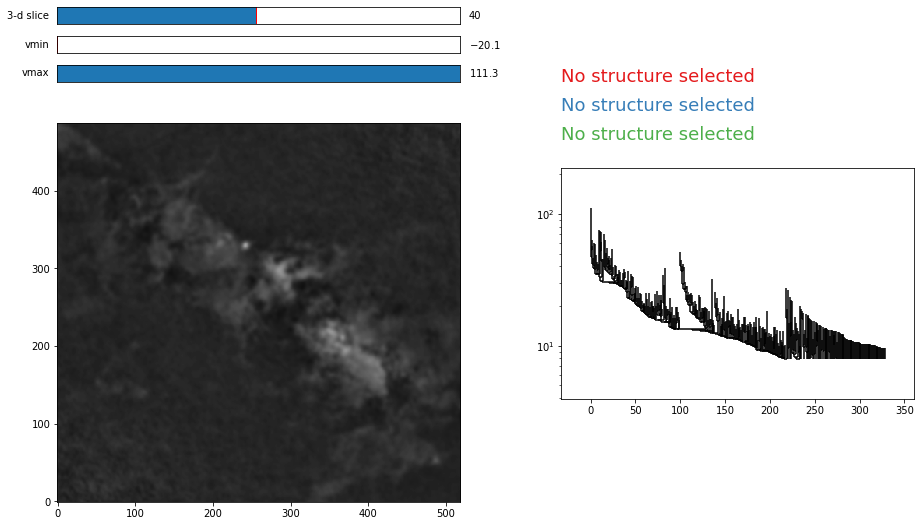

(107,)
[5.63500895 0.72400517] [[ 0.11841703 -0.00629858]
 [-0.00629858  0.00034329]] All_structures:
a =  5.6350089513119626 +- 0.3441177552352828
b =  0.7240051730985723 +- 0.01852809489076452


<Figure size 2160x2160 with 0 Axes>

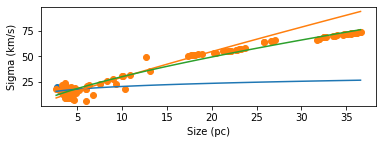

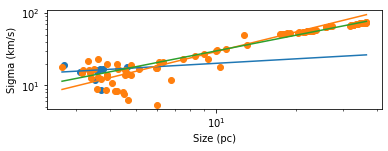

In [3]:
#size definitions from fwhm to 90% to gaussian (1sigma) 

#CO 


Num=3
Overlaps=0#4
Ram_Limiter=1#What percent of the cube my ram can handle
Name = "CO 3-2_Abs"
name = "CO_3_2_CM_Contours_DS_10_Abs.jpeg"
NameS = (Name+"Sigmas")
NameR = (Name+"Radii")
RNames=np.load('RNames.npy')
SNames=np.load('SNames.npy')

RNames[Num] = NameR
SNames[Num] = NameS
print(RNames,SNames,NameR,NameS)
np.save("RNames",RNames)
np.save("SNames",SNames)

print(NameS)
paths = pylab.array(['NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_HCN_J1.cube.reproject.K-kms.pbcor.fits','NGC_H13CN_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_CO_J3_2.cube.reproject.K-kms.pbcor.fits','SiJ2_1.cube.reproject.K-kms.pbcor.fits','H13CoPJ1_0.cube.reproject.K-kms.pbcor.fits','CCH_N1.cube.reproject.K-kms.pbcor.fits','HC3N_J11.cube.reproject.K-kms.pbcor.fits','NGC_H13CN.cube.reproject.K-kms.pbcor.fits','NGC_HCO_Plus.cube.K-kms.pbcor.fits','NGC253_HCN.cube.reproject.K-kms.pbcor.fits'])
#path = paths[Num]
path = 'ngc253_co32_hires_common.fits'
print(path)
Confidences = np.load('Confidence_data.npy')
H13CN_MASK = np.load('H13CN_MASK_NGC.npy')
Noises = np.load('Noises_K.npy')
#Noises = Ns
m = Noises[Num]
#Make subcube
Qp = SpectralCube.read(path).with_spectral_unit(u.km/u.s,velocity_convention="radio")
Qp.allow_huge_operations=True

Q = Qp.to(u.K).spectral_slab(-200. *u.km / u.s, 700. *u.km / u.s)

sc = Q.unmasked_copy()
scQ = Q
scW = sc.wcs[:][:][0]
#BP = np.where(Confidences<Overlaps)#Overlaps)
del Confidences
#sc.hdu.data[BP]=np.nan
#print(sc.hdu.data[BP])
#del BP
dat = sc.hdu.data[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
print(np.shape(dat),np.shape(sc),sc[0][0][0])
scn = sc[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
scQn = scQ[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
cen_p1 = SkyCoord('00h47m33.9s', '-25d17m26.8s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.6s', '-25d17m10.2s', frame='icrs')

#cen_p1 = SkyCoord('00h47m33.6s', '-25d17m16.8s', frame='icrs')
#cen_p2 = SkyCoord('00h47m33.3s', '-25d17m14.2s', frame='icrs')

scW = scn.wcs[:][:][0]
scQW = scQn.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

datn = dat[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
scF = scn[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
raQDP1 = [int(scQW.world_to_pixel(cen_p1)[0]),int(scQW.world_to_pixel(cen_p1)[1])]
raQDP2 = [int(scQW.world_to_pixel(cen_p2)[0]),int(scQW.world_to_pixel(cen_p2)[1])]
scQF = scQn[:,raQDP1[1]:raQDP2[1],raQDP1[0]:raQDP2[0]] # Make a subcube
scWCS = scF.wcs[:][:][0]
wcs = scF.wcs[:][:][0]
wcsQ = scQF.wcs[:][:][0]

#Unload all the unimportant vars


del paths
vel, dec, ra = Q.world[:,0,0]           # For plotting purposes, I want to know the average velocity
#print(vel)
header = Q.hdu.header
print(header)
#print(header)
#make metadata for the dendrogram
metadata = {}
try:
    metadata['wavelength'] = header["RESTFREQ"]*u.Hz#
except:
    
metadata['data_unit'] = u.Jy / u.beam
metadata['arc_per_pix'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix']**2 

print(metadata['beam_minor'],metadata['beam_major'])
print(beam_area_ratio)
#metadata["wcs"] = wcs
metadata["velocity_scale"] = abs(header["CDELT3"])*u.km/u.s#3.3714064157379937*u.km/u.s
metadata["distance"] = 3.5*u.Mpc
metadata["vaxis"]=0

d = astrodendro.Dendrogram.compute(datn,min_delta=m,min_value=m*5,min_npix=int(4.8**2*1*3)) #The main culprit




##Analyze dendograms
print(np.shape(d))

v = d.viewer()
v.show()
p=d.plotter()
fig = plt.figure(1,figsize=(30,30))

scU = SpectralCube.read(path)  
scWU = scU.wcs[:][:][0]
raDP1U = [int(scWU.world_to_pixel(cen_p1)[0]),int(scWU.world_to_pixel(cen_p1)[1])]
raDP2U = [int(scWU.world_to_pixel(cen_p2)[0]),int(scWU.world_to_pixel(cen_p2)[1])]
scNU = scU[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),raDP1U[1]:raDP2U[1],raDP1U[0]:raDP2U[0]] # Make a subcube based on position
scWU = scNU.wcs[:][:][0]
#####
SC_KMSU = scNU.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMSU.allow_huge_operations=True
SC_K_KMSU = SC_KMSU.to(u.K)
SC_K_KMS_slabU = SC_K_KMSU.spectral_slab(-200. *u.km / u.s, 700. *u.km / u.s)  # Extract a subset of the velocities
ds=30
SC_CM = SC_K_KMS_slabU.downsample_axis(ds,axis=0) # Here we use downsampling to bin (average)the data # into coarse bins (broad channels) with width ~ 11 km/s    
vel, dec, ra = SC_CM.world[:,0,0]           # For plotting purposes, I want to know the average velocity

wcsU = SC_CM.wcs[:][:][0]
#Done making unmasked CM

noplot=True #produce plot of channel maps and contours? y/n

for n in np.arange(0,len(SC_CM.hdu.data)):   
    if(noplot):
        break
    # Now we loop through each slice (averaged channels) 
    #ax = pylab.subplot(5,5,n+1,projection=wcsU) # We plot them in a grid    
    ax = pylab.subplot(5,5,n+1,projection=sc.wcs[:][:][0]) # We plot them in a grid    
    im = pylab.imshow(SC_CM.hdu.data[n],cmap='gray',vmin=0,vmax=m*12)
    #print(np.shape(datn),np.shape(np.nanmean(datn[n:n+9],axis=0)))
    #im = pylab.imshow(np.nanmean(datn[n*ds:ds*n+ds-1],axis=0),cmap='gray',vmin=0,vmax=m*8)
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-1)                                                                                      
    Dec.set_ticks(size=-1) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(0,0,s="%i km/s"%(vel.value[n]),fontsize=30,c="Red") # Print the velocity of each averaged channel
    ax.tick_params(axis = 'both', which = 'major', labelsize = 12) 
    cb=pylab.colorbar(im,fraction=0.035,pad=0.01) 
    if n==len(SC_CM.hdu.data)-1:
        pylab.xlabel("Right Ascension",fontsize=30)
        pylab.ylabel("Declination",labelpad=-13,fontsize=30,rotation=90)
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
    pylab.tight_layout(w_pad=6,h_pad=-0)
    
    for t in d.all_structures:
        
        I = t.indices()
        Cont = True
        try:
            #print(str(t.descendants[0]).find("branch"))
            #print(str(t.descendants[0]))
            if(str(t.descendants[0]).find("branch") != -1):
                Cont = False #If we find a branch inside this structure t, then it is at least order two and will be discarded
        except:
            lop=12

        if(Cont):
            s = PPVStatistic(t,metadata=metadata)
            #if(s.v_rms > 2*u.km/u.s and s.v_rms*s.radius**2>1*metadata["velocity_scale"]*u.pix**2*3 and s.radius<24*2*u.pix and s.radius>4.8*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 4):
            if((True)):
                for lmn in range(np.nanmax(I[0])-np.nanmin(I[0])):
                    p.plot_contour(ax, structure=t, lw=1, colors='red',alpha=.1,slice = lmn)
                #p.plot_contour(ax, structure=t, lw=1, colors='red',alpha=.1)
                #print(n)
                #ellipse = s.to_mpl_ellipse(edgecolor='pink', facecolor='pink',alpha=.1)
                #ax.add_patch(ellipse)
                #print(t.indices())
                #break
if (noplot==False):
    fig.savefig(bbox_inches='tight',fname=name)

pc_per_pixel = metadata['arc_per_pix']/3600/180*np.pi/u.arcsec*metadata['distance']/u.Mpc

sig_per_pixel=np.nan#metadata['spectral_resolution']/u.pix
radsL=np.array([])
radsB=np.array([])
sigmasL=np.array([])
sigmasB=np.array([])

for t in d.all_structures: 
    
    I = t.indices()
    Cont = True
    try:
        #print(str(t.descendants[0]).find("branch"))
        #print(str(t.descendants[0]))
        if(str(t.descendants[0]).find("branch") != -1):
            Cont = False #If we find a branch inside this structure t, then it is at least order two and will be discarded
    except:
        lop=12
    
    if(Cont):
        s = PPVStatistic(t,metadata=metadata)
        #if(s.v_rms > 2*u.km/u.s and s.v_rms*s.radius**2>4.8**2*metadata["velocity_scale"]*u.pix**2*3 and s.radius<24*2*u.pix and s.radius>4.8*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 4):
        if(s.v_rms*s.radius**2>4.8**2*metadata["velocity_scale"]*u.pix**2*3):







            if(t.is_leaf):
                radsL=np.append(radsL,(float(s.radius*pc_per_pixel))) #convert pixel to pc (then make it dimensionless)
                sigmasL=np.append(sigmasL,(float(s.v_rms*u.s/u.km)))#Convert pixel to velocity (then make it dimensionless)
            if(t.is_branch	):
                radsB=np.append(radsB,(float(s.radius*pc_per_pixel))) #convert pixel to pc (then make it dimensionless)
                sigmasB=np.append(sigmasB,(float(s.v_rms*u.s/u.km)))#Convert pixel to velocity (then make it dimensionless)



from scipy.optimize import curve_fit

def func(R,a,b):
    return a*R**(b)

Rcon = np.concatenate((radsL,radsB))
Scon = np.concatenate((sigmasL,sigmasB))
print(np.shape(Rcon))
poptCon, pcovCon = curve_fit(func, Rcon*10**6, Scon)

print(poptCon,pcovCon,"All_structures:")
print("a = ",poptCon[0],"+-",np.sqrt(pcovCon[0][0]))
print("b = ",poptCon[1],"+-",np.sqrt(pcovCon[1][1]))

fig = plt.figure()
ax = pylab.subplot(2, 1, 1)
xpL,xpB = ax.scatter(radsL*10**6,sigmasL),ax.scatter(radsB*10**6,sigmasB)
xs=np.linspace(np.nanmin(Rcon*10**6),np.nanmax(Rcon*10**6),50)
ysL,ysB,ysCon=func(xs,popt[0],popt[1]),func(xs,poptB[0],poptB[1]),func(xs,poptCon[0],poptCon[1])
xpa1,xpa2,xpaTot = ax.plot(xs,ysL),ax.plot(xs,ysB),ax.plot(xs,ysCon)
plt.xlabel("Size (pc)")
plt.ylabel("Sigma (km/s)")
pylab.show()
ax2 = pylab.subplot(2, 1, 2)
xpL,xpB = ax2.scatter(radsL*10**6,sigmasL),ax2.scatter(radsB*10**6,sigmasB)
p,p2,p3 = ax2.plot(xs,ysL),ax2.plot(xs,ysB),ax2.plot(xs,ysCon)
ax2.set_yscale('log')
ax2.set_xscale('log')
plt.xlabel("Size (pc)")
plt.ylabel("Sigma (km/s)")
pylab.show()



In [ ]:
#Finding the manual contours

#CO


path = 'ngc253_co32_hires_common.fits'

Noises = np.load('Noises_K.npy')
#Noises = Ns
Num=3
m = Noises[Num]
#Make subcube
Qp = SpectralCube.read(path).with_spectral_unit(u.km/u.s,velocity_convention="radio")
Qp.allow_huge_operations=True

Q = Qp.to(u.K).spectral_slab(-200. *u.km / u.s, 700. *u.km / u.s)

sc = Q.unmasked_copy()
scQ = Q
scW = sc.wcs[:][:][0]
#BP = np.where(Confidences<Overlaps)#Overlaps)
del Confidences
#sc.hdu.data[BP]=np.nan
#print(sc.hdu.data[BP])
#del BP
dat = sc.hdu.data[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
print(np.shape(dat),np.shape(sc),sc[0][0][0])
scn = sc[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
scQn = scQ[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
cen_p1 = SkyCoord('00h47m33.9s', '-25d17m26.8s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.6s', '-25d17m10.2s', frame='icrs')

#cen_p1 = SkyCoord('00h47m33.6s', '-25d17m16.8s', frame='icrs')
#cen_p2 = SkyCoord('00h47m33.3s', '-25d17m14.2s', frame='icrs')

scW = scn.wcs[:][:][0]
scQW = scQn.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]

datn = dat[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube




scF = scn[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
raQDP1 = [int(scQW.world_to_pixel(cen_p1)[0]),int(scQW.world_to_pixel(cen_p1)[1])]
raQDP2 = [int(scQW.world_to_pixel(cen_p2)[0]),int(scQW.world_to_pixel(cen_p2)[1])]
scQF = scQn[:,raQDP1[1]:raQDP2[1],raQDP1[0]:raQDP2[0]] # Make a subcube
scWCS = scF.wcs[:][:][0]
wcs = scF.wcs[:][:][0]
wcsQ = scQF.wcs[:][:][0]

#Unload all the unimportant vars


AP = np.load('Abs_Pix_NGC.npy')

BP = np.where(AP>0)

dat_No_Abs=np.copy(dat)
dat_No_Abs[BP]=np.nan
datn_NA = dat_No_Abs[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]]

del paths
vel, dec, ra = Q.world[:,0,0]           # For plotting purposes, I want to know the average velocity
#print(vel)
header = Q.hdu.header
print(header)
#print(header)
#make metadata for the dendrogram
metadata = {}
try:
    metadata['wavelength'] = header["RESTFREQ"]*u.Hz#
except:
    
metadata['data_unit'] = u.Jy / u.beam
metadata['arc_per_pix'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix']**2 

print(metadata['beam_minor'],metadata['beam_major'])
print(beam_area_ratio)
#metadata["wcs"] = wcs
metadata["velocity_scale"] = abs(header["CDELT3"])*u.km/u.s#3.3714064157379937*u.km/u.s
metadata["distance"] = 3.5*u.Mpc
metadata["vaxis"]=0

d = astrodendro.Dendrogram.compute(datn,min_delta=m,min_value=m*5,min_npix=int(4.8**2*1*3)) #The main culprit
d_no_abs = astrodendro.Dendrogram.compute(datn_NA,min_delta = m,min_value = m*5, min_npix=50,wcs = scQF.wcs) #The main culprit



##Analyze dendograms
print(np.shape(d))

v = d.viewer()
v.show()
p=d.plotter()
fig = plt.figure(1,figsize=(30,30))

scU = SpectralCube.read(path)  
scWU = scU.wcs[:][:][0]
raDP1U = [int(scWU.world_to_pixel(cen_p1)[0]),int(scWU.world_to_pixel(cen_p1)[1])]
raDP2U = [int(scWU.world_to_pixel(cen_p2)[0]),int(scWU.world_to_pixel(cen_p2)[1])]
scNU = scU[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),raDP1U[1]:raDP2U[1],raDP1U[0]:raDP2U[0]] # Make a subcube based on position
scWU = scNU.wcs[:][:][0]
#####
SC_KMSU = scNU.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMSU.allow_huge_operations=True
SC_K_KMSU = SC_KMSU.to(u.K)
SC_K_KMS_slabU = SC_K_KMSU.spectral_slab(-200. *u.km / u.s, 700. *u.km / u.s)  # Extract a subset of the velocities
ds=20
SC_CM = SC_K_KMS_slabU.downsample_axis(ds,axis=0) # Here we use downsampling to bin (average)the data # into coarse bins (broad channels) with width ~ 11 km/s    
vel, dec, ra = SC_CM.world[:,0,0]           # For plotting purposes, I want to know the average velocity

wcsU = SC_CM.wcs[:][:][0]
#Done making unmasked CM

noplot=True #produce plot of channel maps and contours? y/n

for n in np.arange(0,len(SC_CM.hdu.data)):   
    if(noplot):
        break
    # Now we loop through each slice (averaged channels) 
    #ax = pylab.subplot(5,5,n+1,projection=wcsU) # We plot them in a grid    
    ax = pylab.subplot(5,5,n+1,projection=sc.wcs[:][:][0]) # We plot them in a grid    
    im = pylab.imshow(SC_CM.hdu.data[n],cmap='gray',vmin=0,vmax=m*12)
    #print(np.shape(datn),np.shape(np.nanmean(datn[n:n+9],axis=0)))
    #im = pylab.imshow(np.nanmean(datn[n*ds:ds*n+ds-1],axis=0),cmap='gray',vmin=0,vmax=m*8)
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-1)                                                                                      
    Dec.set_ticks(size=-1) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(0,0,s="%i km/s"%(vel.value[n]),fontsize=30,c="Red") # Print the velocity of each averaged channel
    ax.tick_params(axis = 'both', which = 'major', labelsize = 12) 
    cb=pylab.colorbar(im,fraction=0.035,pad=0.01) 
    if n==len(SC_CM.hdu.data)-1:
        pylab.xlabel("Right Ascension",fontsize=30)
        pylab.ylabel("Declination",labelpad=-13,fontsize=30,rotation=90)
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
    pylab.tight_layout(w_pad=6,h_pad=-0)
    
    for t in d.all_structures:
        
        I = t.indices()
        Cont = True
        try:
            #print(str(t.descendants[0]).find("branch"))
            #print(str(t.descendants[0]))
            if(str(t.descendants[0]).find("branch") != -1):
                Cont = False #If we find a branch inside this structure t, then it is at least order two and will be discarded
        except:
            lop=12

        if(Cont):
            s = PPVStatistic(t,metadata=metadata)
            #if(s.v_rms > 2*u.km/u.s and s.v_rms*s.radius**2>1*metadata["velocity_scale"]*u.pix**2*3 and s.radius<24*2*u.pix and s.radius>4.8*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 4):
            if((True)):
                for lmn in range(np.nanmax(I[0])-np.nanmin(I[0])):
                    p.plot_contour(ax, structure=t, lw=1, colors='red',alpha=.1,slice = lmn)
                #p.plot_contour(ax, structure=t, lw=1, colors='red',alpha=.1)
                #print(n)
                #ellipse = s.to_mpl_ellipse(edgecolor='pink', facecolor='pink',alpha=.1)
                #ax.add_patch(ellipse)
                #print(t.indices())
                #break
if (noplot==False):
    fig.savefig(bbox_inches='tight',fname=name)

pc_per_pixel = metadata['arc_per_pix']/3600/180*np.pi/u.arcsec*metadata['distance']/u.Mpc

sig_per_pixel=np.nan#metadata['spectral_resolution']/u.pix
radsL=np.array([])
radsB=np.array([])
sigmasL=np.array([])
sigmasB=np.array([])

for t in d.all_structures: 
    
    I = t.indices()
    Cont = True
    try:
        #print(str(t.descendants[0]).find("branch"))
        #print(str(t.descendants[0]))
        if(str(t.descendants[0]).find("branch") != -1):
            Cont = False #If we find a branch inside this structure t, then it is at least order two and will be discarded
    except:
        lop=12
    
    if(Cont):
        s = PPVStatistic(t,metadata=metadata)
        #if(s.v_rms > 2*u.km/u.s and s.v_rms*s.radius**2>4.8**2*metadata["velocity_scale"]*u.pix**2*3 and s.radius<24*2*u.pix and s.radius>4.8*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 4):
        if(s.v_rms*s.radius**2>4.8**2*metadata["velocity_scale"]*u.pix**2*3):







            if(t.is_leaf):
                radsL=np.append(radsL,(float(s.radius*pc_per_pixel))) #convert pixel to pc (then make it dimensionless)
                sigmasL=np.append(sigmasL,(float(s.v_rms*u.s/u.km)))#Convert pixel to velocity (then make it dimensionless)
            if(t.is_branch	):
                radsB=np.append(radsB,(float(s.radius*pc_per_pixel))) #convert pixel to pc (then make it dimensionless)
                sigmasB=np.append(sigmasB,(float(s.v_rms*u.s/u.km)))#Convert pixel to velocity (then make it dimensionless)



from scipy.optimize import curve_fit

def func(R,a,b):
    return a*R**(b)
try:
    popt, pcov = curve_fit(func, radsL*10**6, sigmasL)
except:
    popt, pcov = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]
try:
    poptB, pcovB = curve_fit(func, radsB*10**6, sigmasB)
except:
    poptB, pcovB = [np.nan,np.nan],[[np.nan,np.nan],[np.nan,np.nan]]

Rcon = np.concatenate((radsL,radsB))
Scon = np.concatenate((sigmasL,sigmasB))
print(np.shape(Rcon))
poptCon, pcovCon = curve_fit(func, Rcon*10**6, Scon)
try:
    print(popt,pcov,"leaves:")
    print("a = ",popt[0],"+-",np.sqrt(pcov[0][0]))
    print("b = ",popt[1],"+-",np.sqrt(pcov[1][1]))
    print(poptB,pcovB,"branches:")
    print("a = ",poptB[0],"+-",np.sqrt(pcovB[0][0]))
    print("b = ",poptB[1],"+-",np.sqrt(pcovB[1][1]))
    print(poptCon,pcovCon,"All_structures:")
    print("a = ",poptCon[0],"+-",np.sqrt(pcovCon[0][0]))
    print("b = ",poptCon[1],"+-",np.sqrt(pcovCon[1][1]))

    fig = plt.figure()
    ax = pylab.subplot(2, 1, 1)
    xpL,xpB = ax.scatter(radsL*10**6,sigmasL),ax.scatter(radsB*10**6,sigmasB)
    xs=np.linspace(np.nanmin(Rcon*10**6),np.nanmax(Rcon*10**6),50)
    ysL,ysB,ysCon=func(xs,popt[0],popt[1]),func(xs,poptB[0],poptB[1]),func(xs,poptCon[0],poptCon[1])
    xpa1,xpa2,xpaTot = ax.plot(xs,ysL),ax.plot(xs,ysB),ax.plot(xs,ysCon)
    plt.xlabel("Size (pc)")
    plt.ylabel("Sigma (km/s)")
    pylab.show()
    ax2 = pylab.subplot(2, 1, 2)
    xpL,xpB = ax2.scatter(radsL*10**6,sigmasL),ax2.scatter(radsB*10**6,sigmasB)
    p,p2,p3 = ax2.plot(xs,ysL),ax2.plot(xs,ysB),ax2.plot(xs,ysCon)
    ax2.set_yscale('log')
    ax2.set_xscale('log')
    plt.xlabel("Size (pc)")
    plt.ylabel("Sigma (km/s)")
    pylab.show()

except:
    
    print("Not Enough Well-Defined Structures")
NameSL = (NameS+"_Leaves")
NameSB = (NameS+"_Branches")
NameRL = (NameR+"_Leaves")
NameRB = (NameR+"_Branches")

np.save(NameSL,sigmasL)
np.save(NameSB,sigmasB)
np.save(NameRL,radsL)
np.save(NameRB,radsB)

In [ ]:
#CCH

Num = 6
Overlaps=1#4
Ram_Limiter = 1
Name = "CCH_Abs"
name = "CCH_CM_Contours_DS_10_Abs.jpeg"
NameS = (Name+"Sigmas")
NameR = (Name+"Radii")
RNames[Num] = NameR
SNames[Num] = NameS
np.save("RNames",RNames)
np.save("SNames",SNames)
print(NameS)
paths = pylab.array(['NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_HCN_J1.cube.reproject.K-kms.pbcor.fits','NGC_H13CN_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_CO_J3_2.cube.reproject.K-kms.pbcor.fits','SiJ2_1.cube.reproject.K-kms.pbcor.fits','H13CoPJ1_0.cube.reproject.K-kms.pbcor.fits','CCH_N1.cube.reproject.K-kms.pbcor.fits','HC3N_J11.cube.reproject.K-kms.pbcor.fits','NGC_H13CN.cube.reproject.K-kms.pbcor.fits','NGC_HCO_Plus.cube.K-kms.pbcor.fits','NGC253_HCN.cube.reproject.K-kms.pbcor.fits'])
path = paths[Num]
print(path)
Confidences = np.load('Confidence_data.npy')

Noises = np.load('Noises_K.npy')
#Noises = Ns
m = Noises[Num]
#Make subcube
Q = SpectralCube.read(path)  
sc = Q.unmasked_copy()
scQ = Q
scW = sc.wcs[:][:][0]
print(Confidences[0],Confidences.shape,sc.hdu.data.shape)
BP = np.where(Confidences<Overlaps)#Overlaps)
del Confidences
sc.hdu.data[BP]=np.nan
print(sc.hdu.data[BP])
dat = sc.hdu.data[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
print(np.shape(dat),np.shape(sc))
scn = sc[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
scQn = scQ[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
cen_p1 = SkyCoord('00h47m33.9s', '-25d17m26.8s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.6s', '-25d17m10.2s', frame='icrs')

#cen_p1 = SkyCoord('00h47m33.6s', '-25d17m16.8s', frame='icrs')
#cen_p2 = SkyCoord('00h47m33.3s', '-25d17m14.2s', frame='icrs')

scW = scn.wcs[:][:][0]
scQW = scQn.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
datn = dat[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
scF = scn[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
raQDP1 = [int(scQW.world_to_pixel(cen_p1)[0]),int(scQW.world_to_pixel(cen_p1)[1])]
raQDP2 = [int(scQW.world_to_pixel(cen_p2)[0]),int(scQW.world_to_pixel(cen_p2)[1])]
scQF = scQn[:,raQDP1[1]:raQDP2[1],raQDP1[0]:raQDP2[0]] # Make a subcube
scWCS = scF.wcs[:][:][0]
wcs = scF.wcs[:][:][0]
wcsQ = scQF.wcs[:][:][0]

#Unload all the unimportant vars

del BP
del paths


header = fits.getheader(path)

#make metadata for the dendrogram
metadata = {}

metadata['data_unit'] = u.Jy / u.beam
metadata['arc_per_pix'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix']**2 

print(metadata['beam_minor'],metadata['beam_major'])
print(beam_area_ratio)
#metadata["wcs"] = wcs
metadata["velocity_scale"] = abs(header["CDELT3"])*u.km/u.s#3.3714064157379937*u.km/u.s
metadata["distance"] = 3.5*u.Mpc

d = astrodendro.Dendrogram.compute(datn,min_delta=m,min_value=m*5,min_npix=50) #The main culprit




vel,NA,na = sc.world[:,0,0]

##Analyze dendograms
print(np.shape(d))

v = d.viewer()
v.show()
p=d.plotter()
fig = plt.figure(1,figsize=(30,30))

scU = SpectralCube.read(path)  
scWU = scU.wcs[:][:][0]
raDP1U = [int(scWU.world_to_pixel(cen_p1)[0]),int(scWU.world_to_pixel(cen_p1)[1])]
raDP2U = [int(scWU.world_to_pixel(cen_p2)[0]),int(scWU.world_to_pixel(cen_p2)[1])]
scNU = scU[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),raDP1U[1]:raDP2U[1],raDP1U[0]:raDP2U[0]] # Make a subcube based on position
scWU = scNU.wcs[:][:][0]
#####
SC_KMSU = scNU.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMSU.allow_huge_operations=True
SC_K_KMSU = SC_KMSU.to(u.K)
SC_K_KMS_slabU = SC_K_KMSU.spectral_slab(-888. *u.km / u.s, 888. *u.km / u.s)  # Extract a subset of the velocities
ds=20
SC_CM = SC_K_KMS_slabU.downsample_axis(ds,axis=0) # Here we use downsampling to bin (average)the data # into coarse bins (broad channels) with width ~ 11 km/s    
vel, dec, ra = SC_CM.world[:,0,0]           # For plotting purposes, I want to know the average velocity
wcsU = SC_CM.wcs[:][:][0]
#Done making unmasked CM

noplot=True #produce plot of channel maps and contours? y/n

for n in np.arange(0,len(SC_CM.hdu.data)):   
    if(noplot):
        break
    # Now we loop through each slice (averaged channels) 
    #ax = pylab.subplot(5,5,n+1,projection=wcsU) # We plot them in a grid    
    ax = pylab.subplot(5,5,n+1,projection=sc.wcs[:][:][0]) # We plot them in a grid    
    im = pylab.imshow(SC_CM.hdu.data[n],cmap='gray',vmin=0,vmax=m*8)
    #print(np.shape(datn),np.shape(np.nanmean(datn[n:n+9],axis=0)))
    #im = pylab.imshow(np.nanmean(datn[n*ds:ds*n+ds-1],axis=0),cmap='gray',vmin=0,vmax=m*8)
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-1)                                                                                      
    Dec.set_ticks(size=-1) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(0,0,s="%i km/s"%(vel.value[n]),fontsize=30,c="Red") # Print the velocity of each averaged channel
    ax.tick_params(axis = 'both', which = 'major', labelsize = 12) 
    cb=pylab.colorbar(im,fraction=0.035,pad=0.01) 
    if n==len(SC_CM.hdu.data)-1:
        pylab.xlabel("Right Ascension",fontsize=30)
        pylab.ylabel("Declination",labelpad=-13,fontsize=30,rotation=90)
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
    pylab.tight_layout(w_pad=6,h_pad=-0)
    
    for t in d.all_structures:
        
        I = t.indices()
        s = PPVStatistic(t,metadata=metadata)
        if(s.v_rms>1*u.pix and s.radius>1*u.pix and  s.radius<24*2*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 2):
            k=0
            for ll in range(len(I[0])):
                if(I[0][ll] - int((n+.5)*ds) ==0):
                    k=int((n+.5)*ds)
                    break
            for ll in range(len(I[0])):
                if(k==int((n+.5)*ds)  and n!= 0):
                    break
                miN=3
                if(abs(I[0][ll] - int((n+.5)*ds)) <miN):
                    k=I[0][ll]
                    break
            if(k!=0):
                p.plot_contour(ax, structure=t, lw=1, colors='red',alpha=.1,slice = k)
                ellipse = s.to_mpl_ellipse(edgecolor='pink', facecolor='pink',alpha=.1)
                ax.add_patch(ellipse)
            #print(t.indices())
            #break
if (noplot==False):
    fig.savefig(bbox_inches='tight',fname=name)


rads=np.array([])
sigmas=np.array([])

pc_per_pixel = metadata['arc_per_pix']/3600/180*np.pi/u.arcsec*metadata['distance']/u.Mpc
sig_per_pixel=np.nan#metadata['spectral_resolution']/u.pix
for t in d.all_structures: 
    
    I = t.indices()
    s = PPVStatistic(t,metadata=metadata)
        
    if(s.v_rms>1*u.pix and s.radius>1*u.pix and  s.radius<24*2*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 2):
        rads=np.append(rads,(s.radius*pc_per_pixel)) #convert pixel to pc (then make it dimensionless)
        sigmas=np.append(sigmas,(s.v_rms*sig_per_pixel))#Convert pixel to velocity (then make it dimensionless)


from scipy.optimize import curve_fit

def func(R,a,b):
    return a*R**(b)
popt, pcov = curve_fit(func, rads*10**6, sigmas)
print(popt,pcov)
print("a = ",popt[0],"+-",np.sqrt(pcov[0][0]))
print("b = ",popt[1],"+-",np.sqrt(pcov[1][1]))
fig = plt.figure()
ax = pylab.subplot(2, 1, 1)
xp1 = ax.scatter(rads*10**6,sigmas)
xs=np.linspace(np.nanmin(rads*10**6),np.nanmax(rads*10**6),50)
ys=func(xs,popt[0],popt[1])
xpa1 = ax.scatter(xs,ys)
plt.xlabel("Size (pc)")
plt.ylabel("Sigma (km/s)")
pylab.show()
ax2 = pylab.subplot(2, 1, 2)
xp = ax2.scatter(rads*10**6,sigmas)
p = ax2.plot(xs,ys,c='red')
ax2.set_yscale('log')
ax2.set_xscale('log')
plt.xlabel("Size (pc)")
plt.ylabel("Sigma (km/s)")
pylab.show()

np.save(NameS,sigmas)
np.save(NameR,rads)



In [ ]:
#HC3N
Num = 7
Overlaps=1#4
Ram_Limiter = 1
Name = "HC3N_Abs"
name = "HC3N_CM_Contours_DS_10_Abs.jpeg"
NameS = (Name+"Sigmas")
NameR = (Name+"Radii")
RNames[Num] = NameR
SNames[Num] = NameS
np.save("RNames",RNames)
np.save("SNames",SNames)
print(NameS)
paths = pylab.array(['NGC_HCOP_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_HCN_J1.cube.reproject.K-kms.pbcor.fits','NGC_H13CN_J1_0.cube.reproject.K-kms.pbcor.fits','NGC_CO_J3_2.cube.reproject.K-kms.pbcor.fits','SiJ2_1.cube.reproject.K-kms.pbcor.fits','H13CoPJ1_0.cube.reproject.K-kms.pbcor.fits','CCH_N1.cube.reproject.K-kms.pbcor.fits','HC3N_J11.cube.reproject.K-kms.pbcor.fits','NGC_H13CN.cube.reproject.K-kms.pbcor.fits','NGC_HCO_Plus.cube.K-kms.pbcor.fits','NGC253_HCN.cube.reproject.K-kms.pbcor.fits'])
path = paths[Num]
print(path)
Confidences = np.load('Confidence_data.npy')

Noises = np.load('Noises_K.npy')
#Noises = Ns
m = Noises[Num]
#Make subcube
Q = SpectralCube.read(path)  
sc = Q.unmasked_copy()
scQ = Q
scW = sc.wcs[:][:][0]
print(Confidences[0],Confidences.shape,sc.hdu.data.shape)
BP = np.where(Confidences<Overlaps)#Overlaps)
del Confidences
sc.hdu.data[BP]=np.nan
print(sc.hdu.data[BP])
dat = sc.hdu.data[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
print(np.shape(dat),np.shape(sc))
scn = sc[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
scQn = scQ[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),:,:]
cen_p1 = SkyCoord('00h47m33.9s', '-25d17m26.8s', frame='icrs')
cen_p2 = SkyCoord('00h47m32.6s', '-25d17m10.2s', frame='icrs')

#cen_p1 = SkyCoord('00h47m33.6s', '-25d17m16.8s', frame='icrs')
#cen_p2 = SkyCoord('00h47m33.3s', '-25d17m14.2s', frame='icrs')

scW = scn.wcs[:][:][0]
scQW = scQn.wcs[:][:][0]
raDP1 = [int(scW.world_to_pixel(cen_p1)[0]),int(scW.world_to_pixel(cen_p1)[1])]
raDP2 = [int(scW.world_to_pixel(cen_p2)[0]),int(scW.world_to_pixel(cen_p2)[1])]
datn = dat[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
scF = scn[:,raDP1[1]:raDP2[1],raDP1[0]:raDP2[0]] # Make a subcube
raQDP1 = [int(scQW.world_to_pixel(cen_p1)[0]),int(scQW.world_to_pixel(cen_p1)[1])]
raQDP2 = [int(scQW.world_to_pixel(cen_p2)[0]),int(scQW.world_to_pixel(cen_p2)[1])]
scQF = scQn[:,raQDP1[1]:raQDP2[1],raQDP1[0]:raQDP2[0]] # Make a subcube
scWCS = scF.wcs[:][:][0]
wcs = scF.wcs[:][:][0]
wcsQ = scQF.wcs[:][:][0]

#Unload all the unimportant vars

del BP
del paths

header = fits.getheader(path)

#make metadata for the dendrogram
metadata = {}

metadata['data_unit'] = u.Jy / u.beam
metadata['arc_per_pix'] =  abs(header["CDELT1"]*3600.0 * u.arcsec)/u.pix
metadata['beam_major'] =  header["BMAJ"]*3600.0 * u.arcsec
metadata['beam_minor'] =  header["BMIN"]*3600.0 * u.arcsec
beam_area_ratio = metadata['beam_minor']*metadata['beam_major']/metadata['arc_per_pix']**2 

print(metadata['beam_minor'],metadata['beam_major'])
print(beam_area_ratio)
#metadata["wcs"] = wcs
metadata["velocity_scale"] = abs(header["CDELT3"])*u.km/u.s#3.3714064157379937*u.km/u.s
metadata["distance"] = 3.5*u.Mpc

d = astrodendro.Dendrogram.compute(datn,min_delta=m,min_value=m*5,min_npix=50) #The main culprit





vel,NA,na = sc.world[:,0,0]

##Analyze dendograms
print(np.shape(d))

v = d.viewer()
v.show()
p=d.plotter()
fig = plt.figure(1,figsize=(30,30))

scU = SpectralCube.read(path)  
scWU = scU.wcs[:][:][0]
raDP1U = [int(scWU.world_to_pixel(cen_p1)[0]),int(scWU.world_to_pixel(cen_p1)[1])]
raDP2U = [int(scWU.world_to_pixel(cen_p2)[0]),int(scWU.world_to_pixel(cen_p2)[1])]
scNU = scU[int(len(sc)*((1-Ram_Limiter)/2)):int(len(sc)*(Ram_Limiter + (1-Ram_Limiter)/2)),raDP1U[1]:raDP2U[1],raDP1U[0]:raDP2U[0]] # Make a subcube based on position
scWU = scNU.wcs[:][:][0]
#####
SC_KMSU = scNU.with_spectral_unit(u.km/u.s,velocity_convention="radio")
SC_KMSU.allow_huge_operations=True
SC_K_KMSU = SC_KMSU.to(u.K)
SC_K_KMS_slabU = SC_K_KMSU.spectral_slab(-888. *u.km / u.s, 888. *u.km / u.s)  # Extract a subset of the velocities
ds=20
SC_CM = SC_K_KMS_slabU.downsample_axis(ds,axis=0) # Here we use downsampling to bin (average)the data # into coarse bins (broad channels) with width ~ 11 km/s    
vel, dec, ra = SC_CM.world[:,0,0]           # For plotting purposes, I want to know the average velocity
wcsU = SC_CM.wcs[:][:][0]
#Done making unmasked CM

noplot=True #produce plot of channel maps and contours? y/n

for n in np.arange(0,len(SC_CM.hdu.data)):   
    if(noplot):
        break
    # Now we loop through each slice (averaged channels) 
    #ax = pylab.subplot(5,5,n+1,projection=wcsU) # We plot them in a grid    
    ax = pylab.subplot(5,5,n+1,projection=sc.wcs[:][:][0]) # We plot them in a grid    
    im = pylab.imshow(SC_CM.hdu.data[n],cmap='gray',vmin=0,vmax=m*8)
    #print(np.shape(datn),np.shape(np.nanmean(datn[n:n+9],axis=0)))
    #im = pylab.imshow(np.nanmean(datn[n*ds:ds*n+ds-1],axis=0),cmap='gray',vmin=0,vmax=m*8)
    
    RA = ax.coords[0]                                                                  
    Dec = ax.coords[1]
    RA.set_ticks(size=-1)                                                                                      
    Dec.set_ticks(size=-1) 
    RA.set_ticklabel(exclude_overlapping=True)
    Dec.set_ticklabel(exclude_overlapping=True) 
    pylab.text(0,0,s="%i km/s"%(vel.value[n]),fontsize=30,c="Red") # Print the velocity of each averaged channel
    ax.tick_params(axis = 'both', which = 'major', labelsize = 12) 
    cb=pylab.colorbar(im,fraction=0.035,pad=0.01) 
    if n==len(SC_CM.hdu.data)-1:
        pylab.xlabel("Right Ascension",fontsize=30)
        pylab.ylabel("Declination",labelpad=-13,fontsize=30,rotation=90)
    else:
        pylab.xlabel(" ")
        pylab.ylabel(" ") 
    pylab.tight_layout(w_pad=6,h_pad=-0)
    
    for t in d.all_structures:
        
        I = t.indices()
        s = PPVStatistic(t,metadata=metadata)
        if(s.v_rms>1*u.pix and s.radius>1*u.pix and  s.radius<24*2*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 2):
            k=0
            for ll in range(len(I[0])):
                if(I[0][ll] - int((n+.5)*ds) ==0):
                    k=int((n+.5)*ds)
                    break
            for ll in range(len(I[0])):
                if(k==int((n+.5)*ds)  and n!= 0):
                    break
                miN=3
                if(abs(I[0][ll] - int((n+.5)*ds)) <miN):
                    k=I[0][ll]
                    break
            if(k!=0):
                p.plot_contour(ax, structure=t, lw=1, colors='red',alpha=.1,slice = k)
                ellipse = s.to_mpl_ellipse(edgecolor='pink', facecolor='pink',alpha=.1)
                ax.add_patch(ellipse)
            #print(t.indices())
            #break
if (noplot==False):
    fig.savefig(bbox_inches='tight',fname=name)


rads=np.array([])
sigmas=np.array([])

pc_per_pixel = metadata['arc_per_pix']/3600/180*np.pi/u.arcsec*metadata['distance']/u.Mpc
sig_per_pixel=np.nan#metadata['spectral_resolution']/u.pix
for t in d.all_structures: 
    
    I = t.indices()
    s = PPVStatistic(t,metadata=metadata)
        
    if(s.v_rms>1*u.pix and s.radius>1*u.pix and  s.radius<24*2*u.pix and np.nanmax(I[0])-np.nanmin(I[0]) > 2):
        rads=np.append(rads,(s.radius*pc_per_pixel)) #convert pixel to pc (then make it dimensionless)
        sigmas=np.append(sigmas,(s.v_rms*sig_per_pixel))#Convert pixel to velocity (then make it dimensionless)


from scipy.optimize import curve_fit

def func(R,a,b):
    return a*R**(b)
popt, pcov = curve_fit(func, rads*10**6, sigmas)
print(popt,pcov)
print("a = ",popt[0],"+-",np.sqrt(pcov[0][0]))
print("b = ",popt[1],"+-",np.sqrt(pcov[1][1]))
fig = plt.figure()
ax = pylab.subplot(2, 1, 1)
xp1 = ax.scatter(rads*10**6,sigmas)
xs=np.linspace(np.nanmin(rads*10**6),np.nanmax(rads*10**6),50)
ys=func(xs,popt[0],popt[1])
xpa1 = ax.scatter(xs,ys)
plt.xlabel("Size (pc)")
plt.ylabel("Sigma (km/s)")
pylab.show()
ax2 = pylab.subplot(2, 1, 2)
xp = ax2.scatter(rads*10**6,sigmas)
p = ax2.plot(xs,ys,c='red')
ax2.set_yscale('log')
ax2.set_xscale('log')
plt.xlabel("Size (pc)")
plt.ylabel("Sigma (km/s)")
pylab.show()

np.save(NameS,sigmas)
np.save(NameR,rads)

